## Stackoverflow_Survey_Analysis

# Introduction
Stack overflow is a professional community for developers. They conduct developer surveys every year since 2011. The collected data is available open-source on the web. The Dataset would help us to answer real-world questions with the help of proper analysis. The most popular language that developers use can be found through the analysis. We also can find the developer role which pays the highest salary. The aim of our project is to analyze the 2018,2019 and 2020 developer surveys datasets from where we collect valuable insights from them.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings; 
warnings.simplefilter('ignore')
import pycountry
import plotly.express as px
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import LinearSVC
from catboost import CatBoostClassifier
import optuna
import time
from sklearn.metrics import hamming_loss
from sklearn.metrics import jaccard_score
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


## Stackoverflow 2018 Dataset

In [6]:
df2018 = pd.read_csv(r"C:\Users\SHRISTI\OneDrive\Desktop\GitHub\survey_results_public_2018.csv")
df2018.head(3)

Respondent Hobby OpenSource         Country Student          Employment  \
0           1   Yes         No           Kenya      No  Employed part-time   
1           3   Yes        Yes  United Kingdom      No  Employed full-time   
2           4   Yes        Yes   United States      No  Employed full-time   

                            FormalEducation  \
0  Bachelor’s degree (BA, BS, B.Eng., etc.)   
1  Bachelor’s degree (BA, BS, B.Eng., etc.)   
2                          Associate degree   

                                      UndergradMajor  \
0                          Mathematics or statistics   
1  A natural science (ex. biology, chemistry, phy...   
2  Computer science, computer engineering, or sof...   

                CompanySize  \
0        20 to 99 employees   
1  10,000 or more employees   
2        20 to 99 employees   

                                             DevType  ...  \
0                               Full-stack developer  ...   
1  Database administrator;DevOps specialist;Full-...  ...   
2           Engineering manager;Full-stack developer  ...   

                    Exercise Gender         SexualOrientation  \
0       3 - 4 times per week   Male  Straight or heterosexual   
1  Daily or almost every day   Male  Straight or heterosexual   
2                        NaN    NaN                       NaN   

                           EducationParents                 RaceEthnicity  \
0  Bachelor’s degree (BA, BS, B.Eng., etc.)   Black or of African descent   
1  Bachelor’s degree (BA, BS, B.Eng., etc.)  White or of European descent   
2                                       NaN                           NaN   

                 Age Dependents  MilitaryUS  \
0  25 - 34 years old        Yes         NaN   
1  35 - 44 years old        Yes         NaN   
2                NaN        NaN         NaN   

                          SurveyTooLong     SurveyEasy  
0  The survey was an appropriate length      Very easy  
1  The survey was an appropriate length  Somewhat easy  
2                                   NaN            NaN  

[3 rows x 129 columns]

In [7]:
df2018.shape

(98855, 129)

In [8]:
#print(df2018.columns.tolist()      !--> Listing coloumsn in table

In [9]:
#dropping the columns
#drop_cols = ['Respondent', 'OpenSource', 'Student', 'FormalEducation', 'CompanySize', 'CareerSatisfaction', 'HopeFiveYears', 'LastNewJob', 'AssessJob1', 'AssessJob2', 'AssessJob3', 'AssessJob4', 'AssessJob5', 'AssessJob6', 'AssessJob7', 'AssessJob8', 'AssessJob9', 'AssessJob10', 'AssessBenefits1', 'AssessBenefits2', 'AssessBenefits3', 'AssessBenefits4', 'AssessBenefits5', 'AssessBenefits6', 'AssessBenefits7', 'AssessBenefits8', 'AssessBenefits9', 'AssessBenefits10', 'AssessBenefits11', 'JobContactPriorities1', 'JobContactPriorities2', 'JobContactPriorities3', 'JobContactPriorities4', 'JobContactPriorities5', 'JobEmailPriorities1', 'JobEmailPriorities2', 'JobEmailPriorities3', 'JobEmailPriorities4', 'JobEmailPriorities5', 'JobEmailPriorities6', 'JobEmailPriorities7', 'UpdateCV', 'CommunicationTools', 'TimeFullyProductive', 'EducationTypes', 'SelfTaughtTypes', 'TimeAfterBootcamp', 'HackathonReasons', 'AgreeDisagree1', 'AgreeDisagree2', 'AgreeDisagree3', 'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformDesireNextYear', 'FrameworkWorkedWith', 'FrameworkDesireNextYear', 'IDE', 'NumberMonitors', 'Methodology', 'VersionControl', 'CheckInCode', 'AdBlocker', 'AdBlockerDisable', 'AdBlockerReasons', 'AdsAgreeDisagree1', 'AdsAgreeDisagree2', 'AdsAgreeDisagree3', 'AdsActions', 'AdsPriorities1', 'AdsPriorities2', 'AdsPriorities3', 'AdsPriorities4', 'AdsPriorities5', 'AdsPriorities6', 'AdsPriorities7', 'AIDangerous', 'AIInteresting', 'AIResponsible', 'AIFuture', 'EthicsChoice', 'EthicsReport', 'EthicsResponsible', 'EthicalImplications', 'StackOverflowRecommend', 'StackOverflowVisit', 'StackOverflowHasAccount', 'StackOverflowParticipate', 'StackOverflowJobs', 'StackOverflowDevStory', 'StackOverflowJobsRecommend', 'StackOverflowConsiderMember', 'HypotheticalTools1', 'HypotheticalTools2', 'HypotheticalTools3', 'HypotheticalTools4', 'HypotheticalTools5', 'WakeTime', 'HoursComputer', 'HoursOutside', 'SkipMeals', 'ErgonomicDevices', 'Exercise', 'SexualOrientation', 'EducationParents', 'Dependents', 'MilitaryUS', 'SurveyTooLong', 'SurveyEasy']
#df2018.drop(drop_cols, axis=1, inplace=True)

In [10]:
#df2018.shape #checking rows and col after dropping the table

### Data Filtering - Sorting & Renaming


In [12]:
col=['Age','ConvertedSalary','Country','Currency','DevType','Employment','RaceEthnicity','Gender','SalaryType','Hobby','JobSatisfaction','JobSearchStatus','OperatingSystem','UndergradMajor','YearsCoding','YearsCodingProf','LanguageDesireNextYear','LanguageWorkedWith','FormalEducation','PlatformWorkedWith','PlatformDesireNextYear']
df=df2018[col]

In [14]:
#renaming the colo
# 'ConvertedSalary': 'SalaryUSD'
df.rename(columns={'ConvertedSalary': 'SalaryUSD' }, inplace =True)

In [15]:
df.sort_index(axis=1).head(2)

Age         Country                     Currency  \
0  25 - 34 years old           Kenya                          NaN   
1  35 - 44 years old  United Kingdom  British pounds sterling (£)   

                                             DevType          Employment  \
0                               Full-stack developer  Employed part-time   
1  Database administrator;DevOps specialist;Full-...  Employed full-time   

                            FormalEducation Gender Hobby  \
0  Bachelor’s degree (BA, BS, B.Eng., etc.)   Male   Yes   
1  Bachelor’s degree (BA, BS, B.Eng., etc.)   Male   Yes   

           JobSatisfaction                                    JobSearchStatus  \
0      Extremely satisfied  I’m not actively looking, but I am open to new...   
1  Moderately dissatisfied                    I am actively looking for a job   

   ...            LanguageWorkedWith OperatingSystem  \
0  ...    JavaScript;Python;HTML;CSS     Linux-based   
1  ...  JavaScript;Python;Bash/Shell     Linux-based   

     PlatformDesireNextYear        PlatformWorkedWith  \
0  AWS;Azure;Linux;Firebase  AWS;Azure;Linux;Firebase   
1                     Linux                     Linux   

                  RaceEthnicity SalaryType SalaryUSD  \
0   Black or of African descent    Monthly       NaN   
1  White or of European descent     Yearly   70841.0   

                                      UndergradMajor       YearsCoding  \
0                          Mathematics or statistics         3-5 years   
1  A natural science (ex. biology, chemistry, phy...  30 or more years   

  YearsCodingProf  
0       3-5 years  
1     18-20 years  

[2 rows x 21 columns]

In [16]:
#21 col has been selected rfom 129, compared the shape
df.shape

(98855, 21)

In [17]:
print(df.isnull().sum()) #Finding Null Values

Age                       34281
SalaryUSD                 51153
Country                     412
Currency                  36847
DevType                    6757
Employment                 3534
RaceEthnicity             41382
Gender                    34386
SalaryType                47785
Hobby                         0
JobSatisfaction           29579
JobSearchStatus           19367
OperatingSystem           22676
UndergradMajor            19819
YearsCoding                5020
YearsCodingProf           20952
LanguageDesireNextYear    25611
LanguageWorkedWith        20521
FormalEducation            4152
PlatformWorkedWith        32856
PlatformDesireNextYear    37502
dtype: int64


In [18]:
df.dtypes #data_types

Age                        object
SalaryUSD                 float64
Country                    object
Currency                   object
DevType                    object
Employment                 object
RaceEthnicity              object
Gender                     object
SalaryType                 object
Hobby                      object
JobSatisfaction            object
JobSearchStatus            object
OperatingSystem            object
UndergradMajor             object
YearsCoding                object
YearsCodingProf            object
LanguageDesireNextYear     object
LanguageWorkedWith         object
FormalEducation            object
PlatformWorkedWith         object
PlatformDesireNextYear     object
dtype: object

## Data Validation - Total Cells vs Missing %

In [20]:
#Find % of missing data
missing_count = df.isnull().sum() #number of missing
total_cells = np.product(df.shape) # number of cells (cols x rows)
total_missing = missing_count.sum()
missing_percent = (total_missing*100)/total_cells

print('Total : ', total_cells)
print('Total missing : ', total_missing)
print('Missing Percentage: ', missing_percent, '%')

Total :  2075955
Total missing :  494592
Missing Percentage:  23.82479389004097 %


## Missing Percentage column-wise

In [24]:
def missing(df,column,n):
    empty_cells=df[column].isnull().sum()
    return (empty_cells*100.0)/n

In [29]:
total_cells=df.shape[0]
for column in df.columns:
    res=missing(df,column,total_cells)
    print(column,":","{:.2f}".format(res),"%")

Age : 34.68 %
SalaryUSD : 51.75 %
Country : 0.42 %
Currency : 37.27 %
DevType : 6.84 %
Employment : 3.57 %
RaceEthnicity : 41.86 %
Gender : 34.78 %
SalaryType : 48.34 %
Hobby : 0.00 %
JobSatisfaction : 29.92 %
JobSearchStatus : 19.59 %
OperatingSystem : 22.94 %
UndergradMajor : 20.05 %
YearsCoding : 5.08 %
YearsCodingProf : 21.19 %
LanguageDesireNextYear : 25.91 %
LanguageWorkedWith : 20.76 %
FormalEducation : 4.20 %
PlatformWorkedWith : 33.24 %
PlatformDesireNextYear : 37.94 %


## Gender Filtering          
### Data Cleaning Starts

In [36]:
#Gender: null = 13312 (21.6%)
df['Gender'].unique()
#count number of each gender
df.groupby('Gender')['Gender'].count()

Gender
Female                                                                        4025
Female;Male                                                                     98
Female;Male;Non-binary, genderqueer, or gender non-conforming                    3
Female;Male;Transgender                                                         14
Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming       50
Female;Non-binary, genderqueer, or gender non-conforming                        50
Female;Transgender                                                             145
Female;Transgender;Non-binary, genderqueer, or gender non-conforming            24
Male                                                                         59458
Male;Non-binary, genderqueer, or gender non-conforming                         128
Male;Transgender                                                                29
Male;Transgender;Non-binary, genderqueer, or gender non-conforming              

In [40]:
#replace
df['Gender'] = df['Gender'].fillna('Non-binary, genderqueer, or gender non-conforming')
df['Gender'].replace('Female;Male;Non-binary, genderqueer, or gender non-conforming', 'Female', inplace =True)
df['Gender'].replace('Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming', 'Female', inplace =True)
df['Gender'].replace('Female;Non-binary, genderqueer, or gender non-conforming', 'Female', inplace =True)
df['Gender'].replace('Female;Transgender;Non-binary, genderqueer, or gender non-conforming', 'Female', inplace =True)
df['Gender'].replace('Male;Non-binary, genderqueer, or gender non-conforming', 'Male', inplace =True)
df['Gender'].replace('Male;Transgender;Non-binary, genderqueer, or gender non-conforming', 'Male', inplace =True)
df['Gender'].replace('Transgender;Non-binary, genderqueer, or gender non-conforming', 'Non-conforming', inplace =True) ##not sure
df['Gender'].replace('Female;Male', 'Female', inplace =True)
df['Gender'].replace('Female;Male;Transgender', 'Female', inplace =True)
df['Gender'].replace('Female;Transgender', 'Female', inplace =True)
df['Gender'].replace('Male;Transgender', 'Female', inplace =True) 
df['Gender'].replace('Non-binary, genderqueer, or gender non-conforming', 'Non-conforming', inplace =True) #
df['Gender'].replace('Transgender', 'Male', inplace =True) 

In [43]:
lst=df.groupby('Gender')['Gender'].count()

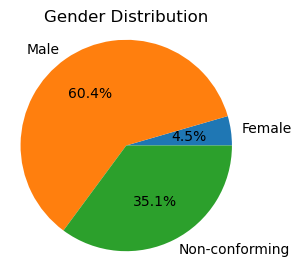

In [45]:
plt.figure(figsize=(3,3))
plt.pie(list(lst.values), labels=list(lst.keys()), autopct='%1.1f%%')  # Plot the pie chart
plt.title('Gender Distribution')  # Add a title
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Display the pie chart
plt.show()

In [47]:
df.shape

(98855, 21)

In [49]:
df.isnull().sum()['Gender']

0

## Country

In [52]:
df.groupby('Country')['Country'].count()

Country
Afghanistan                              64
Albania                                 109
Algeria                                 130
Andorra                                  15
Angola                                   11
                                       ... 
Venezuela, Bolivarian Republic of...    123
Viet Nam                                331
Yemen                                    13
Zambia                                    9
Zimbabwe                                 39
Name: Country, Length: 183, dtype: int64

In [54]:
df['Country'].isnull().sum()

412

In [56]:
df['Country'].fillna(method='ffill', inplace=True)

In [58]:
df['Country'].isnull().sum()

0

In [59]:
lst=df.groupby('Country')['Country'].count()
lst = lst.sort_values(ascending=False)
lst=lst[:50]

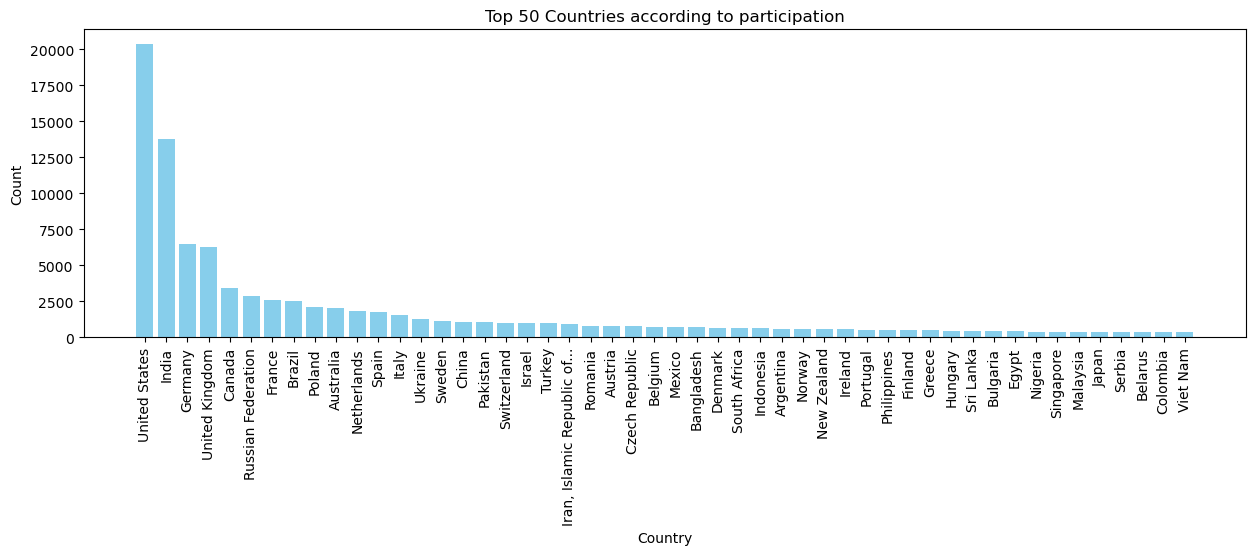

In [62]:
plt.figure(figsize=(15,4))
plt.bar(list(lst.keys()), lst.values, color='skyblue')  # Plotting the bars

# Adding labels and title
plt.xlabel('Country')  # Label for x-axis
plt.ylabel('Count')      # Label for y-axis
plt.title('Top 50 Countries according to participation')  # Title of the plot
plt.xticks(rotation=90)  # Rotate labels by 90 degrees

# Display the plot
plt.show()

## Hobby

In [64]:
df['Hobby'].isnull().sum()

0

In [65]:
df.groupby('Hobby')['Hobby'].count()

Hobby
No     18958
Yes    79897
Name: Hobby, dtype: int64

## UndergradMajor

In [70]:
df['UndergradMajor'].isnull().sum()

19819

In [71]:
df['UndergradMajor'].value_counts()

UndergradMajor
Computer science, computer engineering, or software engineering          50336
Another engineering discipline (ex. civil, electrical, mechanical)        6945
Information systems, information technology, or system administration     6507
A natural science (ex. biology, chemistry, physics)                       3050
Mathematics or statistics                                                 2818
Web development or web design                                             2418
A business discipline (ex. accounting, finance, marketing)                1921
A humanities discipline (ex. literature, history, philosophy)             1590
A social science (ex. anthropology, psychology, political science)        1377
Fine arts or performing arts (ex. graphic design, music, studio art)      1135
I never declared a major                                                   693
A health science (ex. nursing, pharmacy, radiology)                        246
Name: count, dtype: int64

In [74]:
def refactor_major(df):
    conditions_major = [(df['UndergradMajor'] == 'Computer science, computer engineering, or software engineering'), 
                        (df['UndergradMajor'] == 'Another engineering discipline (ex. civil, electrical, mechanical)'),
                        (df['UndergradMajor'] == 'Information systems, information technology, or system administration'), 
                        (df['UndergradMajor'] == 'Mathematics or statistics'),
                        (df['UndergradMajor'] == 'A natural science (ex. biology, chemistry, physics)') 
                        |(df['UndergradMajor'] == 'A health science (ex. nursing, pharmacy, radiology)'), 
                        (df['UndergradMajor'] == 'Web development or web design'), 
                        (df['UndergradMajor'] == 'A business discipline (ex. accounting, finance, marketing)'), 
                        (df['UndergradMajor'] == 'A humanities discipline (ex. literature, history, philosophy)')
                        | (df['UndergradMajor'] == 'A social science (ex. anthropology, psychology, political science)')
                        | (df['UndergradMajor'] == 'Fine arts or performing arts (ex. graphic design, music, studio art)'),
                        (df['UndergradMajor'] == 'I never declared a major') ]
    
    choices_major = ['Computer Science', 'Engineering', 'Info Systems', 'Math/Stat', 'Other Science',
                     'Web Design/Dev', 'Business', 'Arts and Science', 'No major']
    df['UndergradMajor'] = np.select(conditions_major, choices_major, default = np.NaN)
    return df

df = refactor_major(df)
df['UndergradMajor'].replace('nan', 'No major', inplace=True)

In [76]:
lst=df['UndergradMajor'].value_counts()

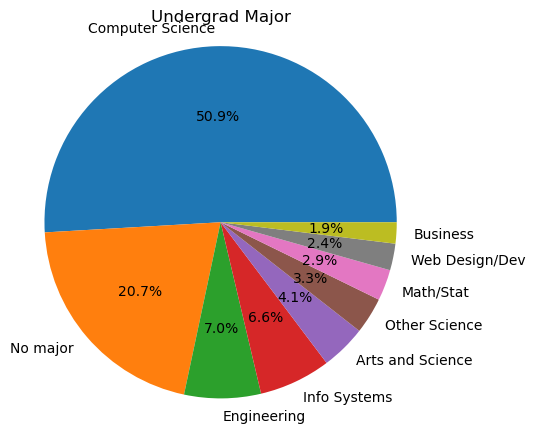

In [78]:
plt.figure(figsize=(5,5))
plt.pie(list(lst.values), labels=list(lst.keys()), autopct='%1.1f%%')  # Plot the pie chart
plt.title('Undergrad Major')  # Add a title
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Display the pie chart
plt.show()

In [80]:
df['UndergradMajor'].isnull().sum()

0

In [81]:
df.dropna(subset=['UndergradMajor'], inplace=True)

In [84]:
df['UndergradMajor'].isnull().sum()

0

## Job Status

In [87]:
df['JobSearchStatus'].value_counts()

JobSearchStatus
I’m not actively looking, but I am open to new opportunities    47556
I am not interested in new job opportunities                    19296
I am actively looking for a job                                 12636
Name: count, dtype: int64

In [89]:
df.dropna(subset=['JobSearchStatus'], inplace=True)

In [91]:
# refactoring JobStatus
# changing the jobstatus to seeking and non seeking
def refactor_job(df):
    '''function to change JobStatus category to Seeking and Non Seeking'''
    
    conditions_job = [(df['JobSearchStatus'] == 'I am actively looking for a job'),
                    (df['JobSearchStatus'] == 'I am not interested in new job opportunities')
                    | (df['JobSearchStatus'] == 'I’m not actively looking, but I am open to new opportunities')]
    
    choices_job = ['Seeking', 'Not seeking']
    
    df['JobSearchStatus'] = np.select(conditions_job, choices_job, default=np.nan)
                       
    return df

df = refactor_job(df)

In [93]:
df['JobSearchStatus'].value_counts()

JobSearchStatus
Not seeking    66852
Seeking        12636
Name: count, dtype: int64

In [95]:
df['JobSearchStatus'].isnull().sum()

0

## Employment

In [98]:
df['Employment'].value_counts()

Employment
Employed full-time                                      58551
Independent contractor, freelancer, or self-employed     7797
Not employed, but looking for work                       4604
Employed part-time                                       4170
Not employed, and not looking for work                   3210
Retired                                                   138
Name: count, dtype: int64

In [100]:
df['Employment'].isnull().sum()

1018

In [101]:
df['Employment'].fillna(method='ffill', inplace=True)

In [104]:
#im not considering the retired person here
#Refactoring the employment
def refactor_emp(df):
    
    conditions_emp = [(df['Employment'] == 'Employed full-time'),
                    (df['Employment'] == 'Independent contractor, freelancer, or self-employed'),
                    (df['Employment'] == 'Not employed, but looking for work'),
                    (df['Employment'] == 'Employed part-time')]
    
    choices_emp = ['Full-time', 'Self-employed', 'Not employed', 'Part-time']
    
    df['Employment'] = np.select(conditions_emp, choices_emp, default=np.nan)
                       
    return df

df = refactor_emp(df)

In [106]:
lst=df['Employment'].value_counts()

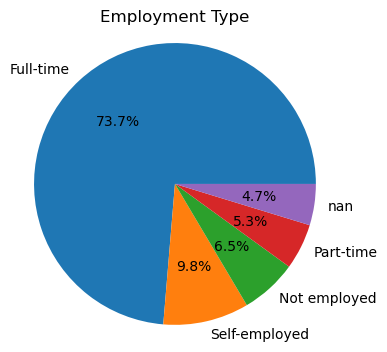

In [108]:
plt.figure(figsize=(4,4))
plt.pie(list(lst.values), labels=list(lst.keys()), autopct='%1.1f%%')  # Plot the pie chart
plt.title('Employment Type')  # Add a title
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Display the pie chart
plt.show()

In [110]:
df['Employment'].isnull().sum()

0

## JobSatisfaction

In [113]:
df['JobSatisfaction'].value_counts()

JobSatisfaction
Moderately satisfied                  25908
Extremely satisfied                   12395
Slightly satisfied                     9973
Slightly dissatisfied                  7037
Moderately dissatisfied                6286
Neither satisfied nor dissatisfied     4935
Extremely dissatisfied                 2472
Name: count, dtype: int64

In [115]:
df['JobSatisfaction'].isnull().sum()

10482

In [116]:
df['JobSatisfaction'].fillna(method='ffill', inplace=True)

In [119]:
df['JobSatisfaction'].isnull().sum()

0

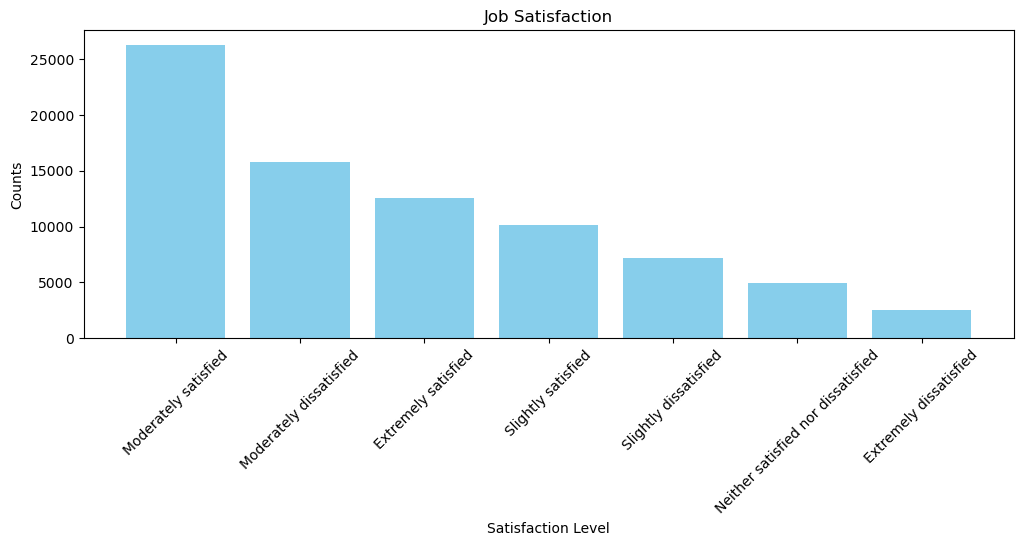

In [121]:
lst=df['JobSatisfaction'].value_counts()
plt.figure(figsize=(12,4))
plt.bar(list(lst.keys()), lst.values, color='skyblue')  # Plotting the bars

# Adding labels and title
plt.xlabel('Satisfaction Level')  # Label for x-axis
plt.ylabel('Counts')      # Label for y-axis
plt.title('Job Satisfaction')  # Title of the plot
plt.xticks(rotation=45)  # Rotate labels by 90 degrees

# Display the plot
plt.show()

## Ethnicity

In [123]:
df['RaceEthnicity'].isnull().sum()

23578

In [125]:
#count number of each Ethnicity
df.groupby('RaceEthnicity')['RaceEthnicity'].count()

RaceEthnicity
Black or of African descent                                                                                                                                 1204
Black or of African descent;East Asian                                                                                                                         7
Black or of African descent;East Asian;Hispanic or Latino/Latina                                                                                               2
Black or of African descent;East Asian;Hispanic or Latino/Latina;Middle Eastern;Native American, Pacific Islander, or Indigenous Australian                    1
Black or of African descent;East Asian;Hispanic or Latino/Latina;Middle Eastern;Native American, Pacific Islander, or Indigenous Australian;South Asian        1
                                                                                                                                                           ...  
Native American, Pac

In [128]:
#combine Ethnicity by str.match(if each string starts with a match of a regular expression pattern)
df.loc[df['RaceEthnicity'].str.match('Biracial') == True, 'RaceEthnicity'] = 'Biracial'
df.loc[df['RaceEthnicity'].str.match('Black or of African descent') == True, 'RaceEthnicity'] = 'Black or African descent'
df.loc[df['RaceEthnicity'].str.match('East Asian') == True, 'RaceEthnicity'] = 'East Asian'
df.loc[df['RaceEthnicity'].str.match('Hispanic or Latino') == True, 'RaceEthnicity'] = 'Hispanic or Latino'
df.loc[df['RaceEthnicity'].str.match('Indigenous') == True, 'RaceEthnicity'] = 'Indigenous'
df.loc[df['RaceEthnicity'].str.match('Middle Eastern') == True, 'RaceEthnicity'] = 'Middle Eastern'
df.loc[df['RaceEthnicity'].str.match('South') == True, 'RaceEthnicity'] = 'South Asian'
df.loc[df['RaceEthnicity'].str.match('White or of European descent') == True, 'RaceEthnicity'] = 'White or European descent'
df.loc[df['RaceEthnicity'].str.match('Multiracial') == True, 'RaceEthnicity'] = 'Multiracial'
df.loc[df['RaceEthnicity'].str.match('Native American') == True, 'RaceEthnicity'] = 'Native American'

In [129]:
df.groupby('RaceEthnicity')['RaceEthnicity'].count() #11 groups of Ethnicity after combining

RaceEthnicity
Black or African descent      1549
East Asian                    2787
Hispanic or Latino            3592
Middle Eastern                2176
Native American                286
South Asian                   6200
White or European descent    39320
Name: RaceEthnicity, dtype: int64

In [130]:
df['RaceEthnicity'].isnull().sum()

23578

In [131]:
df['RaceEthnicity']=df.groupby(['Country'])['RaceEthnicity'].bfill().ffill()

In [134]:
df['RaceEthnicity'].isnull().sum()

0

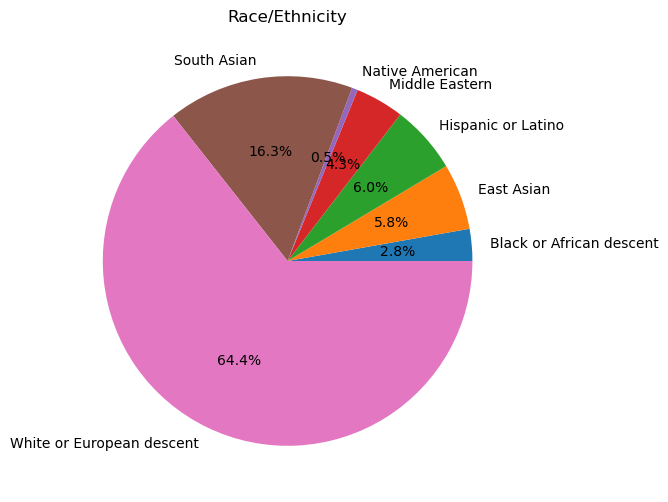

In [136]:
lst=df.groupby('RaceEthnicity')['RaceEthnicity'].count()
plt.figure(figsize=(6,6))
plt.pie(list(lst.values), labels=list(lst.keys()), autopct='%1.1f%%')  # Plot the pie chart
plt.title('Race/Ethnicity')  # Add a title
#plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Display the pie chart
plt.show()

## Developer Roles

In [140]:
df['DevType'].isnull().sum()

728

In [141]:
df['DevType'].fillna(method='ffill', inplace=True)

In [145]:
df.groupby('DevType')['DevType'].count()

DevType
Back-end developer                                                                                                                                                                                           5372
Back-end developer;C-suite executive (CEO, CTO, etc.)                                                                                                                                                          59
Back-end developer;C-suite executive (CEO, CTO, etc.);Data or business analyst                                                                                                                                  5
Back-end developer;C-suite executive (CEO, CTO, etc.);Data or business analyst;Data scientist or machine learning specialist                                                                                    1
Back-end developer;C-suite executive (CEO, CTO, etc.);Data or business analyst;Data scientist or machine learning specialist;Database administrator;Desi

In [147]:
#combine Ethnicity by str.match(if each string starts with a match of a regular expression pattern)
df.loc[df['DevType'].str.match('Back-end developer') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('Student') == True, 'DevType'] = 'Student'
df.loc[df['DevType'].str.match('QA or test developer') == True, 'DevType'] = 'Non developer'
df.loc[df['DevType'].str.match('Product manager') == True, 'DevType'] = 'Manager'
df.loc[df['DevType'].str.match('Mobile developer') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('Marketing or sales professional') == True, 'DevType'] = 'Non developer'

df.loc[df['DevType'].str.match('System administrator') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('Game or graphics developer') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('Full-stack developer') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('Front-end developer') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('Engineering manager') == True, 'DevType'] = 'Manager'
df.loc[df['DevType'].str.match('Embedded applications or devices developer') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('Educator or academic researcher') == True, 'DevType'] = 'Student'
df.loc[df['DevType'].str.match('DevOps specialist') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('Desktop or enterprise applications developer') == True, 'DevType'] = 'Developer'

df.loc[df['DevType'].str.match('Designer') == True, 'DevType'] = 'Non developer'
df.loc[df['DevType'].str.match('Database administrator') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('Data scientist or machine learning specialist') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('Data or business analyst') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('C-suite executive') == True, 'DevType'] = 'Developer'


In [148]:
df.groupby('DevType')['DevType'].count() #11 groups of Ethnicity after combining

DevType
Developer        73032
Manager            665
Non developer     2791
Student           3000
Name: DevType, dtype: int64

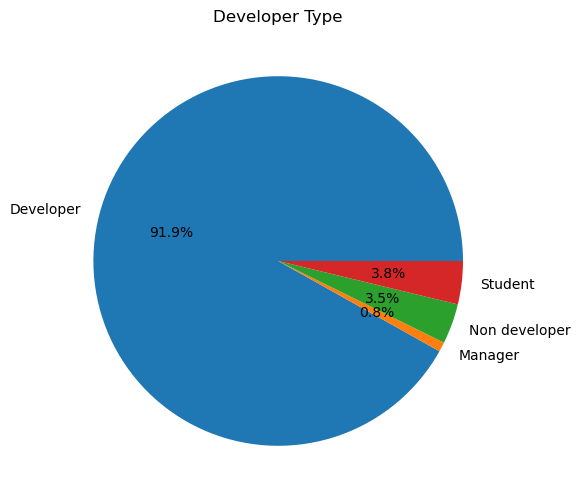

In [149]:
lst=df.groupby('DevType')['DevType'].count()
plt.figure(figsize=(6,6))
plt.pie(list(lst.values), labels=list(lst.keys()), autopct='%1.1f%%')  # Plot the pie chart
plt.title('Developer Type')  # Add a title
#plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Display the pie chart
plt.show()

## Language to worked with

In [151]:
df['LanguageWorkedWith'].value_counts().nlargest(3)

LanguageWorkedWith
C#;JavaScript;SQL;HTML;CSS     1235
JavaScript;PHP;SQL;HTML;CSS    1095
Java                            855
Name: count, dtype: int64

In [154]:
df['LanguageWorkedWith'].isnull().sum()

9985

In [155]:
df['LanguageWorkedWith'].fillna(method='ffill', inplace=True)

In [157]:
df['LanguageWorkedWith'].isnull().sum()

0

In [159]:
df['LanguageWorkedWith'].value_counts().nlargest(3)

LanguageWorkedWith
C#;JavaScript;SQL;HTML;CSS     1383
JavaScript;PHP;SQL;HTML;CSS    1226
Java                            989
Name: count, dtype: int64

## LanguageDesireNextYear

In [165]:
df['LanguageDesireNextYear'].value_counts().nlargest(3)

LanguageDesireNextYear
Python                                   718
C#;JavaScript;SQL;TypeScript;HTML;CSS    557
C#                                       522
Name: count, dtype: int64

In [167]:
df['LanguageDesireNextYear'].isnull().sum()

14147

In [168]:
df['LanguageDesireNextYear'].fillna(method='ffill', inplace=True)

In [171]:
df['LanguageDesireNextYear'].isnull().sum()

0

In [173]:
df['LanguageDesireNextYear'].value_counts().nlargest(3)

LanguageDesireNextYear
Python                                   878
C#;JavaScript;SQL;TypeScript;HTML;CSS    690
C#                                       629
Name: count, dtype: int64

## Years of coding (Exp)

In [176]:
df['YearsCodingProf'].value_counts().nlargest(10)

YearsCodingProf
0-2 years           22612
3-5 years           20883
6-8 years           11177
9-11 years           7456
12-14 years          4220
15-17 years          2987
18-20 years          2810
21-23 years          1352
30 or more years     1289
24-26 years           853
Name: count, dtype: int64

In [178]:
df['YearsCodingProf'].isnull().sum()

3349

In [179]:
df['YearsCodingProf'].fillna(method='ffill', inplace=True)

In [182]:
df['YearsCodingProf'].isnull().sum()

0

In [184]:
df['YearsCodingProf'].value_counts().nlargest(10)

YearsCodingProf
3-5 years           23773
0-2 years           22781
6-8 years           11274
9-11 years           7527
12-14 years          4267
15-17 years          3007
18-20 years          2841
21-23 years          1365
30 or more years     1294
24-26 years           856
Name: count, dtype: int64

## Years of coding (Non Exp)

In [187]:
df['YearsCoding'].value_counts().nlargest(10)

YearsCoding
3-5 years           19100
6-8 years           16537
9-11 years          10578
0-2 years            8022
12-14 years          7069
15-17 years          5459
18-20 years          4472
30 or more years     3136
21-23 years          2377
24-26 years          1671
Name: count, dtype: int64

In [189]:
df['YearsCoding'].isnull().sum()

105

In [191]:
df['YearsCoding'].fillna(method='ffill', inplace=True)

In [193]:
df['YearsCoding'].isnull().sum()

0

In [195]:
df['YearsCoding'].value_counts().nlargest(10)

YearsCoding
3-5 years           19135
6-8 years           16554
9-11 years          10585
0-2 years            8043
12-14 years          7077
15-17 years          5462
18-20 years          4476
30 or more years     3144
21-23 years          2378
24-26 years          1671
Name: count, dtype: int64

## Operating System

In [198]:
df['OperatingSystem'].value_counts().nlargest(10)

OperatingSystem
Windows        34268
MacOS          18638
Linux-based    16069
BSD/Unix         139
Name: count, dtype: int64

In [200]:
df['OperatingSystem'].isnull().sum()

10374

In [202]:
df['OperatingSystem'].fillna(method='ffill', inplace=True)

In [204]:
df['OperatingSystem'].isnull().sum()

0

In [206]:
lst=df['OperatingSystem'].value_counts().nlargest(10)

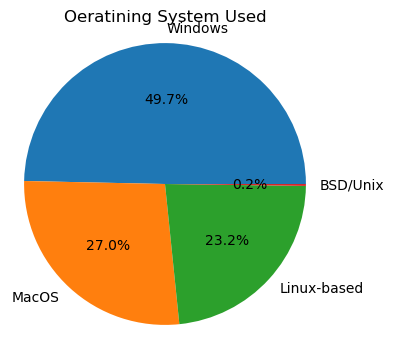

In [208]:
plt.figure(figsize=(4,4))
plt.pie(list(lst.values), labels=list(lst.keys()), autopct='%1.1f%%')  # Plot the pie chart
plt.title('Oeratining System Used')  # Add a title
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Display the pie chart
plt.show()

## Salary Type

In [211]:
df['SalaryType'].value_counts().nlargest(10)

SalaryType
Monthly    26201
Yearly     22541
Weekly      2248
Name: count, dtype: int64

In [212]:
df['SalaryType'].isnull().sum()

28498

In [214]:
df['SalaryType'].fillna(method='ffill', inplace=True)

In [217]:
df['SalaryType'].isnull().sum()

0

In [219]:
df['SalaryType'].value_counts().nlargest(10)

SalaryType
Monthly    40953
Yearly     34333
Weekly      4202
Name: count, dtype: int64

## Currency

In [222]:
df['Currency'].value_counts().nlargest(10)

Currency
U.S. dollars ($)               20599
Euros (€)                      15201
Indian rupees (₹)               7908
British pounds sterling (£)     4856
Canadian dollars (C$)           2535
Russian rubles (₽)              1768
Brazilian reais (R$)            1663
Australian dollars (A$)         1571
Polish złoty (zł)               1434
Swedish kroner (SEK)             864
Name: count, dtype: int64

In [223]:
df['Currency'].isnull().sum()

17483

In [225]:
df['Currency'].fillna(method='ffill', inplace=True)

In [228]:
df['Currency'].isnull().sum()

1

In [230]:
df.dropna(subset=['Currency'], inplace = True)

In [232]:
df['Currency'].value_counts().nlargest(10)

Currency
U.S. dollars ($)               26356
Euros (€)                      19465
Indian rupees (₹)              10152
British pounds sterling (£)     6194
Canadian dollars (C$)           3289
Russian rubles (₽)              2340
Brazilian reais (R$)            2122
Australian dollars (A$)         1970
Polish złoty (zł)               1856
Swedish kroner (SEK)            1101
Name: count, dtype: int64

## Salary

In [235]:
df['SalaryUSD'].value_counts().nlargest(10)

SalaryUSD
0.0          842
120000.0     524
100000.0     497
80000.0      396
1000000.0    382
110000.0     371
90000.0      364
150000.0     357
60000.0      351
75000.0      337
Name: count, dtype: int64

In [236]:
df['SalaryUSD'].isnull().sum() 

31786

In [239]:
mean_salary = df.groupby(['DevType','Country'])['SalaryUSD'].mean() 
mean_salary.nlargest(10)

DevType        Country      
Student        Saudi Arabia     1500000.0
Developer      Andorra           525089.5
Manager        Hungary           516000.0
               Netherlands       507175.0
Non developer  Algeria           360000.0
               Cyprus            293736.0
Developer      Liechtenstein     284028.0
Student        Finland           272212.0
Manager        Denmark           262920.6
Student        Israel            256522.4
Name: SalaryUSD, dtype: float64

In [241]:
means = df.groupby(['YearsCodingProf','DevType', 'Country'])['SalaryUSD'].transform('mean')
df['SalaryUSD'] = df['SalaryUSD'].fillna(means)

In [243]:
mean_salary = df.groupby(['YearsCodingProf','DevType','Country'])['SalaryUSD'].mean()
mean_salary.nlargest(10)

YearsCodingProf  DevType        Country                             
9-11 years       Student        Saudi Arabia                            1500000.0
12-14 years      Non developer  Norway                                  1000000.0
                 Student        Switzerland                             1000000.0
15-17 years      Non developer  Australia                               1000000.0
                                New Zealand                             1000000.0
21-23 years      Developer      Japan                                   1000000.0
                                Venezuela, Bolivarian Republic of...    1000000.0
                 Non developer  Sweden                                  1000000.0
                 Student        Finland                                 1000000.0
24-26 years      Manager        Canada                                  1000000.0
Name: SalaryUSD, dtype: float64

In [245]:
df.dropna(subset=['SalaryUSD'], inplace = True)

## Age

In [248]:
df['Age'].value_counts().nlargest(10)

Age
25 - 34 years old     30969
18 - 24 years old     14847
35 - 44 years old     10980
45 - 54 years old      3072
Under 18 years old     1549
55 - 64 years old       865
65 years or older       144
Name: count, dtype: int64

In [250]:
df['Age'].isnull().sum()

16374

In [252]:
df['Age'].fillna(method='ffill', inplace=True)

In [254]:
df['Age'].isnull().sum()

0

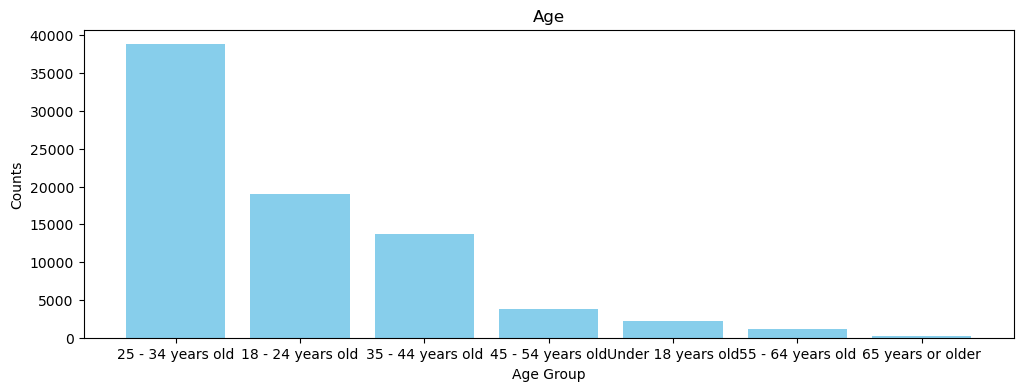

In [256]:
lst=df['Age'].value_counts().nlargest(10)
plt.figure(figsize=(12,4))
plt.bar(list(lst.keys()), lst.values, color='skyblue')  # Plotting the bars

# Adding labels and title
plt.xlabel('Age Group')  # Label for x-axis
plt.ylabel('Counts')      # Label for y-axis
plt.title('Age')  # Title of the plot
#plt.xticks(rotation=45)  # Rotate labels by 90 degrees

# Display the plot
plt.show()

In [259]:
print(df.isnull().sum())

Age                           0
SalaryUSD                     0
Country                       0
Currency                      0
DevType                       0
Employment                    0
RaceEthnicity                 0
Gender                        0
SalaryType                    0
Hobby                         0
JobSatisfaction               0
JobSearchStatus               0
OperatingSystem               0
UndergradMajor                0
YearsCoding                   0
YearsCodingProf               0
LanguageDesireNextYear        0
LanguageWorkedWith            0
FormalEducation            1549
PlatformWorkedWith        19350
PlatformDesireNextYear    23215
dtype: int64


In [261]:
df['FormalEducation'].isnull().sum()

1549

In [263]:
df['FormalEducation'].value_counts()

FormalEducation
Bachelor’s degree (BA, BS, B.Eng., etc.)                                              36010
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           17529
Some college/university study without earning a degree                                 9737
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     7088
Associate degree                                                                       2407
Other doctoral degree (Ph.D, Ed.D., etc.)                                              1754
Primary/elementary school                                                              1217
Professional degree (JD, MD, etc.)                                                     1073
I never completed any formal education                                                  436
Name: count, dtype: int64

In [265]:
#Changing column's name
df.rename(columns={'FormalEducation':'EdLevel'}, inplace =True)
#Refactoring EdLevel
def refactor_ed(df):
    '''function to change Education level category to Bachelors, Masters, Professional, Associate, Doctorate, No Degree'''
    conditions_ed = [(df['EdLevel'] == 'Associate degree'),
                    (df['EdLevel'] == 'Bachelor’s degree (BA, BS, B.Eng., etc.)'),
                    (df['EdLevel'] == 'Master’s degree (MA, MS, M.Eng., MBA, etc.)'),
                    (df['EdLevel'] == 'Professional degree (JD, MD, etc.)'),   
                    (df['EdLevel'] == 'Other doctoral degree (Ph.D, Ed.D., etc.)'),
                    (df['EdLevel'] == 'Some college/university study without earning a degree') 
                    | (df['EdLevel'] == 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)') 
                    | (df['EdLevel'] == 'Primary/elementary school')
                    | (df['EdLevel'] == 'I never completed any formal education')]
    
    choices_ed = ['Associate', 'Bachelors', 'Masters', 'Professional',  'Doctorate', 'No Degree']
    df['EdLevel'] = np.select(conditions_ed, choices_ed, default = np.NaN)
    return df

# applying function to subsets
df = refactor_ed(df)
#Assigining the surveyors who havent mentioned their education level to Bachelor’s degree
df['EdLevel'].replace('nan', 'Bachelors', inplace=True)

df['EdLevel'].value_counts()

EdLevel
Bachelors       37559
No Degree       18478
Masters         17529
Associate        2407
Doctorate        1754
Professional     1073
Name: count, dtype: int64

## Cleaned Dataset : 2018_Survey

In [268]:
cleaned_2018 = df[df.notnull()]
cleaned_2018.shape

(78800, 21)

In [270]:
cleaned_2018.head(10)

Age      SalaryUSD         Country  \
1   35 - 44 years old   70841.000000  United Kingdom   
2   35 - 44 years old  153030.333333   United States   
3   35 - 44 years old  165809.207657   United States   
4   18 - 24 years old   21426.000000    South Africa   
5   18 - 24 years old   41671.000000  United Kingdom   
6   18 - 24 years old  120000.000000   United States   
7   25 - 34 years old   93336.000000         Nigeria   
8   35 - 44 years old  250000.000000   United States   
13  35 - 44 years old   26023.003365           India   
14  18 - 24 years old       0.000000     Netherlands   

                       Currency        DevType Employment  \
1   British pounds sterling (£)      Developer  Full-time   
2   British pounds sterling (£)        Manager  Full-time   
3              U.S. dollars ($)      Developer  Full-time   
4       South African rands (R)      Developer  Full-time   
5   British pounds sterling (£)      Developer  Full-time   
6              U.S. dollars ($)      Developer  Full-time   
7              U.S. dollars ($)  Non developer  Full-time   
8              U.S. dollars ($)      Developer  Full-time   
13             U.S. dollars ($)      Developer  Full-time   
14                    Euros (€)      Developer  Full-time   

                RaceEthnicity          Gender SalaryType Hobby  ...  \
1   White or European descent            Male     Yearly   Yes  ...   
2   White or European descent  Non-conforming     Yearly   Yes  ...   
3   White or European descent            Male     Yearly    No  ...   
4   White or European descent            Male     Yearly   Yes  ...   
5   White or European descent            Male     Yearly   Yes  ...   
6   White or European descent            Male     Yearly   Yes  ...   
7    Black or African descent          Female     Yearly   Yes  ...   
8   White or European descent            Male     Yearly   Yes  ...   
13                South Asian  Non-conforming     Yearly    No  ...   
14  White or European descent            Male    Monthly    No  ...   

   JobSearchStatus OperatingSystem    UndergradMajor       YearsCoding  \
1          Seeking     Linux-based     Other Science  30 or more years   
2      Not seeking     Linux-based  Computer Science       24-26 years   
3      Not seeking         Windows  Computer Science       18-20 years   
4      Not seeking         Windows  Computer Science         6-8 years   
5          Seeking     Linux-based  Computer Science         6-8 years   
6      Not seeking           MacOS  Computer Science        9-11 years   
7      Not seeking         Windows  Computer Science         0-2 years   
8      Not seeking           MacOS  Arts and Science  30 or more years   
13     Not seeking     Linux-based       Engineering         3-5 years   
14     Not seeking         Windows          No major         0-2 years   

   YearsCodingProf                             LanguageDesireNextYear  \
1      18-20 years                                          Go;Python   
2        6-8 years                                          Go;Python   
3      12-14 years   C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell   
4        0-2 years               Assembly;C;C++;Matlab;SQL;Bash/Shell   
5        3-5 years  C#;Go;Java;JavaScript;Python;SQL;TypeScript;HT...   
6        0-2 years                    C;Go;JavaScript;Python;HTML;CSS   
7        3-5 years                       Matlab;SQL;Kotlin;Bash/Shell   
8      21-23 years                          Erlang;Go;Python;Rust;SQL   
13       3-5 years                                        Java;Python   
14       0-2 years                                        Java;Python   

                                   LanguageWorkedWith    EdLevel  \
1                        JavaScript;Python;Bash/Shell  Bachelors   
2                        JavaScript;Python;Bash/Shell  Associate   
3    C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell  Bachelors   
4                  C;C++;Java;Matlab;R;SQL;Bash/Shell  N

## After Cleaning Dataset 2018

In [273]:
#Find % of missing data
missing_count = df.isnull().sum() #number of missing
total_cells = np.product(df.shape) # number of cells (cols x rows)
total_missing = missing_count.sum()
missing_percent = (total_missing*100)/total_cells

print('Total : ', total_cells)
print('Total missing : ', total_missing)
print('Missing Percentage: ', missing_percent, '%')

Total :  1654800
Total missing :  42565
Missing Percentage:  2.572214164853759 %


## Stackoverflow 2019 Dataset

In [276]:
na_vals = ['NA', 'Missing']
survey_main_df = pd.read_csv(r"C:\Users\SHRISTI\OneDrive\Desktop\GitHub\survey_results_public_2019.csv", na_values=na_vals)
schema_df = pd.read_csv(r"C:\Users\SHRISTI\OneDrive\Desktop\GitHub\survey_results_public_2019.csv")

## Data Cleaning

In [278]:
#Selecting only the required columns for analysis
survey_df_2019 = survey_main_df[['Age', 'CareerSat', 'ConvertedComp', 'Country', 'Dependents', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'Hobbyist', 'ImpSyn', 'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith', 'MainBranch',
 'UndergradMajor', 'YearsCodePro', 'DevType','PlatformWorkedWith','PlatformDesireNextYear']]

In [279]:

#changing the name of columns for easier understanding
# 'MainBranch': 'Profession'
# 'ConvertedComp': 'SalaryUSD'
# 'CareerSat': 'JobSatisfaction'
# 'ImpSyn' : 'CompetenceLevel'
# 'JobSat' : 'CurrentJobSatis'
# 'JobSeek' : 'JobStatus'


survey_df_2019.rename(columns={'MainBranch': 'Profession', 'ConvertedComp': 'SalaryUSD',  'CareerSat': 'JobSatisfaction', 'ImpSyn' : 'CompetenceLevel', 'JobSat' : 'CurrentJobSatis', 'JobSeek' : 'JobStatus' }, inplace =True)

In [280]:
#sorting the columns alphabetically
survey_df_2019.sort_index(axis=1).head(3)

Age CompetenceLevel                 Country     CurrentJobSatis  \
0  14.0             NaN          United Kingdom                 NaN   
1  19.0             NaN  Bosnia and Herzegovina                 NaN   
2  28.0         Average                Thailand  Slightly satisfied   

  Dependents                                            DevType  \
0         No                                                NaN   
1         No  Developer, desktop or enterprise applications;...   
2        Yes  Designer;Developer, back-end;Developer, front-...   

                                             EdLevel  \
0                          Primary/elementary school   
1  Secondary school (e.g. American high school, G...   
2           Bachelor’s degree (BA, BS, B.Eng., etc.)   

                               Employment Ethnicity Gender  ...  \
0  Not employed, and not looking for work       NaN    Man  ...   
1      Not employed, but looking for work       NaN    Man  ...   
2                      Employed full-time       NaN    Man  ...   

      JobSatisfaction                                          JobStatus  \
0                 NaN                                                NaN   
1                 NaN                    I am actively looking for a job   
2  Slightly satisfied  I’m not actively looking, but I am open to new...   

                            LanguageDesireNextYear  \
0  C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL   
1                      C++;HTML/CSS;JavaScript;SQL   
2                                  Elixir;HTML/CSS   

                LanguageWorkedWith   PlatformDesireNextYear  \
0  HTML/CSS;Java;JavaScript;Python  Android;Arduino;Windows   
1              C++;HTML/CSS;Python                  Windows   
2                         HTML/CSS                      NaN   

  PlatformWorkedWith                                         Profession  \
0      MacOS;Windows             I am a student who is learning to code   
1            Windows             I am a student who is learning to code   
2                NaN  I am not primarily a developer, but I write co...   

  SalaryUSD                 UndergradMajor YearsCodePro  
0       NaN                            NaN          NaN  
1       NaN                            NaN          NaN  
2    8820.0  Web development or web design            1  

[3 rows x 21 columns]

In [281]:
#datatype of survey data
survey_df_2019.dtypes

Age                       float64
JobSatisfaction            object
SalaryUSD                 float64
Country                    object
Dependents                 object
EdLevel                    object
Employment                 object
Ethnicity                  object
Gender                     object
Hobbyist                   object
CompetenceLevel            object
CurrentJobSatis            object
JobStatus                  object
LanguageDesireNextYear     object
LanguageWorkedWith         object
Profession                 object
UndergradMajor             object
YearsCodePro               object
DevType                    object
PlatformWorkedWith         object
PlatformDesireNextYear     object
dtype: object

## Data Validation - Total Cells vs Missing %

In [283]:
#Find % of missing data
missing_count = survey_df_2019.isnull().sum() #number of missing
total_cells = np.product(survey_df_2019.shape) # number of cells (cols x rows)
total_missing = missing_count.sum()
missing_percent = (total_missing*100)/total_cells

print('Total : ', total_cells)
print('Total missing : ', total_missing)
print('Missing Percentage: ', missing_percent, '%')

Total :  1866543
Total missing :  189578
Missing Percentage:  10.15663716292633 %


## Cleaning and Refactoring column values

### Gender

In [286]:
survey_df_2019['Gender'].value_counts()

Gender
Man                                                            77919
Woman                                                           6344
Non-binary, genderqueer, or gender non-conforming                597
Man;Non-binary, genderqueer, or gender non-conforming            181
Woman;Non-binary, genderqueer, or gender non-conforming          163
Woman;Man                                                        132
Woman;Man;Non-binary, genderqueer, or gender non-conforming       70
Name: count, dtype: int64

In [287]:
#lets refactor Gender values to Male, female and Non binary
#For the purpose of our data analysis we are considering three gender category. This not to defame any gender.
#refactoring Gender

def refactor_gender(df):
    '''function to change gender category to Male, Female, Non binary'''
    conditions = [(df['Gender'] == 'Man') | (df['Gender'] == 'Man;Non-binary, genderqueer, or gender non-conforming'),
                  (df['Gender'] == 'Woman') | (df['Gender'] == 'Woman;Non-binary, genderqueer, or gender non-conforming'),
                  (df['Gender'] == 'Non-binary, genderqueer, or gender non-conforming') 
                  | (df['Gender'] == 'Woman;Man') 
                  | (df['Gender'] == 'Woman;Man;Non-binary, genderqueer, or gender non-conforming')]

    values = ['Man', 'Woman', 'Non-binary']

    df['Gender'] = np.select(conditions, values, default = np.NaN)
    
    return df
            
survey_df_2019 = refactor_gender(survey_df_2019)
survey_df_2019['Gender'].replace('nan', 'Non-binary', inplace =True)

In [288]:
survey_df_2019['Gender'] = survey_df_2019['Gender'].fillna('Non-binary')

In [289]:
#Assigining the surveyors who havent mentioned their gender to Non-Binary category
survey_df_2019.isnull().sum()['Gender']

0

In [290]:
survey_df_2019.groupby('Gender')['Gender'].count()

Gender
Man           78100
Non-binary     4276
Woman          6507
Name: Gender, dtype: int64

## Age

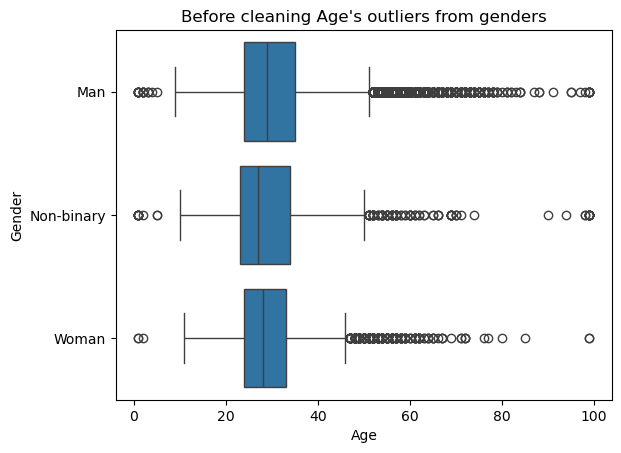

In [292]:
sns.boxplot(x='Age', y= 'Gender', data=survey_df_2019)
plt.title("Before cleaning Age's outliers from genders")
plt.show()

In [293]:
#We are considering developes of age 15 to 60
filt = (survey_df_2019['Age'] >= 15) & (survey_df_2019['Age'] <= 60)
survey_df_2019 = survey_df_2019[filt]

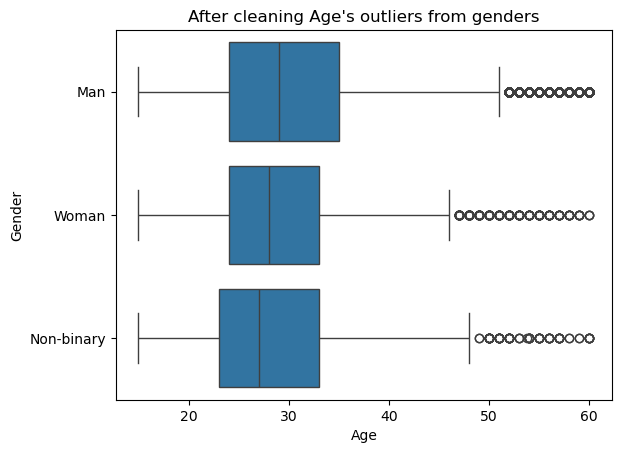

In [294]:
sns.boxplot(x='Age', y= 'Gender', data=survey_df_2019)
plt.title("After cleaning Age's outliers from genders")
plt.show()

In [309]:
survey_df_2019['Age'].isnull().sum()

0

## Profession column (Mainbranch)

In [312]:
survey_df_2019['Profession'].value_counts()

Profession
I am a developer by profession                                                   59247
I am a student who is learning to code                                            8382
I am not primarily a developer, but I write code sometimes as part of my work     6531
I code primarily as a hobby                                                       2370
I used to be a developer by profession, but no longer am                          1210
Name: count, dtype: int64

In [314]:
survey_df_2019['Profession'].isnull().sum()

255

In [316]:
survey_df_2019['Profession'].fillna(method='ffill', inplace=True)

In [318]:
survey_df_2019['Profession'].value_counts()

Profession
I am a developer by profession                                                   59502
I am a student who is learning to code                                            8382
I am not primarily a developer, but I write code sometimes as part of my work     6531
I code primarily as a hobby                                                       2370
I used to be a developer by profession, but no longer am                          1210
Name: count, dtype: int64

In [320]:

#Lets refactor column values of Profession column
#refactoring profession column

def refactor_prof(df):
    '''function to change Profession category to Developer, Student, Non-Developer, Novoice, Ex-Developer'''
    conditions_prof = [(df['Profession'] == 'I am a developer by profession'),
                       (df['Profession'] == 'I am a student who is learning to code'),
                       (df['Profession'] == 'I am not primarily a developer, but I write code sometimes as part of my work'),
                       (df['Profession'] == 'I code primarily as a hobby'),
                       (df['Profession'] == 'I used to be a developer by profession, but no longer am')]
    
    choices_prof = ['Developer', 'Student', 'Non developer', 'Novoice', 'Ex-Developer']
    
    df['Profession'] = np.select(conditions_prof, choices_prof, default=np.nan)
                       
    return df

survey_df_2019 = refactor_prof(survey_df_2019)

In [322]:
survey_df_2019['Profession'].value_counts()

Profession
Developer        59502
Student           8382
Non developer     6531
Novoice           2370
Ex-Developer      1210
Name: count, dtype: int64

## EdLevel

In [325]:
survey_df_2019['EdLevel'].value_counts()

EdLevel
Bachelor’s degree (BA, BS, B.Eng., etc.)                                              34926
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           17305
Some college/university study without earning a degree                                 9571
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     7638
Associate degree                                                                       2585
Other doctoral degree (Ph.D, Ed.D., etc.)                                              2032
Professional degree (JD, MD, etc.)                                                     1037
Primary/elementary school                                                               981
I never completed any formal education                                                  352
Name: count, dtype: int64

In [327]:
survey_df_2019['EdLevel'].isnull().sum()

1568

In [329]:
#  Refactoring EdLevel
def refactor_ed(df):
    '''function to change Education level category to Bachelors, Masters, Professional, Associate, Doctorate, No Degree'''
    conditions_ed = [(df['EdLevel'] == 'Bachelor’s degree (BA, BS, B.Eng., etc.)'),
                     (df['EdLevel'] == 'Master’s degree (MA, MS, M.Eng., MBA, etc.)'),
                     (df['EdLevel'] == 'Professional degree (JD, MD, etc.)'),   
                     (df['EdLevel'] == 'Associate degree'),
                     (df['EdLevel'] == 'Other doctoral degree (Ph.D, Ed.D., etc.)'),
                     (df['EdLevel'] == 'Some college/university study without earning a degree') 
                     | (df['EdLevel'] == 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)') 
                     | (df['EdLevel'] == 'Primary/elementary school')
                     | (df['EdLevel'] == 'I never completed any formal education')]

    choices_ed = ['Bachelors', 'Masters', 'Professional', 'Associate', 'Doctorate', 'No Degree']

    df['EdLevel'] = np.select(conditions_ed, choices_ed, default = np.NaN)
    
    return df

# applying function to subsets
survey_df_2019 = refactor_ed(survey_df_2019)
survey_df_2019['EdLevel'].replace('nan', 'Bachelors', inplace=True)

In [331]:
survey_df_2019['EdLevel'].value_counts()

EdLevel
Bachelors       36494
No Degree       18542
Masters         17305
Associate        2585
Doctorate        2032
Professional     1037
Name: count, dtype: int64

In [333]:
survey_df_2019.isnull().sum()['EdLevel']

0

## Undergrad Major

In [336]:
survey_df_2019['UndergradMajor'].value_counts().nlargest(10)

UndergradMajor
Computer science, computer engineering, or software engineering          42211
Another engineering discipline (ex. civil, electrical, mechanical)        5472
Information systems, information technology, or system administration     4646
Web development or web design                                             2975
A natural science (ex. biology, chemistry, physics)                       2866
Mathematics or statistics                                                 2557
A business discipline (ex. accounting, finance, marketing)                1633
A humanities discipline (ex. literature, history, philosophy)             1408
A social science (ex. anthropology, psychology, political science)        1246
Fine arts or performing arts (ex. graphic design, music, studio art)      1124
Name: count, dtype: int64

In [338]:
survey_df_2019['UndergradMajor'].isnull().sum()

10787

In [340]:
survey_df_2019['UndergradMajor'].fillna(method='ffill', inplace=True)

In [342]:
survey_df_2019['UndergradMajor'].value_counts().nlargest(15)

UndergradMajor
Computer science, computer engineering, or software engineering          49010
Another engineering discipline (ex. civil, electrical, mechanical)        6368
Information systems, information technology, or system administration     5392
Web development or web design                                             3424
A natural science (ex. biology, chemistry, physics)                       3285
Mathematics or statistics                                                 2984
A business discipline (ex. accounting, finance, marketing)                1908
A humanities discipline (ex. literature, history, philosophy)             1627
A social science (ex. anthropology, psychology, political science)        1431
Fine arts or performing arts (ex. graphic design, music, studio art)      1327
I never declared a major                                                   922
A health science (ex. nursing, pharmacy, radiology)                        316
Name: count, dtype: int64

In [344]:
survey_df_2019['UndergradMajor'].isnull().sum()

1

In [346]:
survey_df_2019.dropna(subset=['UndergradMajor'], inplace=True)

In [348]:
survey_df_2019['UndergradMajor'].isnull().sum()

0

In [350]:

# Refactoring UndergradMajor
def refactor_major(df):
    '''function to change undergrad major category to Computer Science, Engineering, Info Systems, Math/Stat, 
        Other Science, Web Design/Dev, Business, Arts and Science'''
    
    
    conditions_major = [(df['UndergradMajor'] == 'Computer science, computer engineering, or software engineering'),
                        (df['UndergradMajor'] == 'Another engineering discipline (ex. civil, electrical, mechanical)'),
                        (df['UndergradMajor'] == 'Information systems, information technology, or system administration'),
                        (df['UndergradMajor'] == 'Mathematics or statistics'),
                        (df['UndergradMajor'] == 'I never declared a major'),
                        (df['UndergradMajor'] == 'A natural science (ex. biology, chemistry, physics)')
                        |(df['UndergradMajor'] == 'A health science (ex. nursing, pharmacy, radiology)'),
                        (df['UndergradMajor'] == 'Web development or web design'),
                        (df['UndergradMajor'] == 'A business discipline (ex. accounting, finance, marketing)'),
                        (df['UndergradMajor'] == 'A humanities discipline (ex. literature, history, philosophy)')
                        | (df['UndergradMajor'] == 'A social science (ex. anthropology, psychology, political science)')
                        | (df['UndergradMajor'] == 'Fine arts or performing arts (ex. graphic design, music, studio art)')]

    choices_major = ['Computer Science', 'Engineering', 'Info Systems', 'Math/Stat', 'No Major', 'Other Science',
                     'Web Design/Dev', 'Business', 'Arts and Science']

    df['UndergradMajor'] = np.select(conditions_major, choices_major, default = np.NaN)
    
    return df

# applying function to subsets
survey_df_2019 = refactor_major(survey_df_2019)

In [352]:
survey_df_2019['UndergradMajor'].value_counts()

UndergradMajor
Computer Science    49010
Engineering          6368
Info Systems         5392
Arts and Science     4385
Other Science        3601
Web Design/Dev       3424
Math/Stat            2984
Business             1908
No Major              922
Name: count, dtype: int64

## Job Status

In [355]:
survey_df_2019['JobStatus'].value_counts()

JobStatus
I’m not actively looking, but I am open to new opportunities    42258
I am not interested in new job opportunities                    19161
I am actively looking for a job                                 10491
Name: count, dtype: int64

In [357]:
survey_df_2019['JobStatus'].isnull().sum()

6084

In [359]:
survey_df_2019['JobStatus'].fillna(method='ffill', inplace=True)

In [361]:
survey_df_2019['JobStatus'].isnull().sum()

0

In [363]:
survey_df_2019['JobStatus'].value_counts()

JobStatus
I’m not actively looking, but I am open to new opportunities    45917
I am not interested in new job opportunities                    20712
I am actively looking for a job                                 11365
Name: count, dtype: int64

In [365]:
survey_df_2019.dropna(subset=['JobStatus'], inplace=True)

In [367]:

# refactoring JobStatus
# changing the jobstatus to seeking and non seeking
def refactor_job(df):
    '''function to change JobStatus category to Seeking and Non Seeking'''
    
    conditions_job = [(df['JobStatus'] == 'I am actively looking for a job'),
                    (df['JobStatus'] == 'I am not interested in new job opportunities')
                    | (df['JobStatus'] == 'I’m not actively looking, but I am open to new opportunities')]
    
    choices_job = ['Seeking', 'Not seeking']
    
    df['JobStatus'] = np.select(conditions_job, choices_job, default=np.nan)
                       
    return df

survey_df_2019 = refactor_job(survey_df_2019)

In [369]:
survey_df_2019['JobStatus'].value_counts()

JobStatus
Not seeking    66629
Seeking        11365
Name: count, dtype: int64

## JobSatisfaction

In [372]:
survey_df_2019['JobSatisfaction'].value_counts()

JobSatisfaction
Very satisfied                        26584
Slightly satisfied                    22739
Slightly dissatisfied                  6843
Neither satisfied nor dissatisfied     6158
Very dissatisfied                      3203
Name: count, dtype: int64

In [373]:
survey_df_2019['JobSatisfaction'].isnull().sum()

12467

In [376]:
survey_df_2019['JobSatisfaction'].fillna(method='ffill', inplace=True)

In [378]:
survey_df_2019['JobSatisfaction'].isnull().sum()

0

In [380]:
survey_df_2019['JobSatisfaction'].value_counts()

JobSatisfaction
Very satisfied                        31507
Slightly satisfied                    26970
Slightly dissatisfied                  8343
Neither satisfied nor dissatisfied     7313
Very dissatisfied                      3861
Name: count, dtype: int64

## Employment

In [383]:
survey_df_2019['Employment'].value_counts()

Employment
Employed full-time                                      58069
Independent contractor, freelancer, or self-employed     7305
Not employed, but looking for work                       4703
Employed part-time                                       3958
Not employed, and not looking for work                   2914
Retired                                                    76
Name: count, dtype: int64

In [385]:
survey_df_2019['Employment'].isnull().sum()

969

In [387]:
survey_df_2019['Employment'].fillna(method='ffill', inplace=True)

In [389]:
survey_df_2019['Employment'].isnull().sum()

0

In [391]:
survey_df_2019['Employment'].value_counts()

Employment
Employed full-time                                      58771
Independent contractor, freelancer, or self-employed     7397
Not employed, but looking for work                       4770
Employed part-time                                       4017
Not employed, and not looking for work                   2960
Retired                                                    79
Name: count, dtype: int64

In [393]:
#Refactoring the employment
def refactor_emp(df):
    '''function to change Employment category to Full-time, Self-employed, Not employed, Part-time '''
    conditions_emp = [(df['Employment'] == 'Employed full-time'),
                    (df['Employment'] == 'Independent contractor, freelancer, or self-employed'),
                    (df['Employment'] == 'Not employed, but looking for work')
                    | (df['Employment'] == 'Not employed, and not looking for work')
                    | (df['Employment'] == 'Retired'),
                    (df['Employment'] == 'Employed part-time')]
    
    choices_emp = ['Full-time', 'Self-employed', 'Not employed', 'Part-time']
    
    df['Employment'] = np.select(conditions_emp, choices_emp, default=np.nan)
                       
    return df


survey_df_2019 = refactor_emp(survey_df_2019)

In [395]:
survey_df_2019['Employment'].value_counts()

Employment
Full-time        58771
Not employed      7809
Self-employed     7397
Part-time         4017
Name: count, dtype: int64

## Ethnicity

In [398]:
ethnicity_list = survey_df_2019['Ethnicity'].unique().tolist()

In [400]:
#here, you can see that we have long list of values. lets refactor them
ethnicity_list

[nan,
 'White or of European descent',
 'White or of European descent;Multiracial',
 'East Asian',
 'Black or of African descent;East Asian;Hispanic or Latino/Latina;Middle Eastern;Native American, Pacific Islander, or Indigenous Australian;South Asian;White or of European descent;Biracial;Multiracial',
 'Black or of African descent',
 'Hispanic or Latino/Latina;Multiracial',
 'Hispanic or Latino/Latina',
 'Middle Eastern',
 'South Asian',
 'Multiracial',
 'East Asian;South Asian',
 'Biracial',
 'Native American, Pacific Islander, or Indigenous Australian;White or of European descent',
 'Black or of African descent;White or of European descent;Biracial',
 'Middle Eastern;White or of European descent',
 'Native American, Pacific Islander, or Indigenous Australian',
 'Black or of African descent;White or of European descent',
 'White or of European descent;Biracial;Multiracial',
 'Hispanic or Latino/Latina;White or of European descent',
 'East Asian;White or of European descent;Biracial'

In [402]:
len(ethnicity_list)

173

In [404]:
#refactoring long list of values into categories.
survey_df_2019.loc[survey_df_2019['Ethnicity'].str.match('Biracial', na=False), 'Ethnicity'] = 'Biracial'
survey_df_2019.loc[survey_df_2019['Ethnicity'].str.match('Black or of African descent', na=False), 'Ethnicity'] = 'Black or of African descent'
survey_df_2019.loc[survey_df_2019['Ethnicity'].str.match('East Asian', na=False), 'Ethnicity'] = 'East Asian'
survey_df_2019.loc[survey_df_2019['Ethnicity'].str.match('Hispanic or Latino', na=False), 'Ethnicity'] = 'Hispanic or Latino'
survey_df_2019.loc[survey_df_2019['Ethnicity'].str.match('Indigenous', na=False), 'Ethnicity'] = 'Indigenous'
survey_df_2019.loc[survey_df_2019['Ethnicity'].str.match('Middle Eastern', na=False), 'Ethnicity'] = 'Middle Eastern'
survey_df_2019.loc[survey_df_2019['Ethnicity'].str.match('South Asian', na=False), 'Ethnicity'] = 'South Asian'
survey_df_2019.loc[survey_df_2019['Ethnicity'].str.match('White or of European descent', na=False), 'Ethnicity'] = 'White or of European descent'
survey_df_2019.loc[survey_df_2019['Ethnicity'].str.match('Multiracial', na=False), 'Ethnicity'] = 'Multiracial'
survey_df_2019.loc[survey_df_2019['Ethnicity'].str.match('Native American', na=False), 'Ethnicity'] = 'Native American'

In [405]:
survey_df_2019['Ethnicity'].isnull().sum()

7804

In [407]:
survey_df_2019['Ethnicity'].value_counts()

Ethnicity
White or of European descent    47587
South Asian                      7417
Hispanic or Latino               4901
East Asian                       3698
Middle Eastern                   3057
Black or of African descent      2360
Multiracial                       572
Native American                   322
Biracial                          276
Name: count, dtype: int64

In [410]:
survey_df_2019['Ethnicity']=survey_df_2019.groupby(['Country'])['Ethnicity'].bfill().ffill()

In [412]:
survey_df_2019['Ethnicity'].isnull().sum()

0

In [414]:
survey_df_2019['Ethnicity'].value_counts()

Ethnicity
White or of European descent    50883
South Asian                     10061
Hispanic or Latino               5204
East Asian                       4391
Middle Eastern                   3596
Black or of African descent      2570
Multiracial                       632
Native American                   355
Biracial                          302
Name: count, dtype: int64

## Dependents

In [417]:
survey_df_2019["Dependents"].value_counts()

Dependents
No     46457
Yes    28918
Name: count, dtype: int64

In [419]:
survey_df_2019["Dependents"].isnull().sum()

2619

In [421]:
#Lets consider that people who didnt respond has no dependents for the purpose of analysis
survey_df_2019["Dependents"].fillna(method='ffill', inplace=True)

In [423]:
survey_df_2019["Dependents"].isnull().sum()

0

In [425]:
survey_df_2019["Dependents"].value_counts()

Dependents
No     48085
Yes    29909
Name: count, dtype: int64

## DevType

In [428]:
survey_df_2019['DevType'].isnull().sum()

5025

In [430]:
survey_df_2019['DevType'].value_counts().nlargest(10)

DevType
Developer, full-stack                                                                                           7636
Developer, back-end                                                                                             4387
Developer, back-end;Developer, front-end;Developer, full-stack                                                  2216
Developer, front-end                                                                                            1985
Developer, mobile                                                                                               1934
Developer, back-end;Developer, full-stack                                                                       1886
Student                                                                                                         1289
Developer, front-end;Developer, full-stack                                                                       940
Developer, desktop or enterprise applications           

In [432]:
survey_df_2019['DevType'].fillna(method='ffill', inplace=True)

In [434]:
survey_df_2019['DevType'].isnull().sum()

0

In [436]:
survey_df_2019['DevType'].value_counts().nlargest()

DevType
Developer, full-stack                                             8147
Developer, back-end                                               4680
Developer, back-end;Developer, front-end;Developer, full-stack    2365
Developer, front-end                                              2129
Developer, mobile                                                 2086
Name: count, dtype: int64

## LanguageWorkedWith

In [439]:
survey_df_2019['LanguageWorkedWith'].isnull().sum()

656

In [441]:
survey_df_2019['LanguageWorkedWith'].value_counts().nlargest(10)

LanguageWorkedWith
HTML/CSS;JavaScript;PHP;SQL              1345
C#;HTML/CSS;JavaScript;SQL               1282
HTML/CSS;JavaScript                      1098
C#;HTML/CSS;JavaScript;SQL;TypeScript     908
HTML/CSS;JavaScript;PHP                   821
Java                                      757
HTML/CSS;JavaScript;TypeScript            644
Python                                    634
HTML/CSS;Java;JavaScript;SQL              596
C#                                        484
Name: count, dtype: int64

In [443]:
survey_df_2019['LanguageWorkedWith'].fillna(method='ffill', inplace=True)

In [445]:
survey_df_2019['LanguageWorkedWith'].isnull().sum()

0

In [447]:
survey_df_2019['LanguageWorkedWith'].value_counts().nlargest(10)

LanguageWorkedWith
HTML/CSS;JavaScript;PHP;SQL              1366
C#;HTML/CSS;JavaScript;SQL               1288
HTML/CSS;JavaScript                      1108
C#;HTML/CSS;JavaScript;SQL;TypeScript     914
HTML/CSS;JavaScript;PHP                   831
Java                                      765
HTML/CSS;JavaScript;TypeScript            650
Python                                    640
HTML/CSS;Java;JavaScript;SQL              600
C#                                        489
Name: count, dtype: int64

## CompetenceLevel

In [450]:
survey_df_2019['CompetenceLevel'].value_counts()

CompetenceLevel
A little above average    29693
Average                   15532
Far above average         13840
A little below average     4837
Far below average          1322
Name: count, dtype: int64

In [452]:
survey_df_2019['CompetenceLevel'].isnull().sum()

12770

In [454]:
#Assign the null values based on forward fill.
survey_df_2019['CompetenceLevel'].fillna(method='ffill', inplace=True)

In [456]:
survey_df_2019['CompetenceLevel'].isnull().sum()

0

In [458]:
survey_df_2019['CompetenceLevel'].value_counts()

CompetenceLevel
A little above average    35394
Average                   18436
Far above average         16821
A little below average     5739
Far below average          1604
Name: count, dtype: int64

## Current Job Satisfaction

In [461]:
survey_df_2019['CurrentJobSatis'].value_counts()

CurrentJobSatis
Slightly satisfied                    22123
Very satisfied                        20452
Slightly dissatisfied                  9751
Neither satisfied nor dissatisfied     7547
Very dissatisfied                      4283
Name: count, dtype: int64

In [463]:
survey_df_2019['CurrentJobSatis'].isnull().sum()

13838

In [464]:
#Assign the null values based on forward fill.
survey_df_2019['CurrentJobSatis'].fillna(method='ffill', inplace=True)

In [467]:
survey_df_2019['CurrentJobSatis'].isnull().sum()

0

In [469]:
survey_df_2019['CurrentJobSatis'].value_counts()

CurrentJobSatis
Slightly satisfied                    26780
Very satisfied                        24873
Slightly dissatisfied                 12043
Neither satisfied nor dissatisfied     9111
Very dissatisfied                      5187
Name: count, dtype: int64

## LanguageDesireNextYear

In [472]:
survey_df_2019['LanguageDesireNextYear'].value_counts().nlargest(20)

LanguageDesireNextYear
Python                                   1003
HTML/CSS;JavaScript                       624
HTML/CSS;JavaScript;TypeScript            569
C#                                        533
C#;HTML/CSS;JavaScript;SQL                525
C#;HTML/CSS;JavaScript;SQL;TypeScript     515
HTML/CSS;JavaScript;PHP;SQL               472
Java                                      457
Go                                        373
HTML/CSS;JavaScript;Python                354
Swift                                     348
Kotlin                                    335
HTML/CSS;JavaScript;PHP                   326
C++;Python                                324
C#;SQL                                    309
JavaScript                                307
C++                                       306
C#;HTML/CSS;JavaScript;TypeScript         297
Java;Kotlin                               280
JavaScript;Python                         275
Name: count, dtype: int64

In [474]:
survey_df_2019['LanguageDesireNextYear'].isnull().sum()

3424

In [476]:
#Assign the null values based on forward fill.
survey_df_2019['LanguageDesireNextYear'].fillna(method='ffill', inplace=True)

In [478]:
survey_df_2019['LanguageDesireNextYear'].isnull().sum()

0

In [480]:
survey_df_2019['LanguageDesireNextYear'].value_counts().nlargest(20)

LanguageDesireNextYear
Python                                   1054
HTML/CSS;JavaScript                       656
HTML/CSS;JavaScript;TypeScript            597
C#                                        557
C#;HTML/CSS;JavaScript;SQL                553
C#;HTML/CSS;JavaScript;SQL;TypeScript     533
HTML/CSS;JavaScript;PHP;SQL               493
Java                                      484
Go                                        397
HTML/CSS;JavaScript;Python                370
Swift                                     360
Kotlin                                    360
HTML/CSS;JavaScript;PHP                   347
C++;Python                                336
C#;SQL                                    320
C++                                       319
JavaScript                                312
C#;HTML/CSS;JavaScript;TypeScript         305
Java;Kotlin                               298
JavaScript;Python                         289
Name: count, dtype: int64

## YearsCodePro

In [483]:
survey_df_2019['YearsCodePro'].value_counts

<bound method IndexOpsMixin.value_counts of 2                       1
3        Less than 1 year
4                       9
5                       3
6                       4
               ...       
88870                 NaN
88871                   5
88872                   3
88876                  15
88882                   3
Name: YearsCodePro, Length: 77994, dtype: object>

In [485]:
#changing the dtype to float
survey_df_2019['YearsCodePro'] = survey_df_2019['YearsCodePro'].apply(pd.to_numeric, errors='coerce')

In [486]:
survey_df_2019['YearsCodePro'].value_counts().head(10)

YearsCodePro
2.0     7243
3.0     7164
5.0     5855
4.0     5764
6.0     4133
1.0     3995
10.0    3934
7.0     3374
8.0     3166
12.0    2008
Name: count, dtype: int64

In [487]:
survey_df_2019['YearsCodePro'].isnull().sum()

14639

In [488]:
survey_df_2019['YearsCodePro'].fillna(method='ffill', inplace=True)

In [489]:
survey_df_2019['YearsCodePro'].isnull().sum()

0

In [492]:
survey_df_2019.dropna(subset=['YearsCodePro'], inplace=True)

In [496]:
survey_df_2019['YearsCodePro'].isnull().sum()

0

In [499]:
survey_df_2019['YearsCodePro'].value_counts().head(10)

YearsCodePro
2.0     8853
3.0     8843
5.0     7186
4.0     7124
6.0     5103
1.0     4925
10.0    4830
7.0     4146
8.0     3910
12.0    2487
Name: count, dtype: int64

## Country

In [502]:
survey_df_2019['Country'].value_counts().nlargest(15)

Country
United States         18335
India                  7276
Germany                5316
United Kingdom         5130
Canada                 2976
France                 2225
Brazil                 1860
Poland                 1773
Netherlands            1687
Australia              1657
Russian Federation     1551
Spain                  1477
Italy                  1451
Sweden                 1165
Switzerland             884
Name: count, dtype: int64

In [504]:
survey_df_2019['Country'].isnull().sum()

0

In [506]:
survey_df_2019['Country'].fillna(method='ffill', inplace=True)

In [508]:
survey_df_2019['Country'].isnull().sum()

0

In [510]:
survey_df_2019['Country'].value_counts().nlargest(15)

Country
United States         18335
India                  7276
Germany                5316
United Kingdom         5130
Canada                 2976
France                 2225
Brazil                 1860
Poland                 1773
Netherlands            1687
Australia              1657
Russian Federation     1551
Spain                  1477
Italy                  1451
Sweden                 1165
Switzerland             884
Name: count, dtype: int64

## SalaryUSD

In [513]:
survey_df_2019['SalaryUSD'].value_counts().nlargest()

SalaryUSD
2000000.0    667
1000000.0    529
120000.0     475
100000.0     450
150000.0     399
Name: count, dtype: int64

In [515]:
survey_df_2019['SalaryUSD'].isnull().sum()

24805

In [517]:
survey_df_2019['SalaryUSD'] = survey_df_2019.groupby(['Age', 'EdLevel', 'Country'])['SalaryUSD'].transform(lambda grp: grp.fillna(np.mean(grp)))

In [518]:
survey_df_2019['SalaryUSD'].isnull().sum()

3537

In [519]:

survey_df_2019['SalaryUSD'].value_counts().nlargest()

SalaryUSD
2000000.0    669
1000000.0    547
150000.0     494
120000.0     476
100000.0     450
Name: count, dtype: int64

In [520]:
country_mean_salary = survey_df_2019.groupby('Country')['SalaryUSD'].mean()

In [521]:
country_mean_salary.nlargest(10)

Country
Liechtenstein        811188.000000
San Marino           301788.000000
Ireland              247051.427005
Swaziland            242607.500000
United States        240269.159270
Timor-Leste          229500.000000
Qatar                203892.571429
Republic of Korea    174593.739130
Norway               173173.193026
Andorra              171862.000000
Name: SalaryUSD, dtype: float64

In [522]:
survey_df_2019.dropna(subset=['SalaryUSD'], inplace=True)

## Cleaned Dataset:2019_Survey

In [524]:
#handle all the null value
survey_df_2019.isnull().sum()

Age                          0
JobSatisfaction              0
SalaryUSD                    0
Country                      0
Dependents                   0
EdLevel                      0
Employment                   0
Ethnicity                    0
Gender                       0
Hobbyist                     0
CompetenceLevel              0
CurrentJobSatis              0
JobStatus                    0
LanguageDesireNextYear       0
LanguageWorkedWith           0
Profession                   0
UndergradMajor               0
YearsCodePro                 0
DevType                      0
PlatformWorkedWith        6073
PlatformDesireNextYear    8689
dtype: int64

In [525]:
#resetting the index values
survey_df_2019 = survey_df_2019.reset_index(drop=True)

In [526]:
cleaned_df_2019 = survey_df_2019[survey_df_2019.notnull()]

print(f"Number of rows before cleaning the data is {survey_main_df.shape[0]}")
print(f"Number of rows after cleaning the data is {cleaned_df_2019.shape[0]}")

Number of rows before cleaning the data is 88883
Number of rows after cleaning the data is 74457


In [527]:
cleaned_df_2019['Age']=cleaned_df_2019['Age'].astype(int)

In [528]:

cleaned_df_2019.head(5)

Age     JobSatisfaction  SalaryUSD        Country Dependents    EdLevel  \
0   28  Slightly satisfied     8820.0       Thailand        Yes  Bachelors   
1   22      Very satisfied    61000.0  United States         No  Bachelors   
2   30   Very dissatisfied    33184.8        Ukraine         No  Bachelors   
3   28      Very satisfied   366420.0         Canada         No  Bachelors   
4   42  Slightly satisfied    36000.0        Ukraine        Yes  Bachelors   

      Employment                     Ethnicity Gender Hobbyist  ...  \
0      Full-time                    East Asian    Man      Yes  ...   
1      Full-time  White or of European descent    Man       No  ...   
2      Full-time  White or of European descent    Man      Yes  ...   
3      Full-time                    East Asian    Man      Yes  ...   
4  Self-employed  White or of European descent    Man       No  ...   

                      CurrentJobSatis    JobStatus  \
0                  Slightly satisfied  Not seeking   
1                  Slightly satisfied  Not seeking   
2               Slightly dissatisfied  Not seeking   
3                  Slightly satisfied  Not seeking   
4  Neither satisfied nor dissatisfied  Not seeking   

                     LanguageDesireNextYear  \
0                           Elixir;HTML/CSS   
1                       C;C#;JavaScript;SQL   
2  HTML/CSS;Java;JavaScript;SQL;WebAssembly   
3                          Python;Scala;SQL   
4                       HTML/CSS;JavaScript   

                            LanguageWorkedWith     Profession  \
0                                     HTML/CSS  Non developer   
1                          C;C++;C#;Python;SQL      Developer   
2  C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA      Developer   
3                                   Java;R;SQL  Non developer   
4                          HTML/CSS;JavaScript      Developer   

     UndergradMajor YearsCodePro  \
0    Web Design/Dev          1.0   
1  Computer Science          1.0   
2  Computer Science          9.0   
3         Math/Stat          3.0   
4       Engineering          4.0   

                                             DevType  \
0  Designer;Developer, back-end;Developer, front-...   
1                              Developer, full-stack   
2  Academic researcher;Developer, desktop or ente...   
3  Data or business analyst;Data scientist or mac...   
4                      Designer;Developer, front-end   

                            PlatformWorkedWith  \
0                                          NaN   
1                                Linux;Windows   
2            Android;Linux;MacOS;Slack;Windows   
3  Android;Google Cloud Platform;Linux;Windows   
4                                MacOS;Windows   

                        PlatformDesireNextYear  
0                                          NaN  
1                                Linux;Windows  
2        Android;Docker;Kubernetes;Linux;Slack  
3  Android;Google Cloud Platform;Linux;Windows  
4                                MacOS;Windows  

[5 rows x 21 columns]

## After Cleaning  Dataset 2019

In [539]:
#Find % of missing data
missing_count = survey_df_2019.isnull().sum() #number of missing
total_cells = np.product(survey_df_2019.shape) # number of cells (cols x rows)
total_missing = missing_count.sum()
missing_percent = (total_missing*100)/total_cells

print('Total : ', total_cells)
print('Total missing : ', total_missing)
print('Missing Percentage: ', missing_percent, '%')

Total :  1563597
Total missing :  14762
Missing Percentage:  0.9441051626474085 %


## Stackoverflow Survey Analysis 2020

In [544]:
df_2020 = pd.read_csv(r"C:\Users\SHRISTI\OneDrive\Desktop\GitHub\survey_results_public_2020.csv")
#df2020.head(10)

In [545]:
#drop unnecessary columns
drop_cols = [  'Age1stCode', 'CompFreq', 'CompTotal', 'CurrencyDesc', 'CurrencySymbol', 'NEWJobHunt','NEWJobHuntResearch', 'NEWLearn', 
             'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms', 'NEWOvertime', 'NEWPurchaseResearch', 
             'NEWPurpleLink', 'NEWSOSites', 'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear', 'PlatformWorkedWith',
             'PurchaseWhat', 'Respondent', 'SOAccount', 'SOComm', 'SOPartFreq', 'SOVisitFreq', 'Sexuality', 'SurveyEase', 
             'SurveyLength', 'Trans', 'WebframeDesireNextYear', 'WebframeWorkedWith', 'WelcomeChange', 'WorkWeekHrs', 'YearsCode']
drop_cols = [col for col in drop_cols if col in df.columns]
df.drop(drop_cols, axis=1, inplace=True)

In [548]:
#Selecting only the required columns for analysis
cols =['Age','Gender', 'ConvertedComp', 'Country', 'DevType', 'Hobbyist', 'EdLevel', 'Employment', 
       'Ethnicity', 'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith', 'MainBranch',
        'UndergradMajor', 'YearsCodePro','PlatformWorkedWith','PlatformDesireNextYear']
df2020 = df_2020[cols]
#df2020.head()
#df2020.dtypes

In [550]:
#changing the name of columns for easier understanding
# 'MainBranch': 'Profession'
# 'ConvertedComp': 'SalaryUSD'
# 'JobSat' : 'CurrentJobSatis'
# 'JobSeek' : 'JobStatus'

df2020.rename(columns={'MainBranch': 'Profession', 'ConvertedComp': 'SalaryUSD', 
                                'JobSat' : 'CurrentJobSatis', 'JobSeek' : 'JobStatus' }, 
                      inplace =True)

In [552]:
print(df2020.isnull().sum())

Age                       19015
Gender                    13904
SalaryUSD                 29705
Country                     389
DevType                   15091
Hobbyist                     45
EdLevel                    7030
Employment                  607
Ethnicity                 18513
CurrentJobSatis           19267
JobStatus                 12734
LanguageDesireNextYear    10348
LanguageWorkedWith         7083
Profession                  299
UndergradMajor            13466
YearsCodePro              18112
PlatformWorkedWith        10618
PlatformDesireNextYear    13856
dtype: int64


## Data Validation - Total Cells vs Missing %

In [555]:
#Finding % of missing data
missing_count = df.isnull().sum() #number of missing
total_cells = np.product(df2020.shape) # number of cells (cols x rows)
total_missing = missing_count.sum()
missing_percent = (total_missing*100)/total_cells

print('Total cell: ', total_cells)
print('Total missing values: ', total_missing)
print('Missing: ', missing_percent, '%')

Total cell:  1160298
Total missing values:  0
Missing:  0.0 %


## Gender

In [558]:
df2020['Gender'].isnull().sum()

13904

In [560]:
#Counting number of each gender
df2020.groupby('Gender')['Gender'].count()

Gender
Man                                                            46013
Man;Non-binary, genderqueer, or gender non-conforming            121
Non-binary, genderqueer, or gender non-conforming                385
Woman                                                           3844
Woman;Man                                                         76
Woman;Man;Non-binary, genderqueer, or gender non-conforming       26
Woman;Non-binary, genderqueer, or gender non-conforming           92
Name: Gender, dtype: int64

In [562]:
#Assigining the surveyors who havent mentioned their gender to Non-Binary category
df2020['Gender'] = df['Gender'].fillna('Non-binary') 

#Grouping genders into 3 groups Man, Womanand Non-binary
df2020['Gender'].replace('Man;Non-binary, genderqueer, or gender non-conforming', 'Man', inplace =True)
df2020['Gender'].replace('Woman;Non-binary, genderqueer, or gender non-conforming', 'Woman', inplace =True)
df2020['Gender'].replace('Woman;Man;Non-binary, genderqueer, or gender non-conforming', 'Non-binary', inplace =True)
df2020['Gender'].replace('Woman;Man', 'Non-binary', inplace =True)
df2020['Gender'].replace('Non-binary, genderqueer, or gender non-conforming', 'Non-binary', inplace =True)

In [564]:
#Counting number of each gender after
df2020.groupby('Gender')['Gender'].count()

Gender
Female             2995
Male              40737
Non-conforming    11034
Name: Gender, dtype: int64

In [566]:

print('df shape after clean Gender: ', df2020.shape)

df shape after clean Gender:  (64461, 18)


## Age

In [569]:
df2020['Age'].isnull().sum()

19015

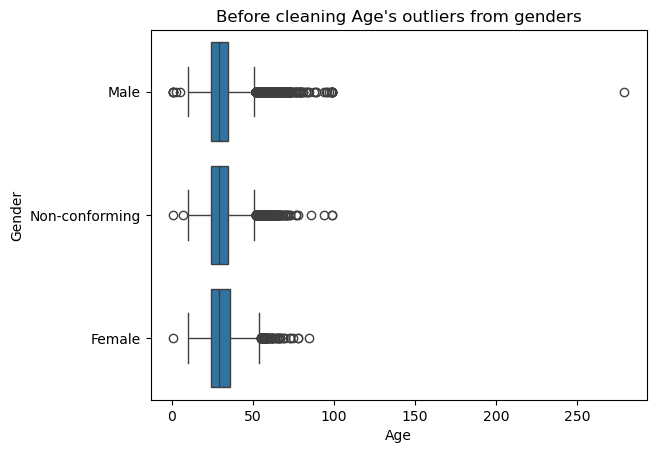

In [571]:
#Plottig boxplot to check outliers
sns.boxplot(x='Age', y= 'Gender', data=df2020)
plt.title("Before cleaning Age's outliers from genders")
plt.show()

In [572]:
#Cleaning Age's outliers from each gender)
df2020 = df2020[(df2020['Age'] >= 15) & (df2020['Age'] <= 60)]

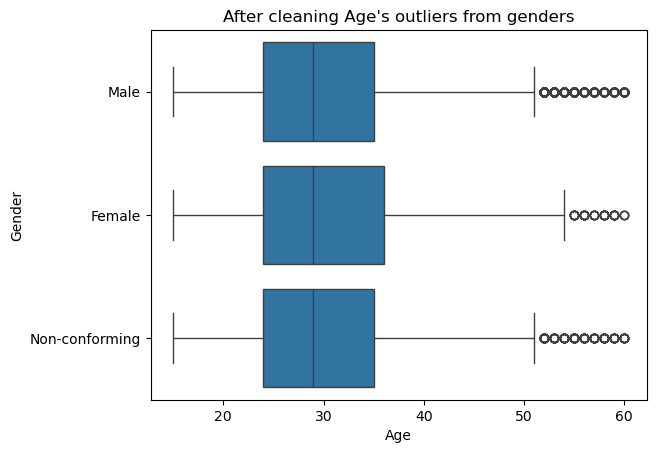

In [575]:
#Plottig boxplot to check outliers after cleaning some outliers
sns.boxplot(x='Age', y= 'Gender', data=df2020)
plt.title("After cleaning Age's outliers from genders")
plt.show()

In [576]:
#fill Age's null values with mean of each gender
means = df2020.groupby('Gender')['Age'].transform('mean')
df2020['Age'] = df2020['Age'].fillna(means)

#convert from float to int
df2020['Age'] = df2020['Age'].apply(str).str[:2]
df2020['Age'] = df2020['Age'].apply(int)

In [579]:
#df before 64461
print('df shape after clean Age: ', df2020.shape) #no. of Ages' outliners = 64461-44709=19752 (30.6%)

df shape after clean Age:  (44709, 18)


## EdLevel

In [582]:
df2020['EdLevel'].isnull().sum()

933

In [584]:
df2020['EdLevel'].value_counts()

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          20290
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       10000
Some college/university study without earning a degree                                 5699
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     3676
Associate degree (A.A., A.S., etc.)                                                    1455
Other doctoral degree (Ph.D., Ed.D., etc.)                                             1256
Primary/elementary school                                                               590
Professional degree (JD, MD, etc.)                                                      578
I never completed any formal education                                                  232
Name: count, dtype: int64

In [586]:
#Refactoring EdLevel
def refactor_ed(df):
    '''function to change Education level category to Bachelors, Masters, Professional, Associate, Doctorate, No Degree'''
    conditions_ed = [(df['EdLevel'] == 'Associate degree (A.A., A.S., etc.)'),
                    (df['EdLevel'] == 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)'),
                    (df['EdLevel'] == 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'),
                    (df['EdLevel'] == 'Professional degree (JD, MD, etc.)'),   
                    (df['EdLevel'] == 'Other doctoral degree (Ph.D., Ed.D., etc.)'),
                    (df['EdLevel'] == 'Some college/university study without earning a degree') 
                    | (df['EdLevel'] == 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)') 
                    | (df['EdLevel'] == 'Primary/elementary school')
                    | (df['EdLevel'] == 'I never completed any formal education')]
    
    choices_ed = ['Associate', 'Bachelors', 'Masters', 'Professional',  'Doctorate', 'No Degree']
    df['EdLevel'] = np.select(conditions_ed, choices_ed, default = np.NaN)
    return df

# applying function to subsets
df2020 = refactor_ed(df2020)
#Assigining the surveyors who havent mentioned their education level to Bachelor’s degree
df2020['EdLevel'].replace('nan', 'Bachelors', inplace=True)

In [588]:
df2020['EdLevel'].value_counts()

EdLevel
Bachelors       21223
No Degree       10197
Masters         10000
Associate        1455
Doctorate        1256
Professional      578
Name: count, dtype: int64

## JobSat (CurrentJobSatis)

In [591]:
df2020['CurrentJobSatis'].isnull().sum()

8690

In [593]:
df2020['CurrentJobSatis'].value_counts()

CurrentJobSatis
Very satisfied                        11751
Slightly satisfied                    11198
Slightly dissatisfied                  5790
Neither satisfied nor dissatisfied     4373
Very dissatisfied                      2907
Name: count, dtype: int64

In [595]:
df2020['CurrentJobSatis'].fillna(method='ffill', inplace=True)

In [597]:
df2020['CurrentJobSatis'].value_counts()

CurrentJobSatis
Very satisfied                        14628
Slightly satisfied                    13834
Slightly dissatisfied                  7192
Neither satisfied nor dissatisfied     5446
Very dissatisfied                      3609
Name: count, dtype: int64

## JobSeek (JobStatus)

In [600]:
df2020['JobStatus'].isnull().sum()

2153

In [602]:
df2020.groupby('JobStatus')['JobStatus'].count()

JobStatus
I am actively looking for a job                                  6980
I am not interested in new job opportunities                    10919
I’m not actively looking, but I am open to new opportunities    24657
Name: JobStatus, dtype: int64

In [604]:
df2020['JobStatus'].fillna(method='ffill', inplace=True)

In [606]:
#Refactoring JobStatus
#Changing the jobstatus to seeking and non seeking
def refactor_job(df):
    '''function to change JobStatus category to Seeking and Non Seeking'''
    
    conditions_job = [(df['JobStatus'] == 'I am actively looking for a job'),
                    (df['JobStatus'] == 'I am not interested in new job opportunities')
                    | (df['JobStatus'] == 'I’m not actively looking, but I am open to new opportunities')]
    
    choices_job = ['Seeking', 'Not seeking']
    df['JobSeek'] = np.select(conditions_job, choices_job, default=np.nan)                      
    return df

df2020 = refactor_job(df2020)

In [608]:
df2020.groupby('JobSeek')['JobSeek'].count()

JobSeek
Not seeking    37369
Seeking         7340
Name: JobSeek, dtype: int64

In [610]:
df2020['JobStatus'].isnull().sum()

0

## DevType

In [613]:
df2020['DevType'].isnull().sum()

5954

In [615]:
df2020['DevType'].value_counts().nlargest(10)

DevType
Developer, full-stack                                                                                           3399
Developer, back-end                                                                                             2374
Developer, back-end;Developer, front-end;Developer, full-stack                                                  1838
Developer, back-end;Developer, full-stack                                                                       1216
Developer, front-end                                                                                            1071
Developer, mobile                                                                                                953
Developer, back-end;Developer, desktop or enterprise applications;Developer, front-end;Developer, full-stack     668
Developer, front-end;Developer, full-stack                                                                       667
Developer, back-end;Developer, desktop or enterprise app

In [617]:
df2020['DevType'] = df2020['DevType'].bfill().ffill()

In [619]:
df2020['DevType'].value_counts().nlargest(10)

DevType
Developer, full-stack                                                                                           3940
Developer, back-end                                                                                             2721
Developer, back-end;Developer, front-end;Developer, full-stack                                                  2146
Developer, back-end;Developer, full-stack                                                                       1411
Developer, front-end                                                                                            1229
Developer, mobile                                                                                               1074
Developer, back-end;Developer, desktop or enterprise applications;Developer, front-end;Developer, full-stack     779
Developer, front-end;Developer, full-stack                                                                       758
Developer, back-end;Developer, desktop or enterprise app

In [621]:
df.shape

(78800, 19)

In [623]:

df2020['DevType'].isnull().sum()

0

In [625]:
df2020[df2020['DevType'].isnull()]

Empty DataFrame
Columns: [Age, Gender, SalaryUSD, Country, DevType, Hobbyist, EdLevel, Employment, Ethnicity, CurrentJobSatis, JobStatus, LanguageDesireNextYear, LanguageWorkedWith, Profession, UndergradMajor, YearsCodePro, PlatformWorkedWith, PlatformDesireNextYear, JobSeek]
Index: []

## Ethnicity

In [628]:

df2020['Ethnicity'].isnull().sum()

4051

In [630]:
#count number of each Ethnicity
df2020.groupby('Ethnicity')['Ethnicity'].count()
df2020['Ethnicity'].value_counts().nlargest(10)

Ethnicity
White or of European descent                           26552
South Asian                                             3707
Hispanic or Latino/a/x                                  2078
Middle Eastern                                          1417
Southeast Asian                                         1371
East Asian                                              1342
Black or of African descent                             1327
Hispanic or Latino/a/x;White or of European descent      720
Middle Eastern;White or of European descent              344
Multiracial                                              245
Name: count, dtype: int64

In [632]:

#combine Ethnicity by str.match(if each string starts with a match of a regular expression pattern)
df2020.loc[df2020['Ethnicity'].str.match('Biracial') == True, 'Ethnicity'] = 'Biracial'
df2020.loc[df2020['Ethnicity'].str.match('Black or of African descent') == True, 'Ethnicity'] = 'Black or of African descent'
df2020.loc[df2020['Ethnicity'].str.match('East Asian') == True, 'Ethnicity'] = 'East Asian'
df2020.loc[df2020['Ethnicity'].str.match('Hispanic or Latino') == True, 'Ethnicity'] = 'Hispanic or Latino'
df2020.loc[df2020['Ethnicity'].str.match('Indigenous') == True, 'Ethnicity'] = 'Indigenous'
df2020.loc[df2020['Ethnicity'].str.match('Middle Eastern') == True, 'Ethnicity'] = 'Middle Eastern'
df2020.loc[df2020['Ethnicity'].str.match('South Asian') == True, 'Ethnicity'] = 'South Asian'
df2020.loc[df2020['Ethnicity'].str.match('White or of European descent') == True, 'Ethnicity'] = 'White or of European descent'
df2020.loc[df2020['Ethnicity'].str.match('Multiracial') == True, 'Ethnicity'] = 'Multiracial'

In [633]:

df2020.groupby('Ethnicity')['Ethnicity'].count() #11 groups of Ethnicity after combining 
df2020['Ethnicity'].value_counts()

Ethnicity
White or of European descent    26848
South Asian                      3783
Hispanic or Latino               3072
Middle Eastern                   1840
East Asian                       1661
Black or of African descent      1633
Southeast Asian                  1371
Multiracial                       249
Biracial                          138
Indigenous                         63
Name: count, dtype: int64

In [636]:

df2020['Ethnicity']=df2020.groupby(['Country'])['Ethnicity'].bfill().ffill()

In [638]:
#count number of each Ethnicity
df2020.groupby('Ethnicity')['Ethnicity'].count()
df2020['Ethnicity'].value_counts()

Ethnicity
White or of European descent    28466
South Asian                      5101
Hispanic or Latino               3270
Middle Eastern                   2104
East Asian                       1907
Black or of African descent      1762
Southeast Asian                  1614
Multiracial                       263
Biracial                          151
Indigenous                         71
Name: count, dtype: int64

In [640]:
df2020['Ethnicity'].isnull().sum()

0

In [642]:

print(df2020.isnull().sum())

Age                           0
Gender                     6637
SalaryUSD                 14358
Country                       0
DevType                       0
Hobbyist                      0
EdLevel                       0
Employment                  118
Ethnicity                     0
CurrentJobSatis               0
JobStatus                     0
LanguageDesireNextYear     2394
LanguageWorkedWith          396
Profession                   77
UndergradMajor             5522
YearsCodePro               8212
PlatformWorkedWith         2585
PlatformDesireNextYear     4665
JobSeek                       0
dtype: int64


## LanguageDesireNextYear

In [645]:
df2020['LanguageDesireNextYear'].isnull().sum()

2394

In [647]:
df2020['LanguageDesireNextYear'].value_counts().nlargest(10)

LanguageDesireNextYear
Python                                   773
Rust                                     417
HTML/CSS;JavaScript;TypeScript           405
C#                                       342
C#;HTML/CSS;JavaScript;SQL;TypeScript    339
HTML/CSS;JavaScript                      307
Go                                       300
HTML/CSS;JavaScript;PHP;SQL              229
TypeScript                               227
Java                                     224
Name: count, dtype: int64

In [649]:
#df2020['LanguageDesireNextYear'].fillna(method='ffill', inplace=True)
df2020['LanguageDesireNextYear']=df2020['LanguageDesireNextYear'].bfill().ffill()

In [651]:
df2020['LanguageDesireNextYear'].value_counts().nlargest(10)

LanguageDesireNextYear
Python                                   802
Rust                                     432
HTML/CSS;JavaScript;TypeScript           425
C#                                       377
C#;HTML/CSS;JavaScript;SQL;TypeScript    372
HTML/CSS;JavaScript                      323
Go                                       310
HTML/CSS;JavaScript;PHP;SQL              245
Java                                     238
C#;HTML/CSS;JavaScript;SQL               236
Name: count, dtype: int64

In [653]:
df2020['LanguageDesireNextYear'].isnull().sum()

0

## LanguageWorkedWith

In [656]:
df2020['LanguageWorkedWith'].isnull().sum()

396

In [658]:
df2020['LanguageWorkedWith'].value_counts().nlargest(10)

LanguageWorkedWith
HTML/CSS;JavaScript;PHP;SQL              819
C#;HTML/CSS;JavaScript;SQL               669
HTML/CSS;JavaScript                      655
C#;HTML/CSS;JavaScript;SQL;TypeScript    624
HTML/CSS;JavaScript;TypeScript           568
Python                                   449
Java                                     392
HTML/CSS;JavaScript;PHP                  382
HTML/CSS;Java;JavaScript;SQL             301
C#                                       296
Name: count, dtype: int64

In [660]:
#df2020['LanguageWorkedWith'].fillna(method='ffill', inplace=True)
df2020['LanguageWorkedWith']=df2020['LanguageWorkedWith'].bfill().ffill()

In [662]:
df2020['LanguageWorkedWith'].value_counts().nlargest(10)

LanguageWorkedWith
HTML/CSS;JavaScript;PHP;SQL              822
C#;HTML/CSS;JavaScript;SQL               670
HTML/CSS;JavaScript                      658
C#;HTML/CSS;JavaScript;SQL;TypeScript    631
HTML/CSS;JavaScript;TypeScript           572
Python                                   450
Java                                     394
HTML/CSS;JavaScript;PHP                  385
HTML/CSS;Java;JavaScript;SQL             306
C#                                       298
Name: count, dtype: int64

In [664]:
df2020['LanguageWorkedWith'].isnull().sum()

0

## MainBranch (Profession)

In [667]:
df2020['Profession'].isnull().sum()

77

In [669]:
df2020.groupby('Profession')['Profession'].count()

Profession
I am a developer by profession                                                   34037
I am a student who is learning to code                                            4900
I am not primarily a developer, but I write code sometimes as part of my work     3718
I code primarily as a hobby                                                       1301
I used to be a developer by profession, but no longer am                           676
Name: Profession, dtype: int64

In [671]:
df2020.dropna(subset=['Profession'], inplace = True)

In [673]:
#Lets refactor column values of Profession column
#refactoring profession column

def refactor_prof(df):
    '''function to change Profession category to Developer, Student, Non-Developer, Novoice, Ex-Developer'''
    conditions_prof = [(df['Profession'] == 'I am a developer by profession'),
                       (df['Profession'] == 'I am a student who is learning to code'),
                       (df['Profession'] == 'I am not primarily a developer, but I write code sometimes as part of my work'),
                       (df['Profession'] == 'I code primarily as a hobby'),
                       (df['Profession'] == 'I used to be a developer by profession, but no longer am')]
    
    choices_prof = ['Developer', 'Student', 'Non developer', 'Novoice', 'Ex-Developer']
    df['Profession'] = np.select(conditions_prof, choices_prof, default=np.nan)          
    return df

df2020 = refactor_prof(df2020)

In [675]:
df2020['Profession'].value_counts()

Profession
Developer        34037
Student           4900
Non developer     3718
Novoice           1301
Ex-Developer       676
Name: count, dtype: int64

In [677]:
df2020['Profession'].isnull().sum()

0

## UndergradMajor

In [680]:

df2020['UndergradMajor'].isnull().sum()

5501

In [682]:
df2020.groupby('UndergradMajor')['UndergradMajor'].count()

UndergradMajor
A business discipline (such as accounting, finance, marketing, etc.)               1033
A health science (such as nursing, pharmacy, radiology, etc.)                       190
A humanities discipline (such as literature, history, philosophy, etc.)             815
A natural science (such as biology, chemistry, physics, etc.)                      1754
A social science (such as anthropology, psychology, political science, etc.)        733
Another engineering discipline (such as civil, electrical, mechanical, etc.)       3542
Computer science, computer engineering, or software engineering                   24429
Fine arts or performing arts (such as graphic design, music, studio art, etc.)      581
I never declared a major                                                            331
Information systems, information technology, or system administration              3074
Mathematics or statistics                                                          1419
Web development o

In [684]:
def refactor_major(df):
    conditions_major = [(df['UndergradMajor'] == 'Computer science, computer engineering, or software engineering'), 
                        (df['UndergradMajor'] == 'Another engineering discipline (such as civil, electrical, mechanical, etc.)'),
                        (df['UndergradMajor'] == 'Information systems, information technology, or system administration'), 
                        (df['UndergradMajor'] == 'Mathematics or statistics'),
                        (df['UndergradMajor'] == 'A natural science (such as biology, chemistry, physics, etc.)') 
                        |(df['UndergradMajor'] == 'A health science (such as nursing, pharmacy, radiology, etc.)'), 
                        (df['UndergradMajor'] == 'Web development or web design'), 
                        (df['UndergradMajor'] == 'A business discipline (such as accounting, finance, marketing, etc.)'), 
                        (df['UndergradMajor'] == 'A humanities discipline (such as literature, history, philosophy, etc.)')
                        | (df['UndergradMajor'] == 'A social science (such as anthropology, psychology, political science, etc.)')
                        | (df['UndergradMajor'] == 'Fine arts or performing arts (such as graphic design, music, studio art, etc.)'),
                        (df['UndergradMajor'] == 'I never declared a major') ]
    
    choices_major = ['Computer Science', 'Engineering', 'Info Systems', 'Math/Stat', 'Other Science',
                     'Web Design/Dev', 'Business', 'Arts and Science', 'No major']
    df['UndergradMajor'] = np.select(conditions_major, choices_major, default = np.NaN)
    return df

df2020 = refactor_major(df2020)
df2020['UndergradMajor'].replace('nan', 'No major', inplace=True)

In [686]:
df2020.groupby('UndergradMajor')['UndergradMajor'].count()

UndergradMajor
Arts and Science     2129
Business             1033
Computer Science    24429
Engineering          3542
Info Systems         3074
Math/Stat            1419
No major             5832
Other Science        1944
Web Design/Dev       1230
Name: UndergradMajor, dtype: int64

In [688]:
df2020['UndergradMajor'].isnull().sum()

0

## Employment

In [691]:
df2020['Employment'].isnull().sum()

111

In [693]:

df2020.groupby('Employment')['Employment'].count()

Employment
Employed full-time                                      32474
Employed part-time                                       1489
Independent contractor, freelancer, or self-employed     3859
Not employed, and not looking for work                    181
Not employed, but looking for work                       1500
Retired                                                    32
Student                                                  4986
Name: Employment, dtype: int64

In [695]:
df2020.dropna(subset=['Employment'], inplace = True)

In [697]:
#Refactoring Employment
df2020['Employment'].replace('Employed full-time', 'Full-time', inplace =True)
df2020['Employment'].replace('Employed part-time', 'Part-time',inplace =True)
df2020['Employment'].replace('Independent contractor, freelancer, or self-employed', 'Self-employed', inplace =True)
df2020['Employment'].replace('Not employed, but looking for work', 'Not employed', inplace =True)

In [699]:
df2020.groupby('Employment')['Employment'].count()

Employment
Full-time                                 32474
Not employed                               1500
Not employed, and not looking for work      181
Part-time                                  1489
Retired                                      32
Self-employed                              3859
Student                                    4986
Name: Employment, dtype: int64

In [701]:
df2020['Employment'].isnull().sum()

0

## Country

In [704]:
df2020['Country'].isnull().sum()

0

In [706]:

df2020.groupby('Country')['Country'].count()

Country
Afghanistan                              22
Albania                                  29
Algeria                                  47
Andorra                                   3
Angola                                    2
                                       ... 
Venezuela, Bolivarian Republic of...     53
Viet Nam                                159
Yemen                                     2
Zambia                                   10
Zimbabwe                                 19
Name: Country, Length: 170, dtype: int64

## YearsCodePro

In [709]:
df2020['YearsCodePro'].isnull().sum()

8123

In [711]:
df2020.dtypes

Age                         int64
Gender                     object
SalaryUSD                 float64
Country                    object
DevType                    object
Hobbyist                   object
EdLevel                    object
Employment                 object
Ethnicity                  object
CurrentJobSatis            object
JobStatus                  object
LanguageDesireNextYear     object
LanguageWorkedWith         object
Profession                 object
UndergradMajor             object
YearsCodePro               object
PlatformWorkedWith         object
PlatformDesireNextYear     object
JobSeek                    object
dtype: object

In [713]:
#convert YearsCodePro data type from obj to int
df2020["YearsCodePro"]=pd.to_numeric(df2020["YearsCodePro"],errors='coerce')

#fill YearsCodePro's null values with mean
means = df2020['YearsCodePro'].mean() #means 8.673142457693764
df2020['YearsCodePro'] = df2020['YearsCodePro'].fillna(means)
df2020['YearsCodePro'] = df2020['YearsCodePro'].round(2)

In [715]:
df2020['YearsCodePro'].isnull().sum()

0

## Hobbyist

In [718]:
df2020['Hobbyist'].isnull().sum()

0

In [720]:
df2020.groupby('Hobbyist')['Hobbyist'].count()

Hobbyist
No      9583
Yes    34938
Name: Hobbyist, dtype: int64

In [722]:
print(df2020.isnull().sum())

Age                           0
Gender                     6606
SalaryUSD                 14202
Country                       0
DevType                       0
Hobbyist                      0
EdLevel                       0
Employment                    0
Ethnicity                     0
CurrentJobSatis               0
JobStatus                     0
LanguageDesireNextYear        0
LanguageWorkedWith            0
Profession                    0
UndergradMajor                0
YearsCodePro                  0
PlatformWorkedWith         2555
PlatformDesireNextYear     4624
JobSeek                       0
dtype: int64


## ConvertedComp (SalaryUSD)

In [725]:
df2020['SalaryUSD'].isnull().sum()

14202

In [727]:
df2020['SalaryUSD'].value_counts().nlargest()

SalaryUSD
120000.0     284
100000.0     254
64859.0      224
150000.0     221
2000000.0    216
Name: count, dtype: int64

mean_salary = df2020.groupby(['Age','EdLevel','Country'])['SalaryUSD'].mean()
mean_salary.nlargest(10)

In [730]:
#df2020['SalaryUSD'] = df2020.groupby(['Age', 'EdLevel', 'Country'])['SalaryUSD'].transform(lambda grp: grp.fillna(np.mean(grp)))

means = df2020.groupby(['Age', 'EdLevel', 'Country'])['SalaryUSD'].transform('mean')
df2020['SalaryUSD'] = df2020['SalaryUSD'].fillna(means)

In [732]:

mean_salary = df2020.groupby(['Age','EdLevel','Country'])['SalaryUSD'].mean()
mean_salary.nlargest(10)

Age  EdLevel       Country      
40   Professional  United States    2000000.0
37   Masters       Nomadic          1320000.0
41   Masters       Israel           1200000.0
47   Professional  United States    1047500.0
33   Doctorate     Italy            1018376.5
15   Bachelors     Germany          1000000.0
20   Associate     Australia        1000000.0
25   Bachelors     Paraguay         1000000.0
28   Doctorate     Singapore        1000000.0
32   No Degree     Ireland          1000000.0
Name: SalaryUSD, dtype: float64

In [734]:

df2020['SalaryUSD'].value_counts().nlargest()

SalaryUSD
120000.0     286
100000.0     255
64859.0      239
150000.0     227
1000000.0    219
Name: count, dtype: int64

In [736]:

df2020['SalaryUSD'].isnull().sum() #2952 out of 64461 -> 4.6%

2952

In [738]:
df2020.dropna(subset=['SalaryUSD'], inplace = True)

In [740]:
df2020['SalaryUSD'].isnull().sum()

0

## Cleaned Dataset:2020_Survey

In [743]:
print(df2020.isnull().sum())

Age                          0
Gender                    6157
SalaryUSD                    0
Country                      0
DevType                      0
Hobbyist                     0
EdLevel                      0
Employment                   0
Ethnicity                    0
CurrentJobSatis              0
JobStatus                    0
LanguageDesireNextYear       0
LanguageWorkedWith           0
Profession                   0
UndergradMajor               0
YearsCodePro                 0
PlatformWorkedWith        2293
PlatformDesireNextYear    4249
JobSeek                      0
dtype: int64


In [745]:
#resetting the index values
df2020 = df2020.reset_index(drop=True)

In [747]:
df2020.head(5)

Age  Gender      SalaryUSD         Country  \
0   31    Male  214247.736842   United States   
1   36  Female  116000.000000   United States   
2   22     NaN   32315.000000  United Kingdom   
3   23     NaN   40070.000000  United Kingdom   
4   49     NaN   14268.000000           Spain   

                                             DevType Hobbyist    EdLevel  \
0  Developer, back-end;Developer, desktop or ente...      Yes  Bachelors   
1  Developer, back-end;Developer, desktop or ente...      Yes  Bachelors   
2  Database administrator;Developer, full-stack;D...      Yes    Masters   
3  Developer, back-end;Developer, desktop or ente...      Yes  Bachelors   
4                      Designer;Developer, front-end       No  No Degree   

  Employment                     Ethnicity        CurrentJobSatis  \
0  Full-time  White or of European descent  Slightly dissatisfied   
1  Full-time  White or of European descent  Slightly dissatisfied   
2  Full-time  White or of European descent         Very satisfied   
3  Full-time  White or of European descent  Slightly dissatisfied   
4  Full-time  White or of European descent      Very dissatisfied   

                                           JobStatus  \
0  I’m not actively looking, but I am open to new...   
1  I’m not actively looking, but I am open to new...   
2  I’m not actively looking, but I am open to new...   
3                    I am actively looking for a job   
4  I’m not actively looking, but I am open to new...   

                  LanguageDesireNextYear                   LanguageWorkedWith  \
0                        Java;Ruby;Scala                    HTML/CSS;Ruby;SQL   
1                             JavaScript                           Python;SQL   
2  HTML/CSS;Java;JavaScript;Python;R;SQL  HTML/CSS;Java;JavaScript;Python;SQL   
3         Go;JavaScript;Swift;TypeScript                  C#;JavaScript;Swift   
4                    HTML/CSS;JavaScript                  HTML/CSS;JavaScript   

     Profession    UndergradMajor  YearsCodePro  \
0  Ex-Developer  Computer Science           8.0   
1     Developer  Computer Science          13.0   
2     Developer         Math/Stat           4.0   
3     Developer  Computer Science           2.0   
4     Developer         Math/Stat           7.0   

                   PlatformWorkedWith  \
0      AWS;Docker;Linux;MacOS;Windows   
1                              Docker   
2  Android;Linux;Raspberry Pi;Windows   
3                      AWS;Heroku;iOS   
4                   Windows;WordPress   

                              PlatformDesireNextYear      JobSeek  
0  Docker;Google Cloud Platform;Heroku;Linux;Windows  Not seeking  
1                    iOS;Slack Apps and Integrations  Not seeking  
2                 Android;Linux;Raspberry Pi;Windows  Not seeking  
3                               AWS;Docker;iOS;MacOS      Seeking  
4                                  Windows;WordPress  Not seeking

In [749]:
df2020.info()#after cleaning the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41569 entries, 0 to 41568
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     41569 non-null  int64  
 1   Gender                  35412 non-null  object 
 2   SalaryUSD               41569 non-null  float64
 3   Country                 41569 non-null  object 
 4   DevType                 41569 non-null  object 
 5   Hobbyist                41569 non-null  object 
 6   EdLevel                 41569 non-null  object 
 7   Employment              41569 non-null  object 
 8   Ethnicity               41569 non-null  object 
 9   CurrentJobSatis         41569 non-null  object 
 10  JobStatus               41569 non-null  object 
 11  LanguageDesireNextYear  41569 non-null  object 
 12  LanguageWorkedWith      41569 non-null  object 
 13  Profession              41569 non-null  object 
 14  UndergradMajor          41569 non-null

### After Cleaning Dataset 2020

In [752]:
#Find % of missing data
missing_count = df2020.isnull().sum() #number of missing
total_cells = np.product(df2020.shape) # number of cells (cols x rows)
total_missing = missing_count.sum()
missing_percent = (total_missing*100)/total_cells

print('Total : ', total_cells)
print('Total missing : ', total_missing)
print('Missing Percentage: ', missing_percent, '%')

Total :  789811
Total missing :  12699
Missing Percentage:  1.607853018000509 %


# Visualization
After cleaning the datasets, we started visualizations to analyze the datasets.

## To find whether there is any difference between men and women's income from latest stack overflow survey (2020)

In [756]:
# pip install --upgrade seaborn

In [758]:
import seaborn as sns
sns.set_style('darkgrid')

In [760]:
plt.rcParams["figure.figsize"] = (20,10)

In [762]:
#sns.boxplot('SalaryUSD', data=df2020, width=0.3) 
#Cleaning SalaryUSD's outliers
df2020 = df2020[(df2020['SalaryUSD'] < 200000)]

Text(0.5, 1.0, 'Income vs Gender')

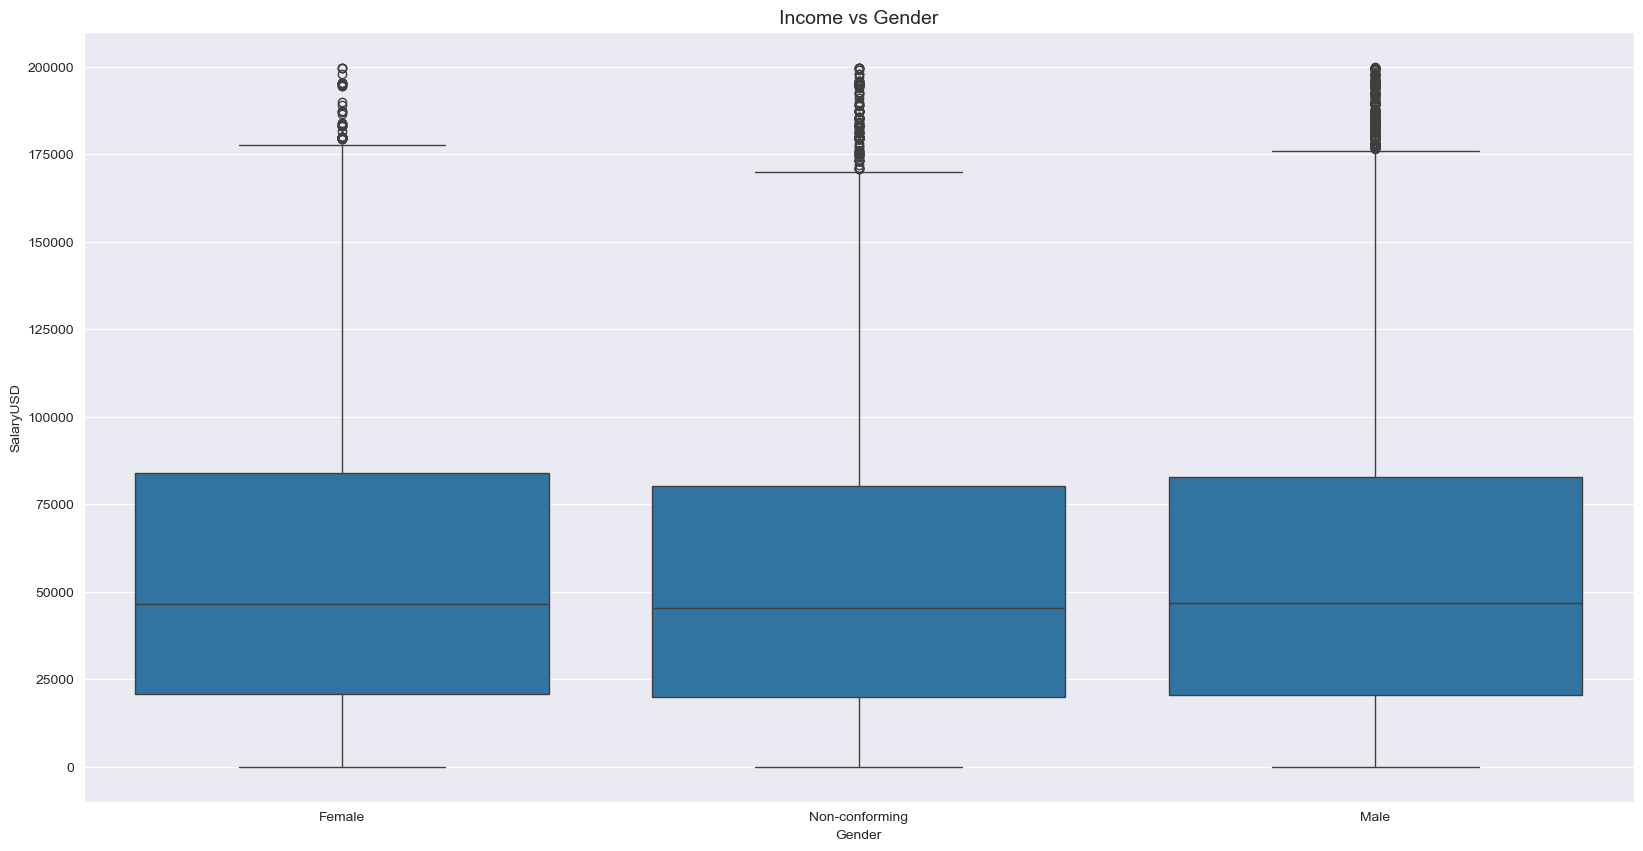

In [764]:
sns.boxplot(x ='Gender', y='SalaryUSD', data=df2020)
plt.title('Income vs Gender', fontsize = 14)

### **Analysis**<br>
There is a little bit of difference between Gender and income they received respectively. Men tend to receive more salary than women from the above analysis.

## Impact on participation rate due to different ethnicity based on country.

In [768]:
participation_rate = df2020['Ethnicity'].value_counts().keys().tolist()
print(participation_rate)
count = df2020['Ethnicity'].value_counts().tolist()
print(count)

['White or of European descent', 'South Asian', 'Hispanic or Latino', 'Middle Eastern', 'East Asian', 'Southeast Asian', 'Black or of African descent', 'Multiracial', 'Biracial', 'Indigenous']
[24573, 4585, 2877, 1757, 1539, 1348, 1336, 226, 133, 62]


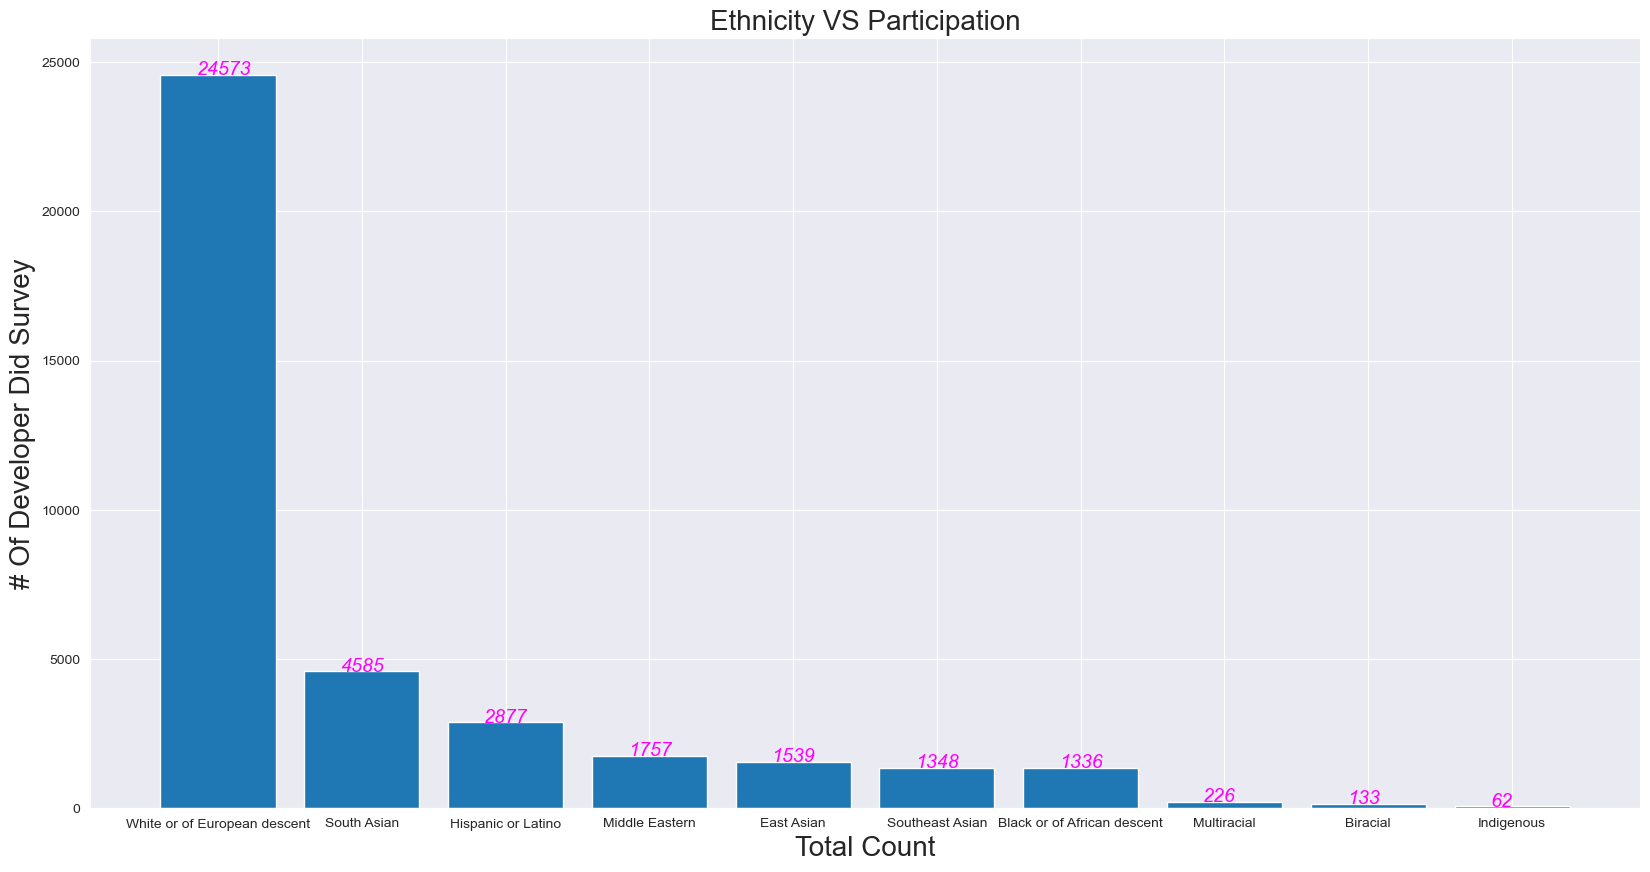

In [770]:
fig, ax = plt.subplots()    
 
ax.bar(participation_rate,count)
plt.title('Ethnicity VS Participation',size=20)
plt.xlabel('Total Count',size = 20)
plt.ylabel('# Of Developer Did Survey',size = 20) 
for i, v in enumerate(count):
    ax.text(i-.15, 
              v+3,
              count[i],
              style = 'italic',
              fontsize=14,
              color = 'magenta')
ax.grid(True)

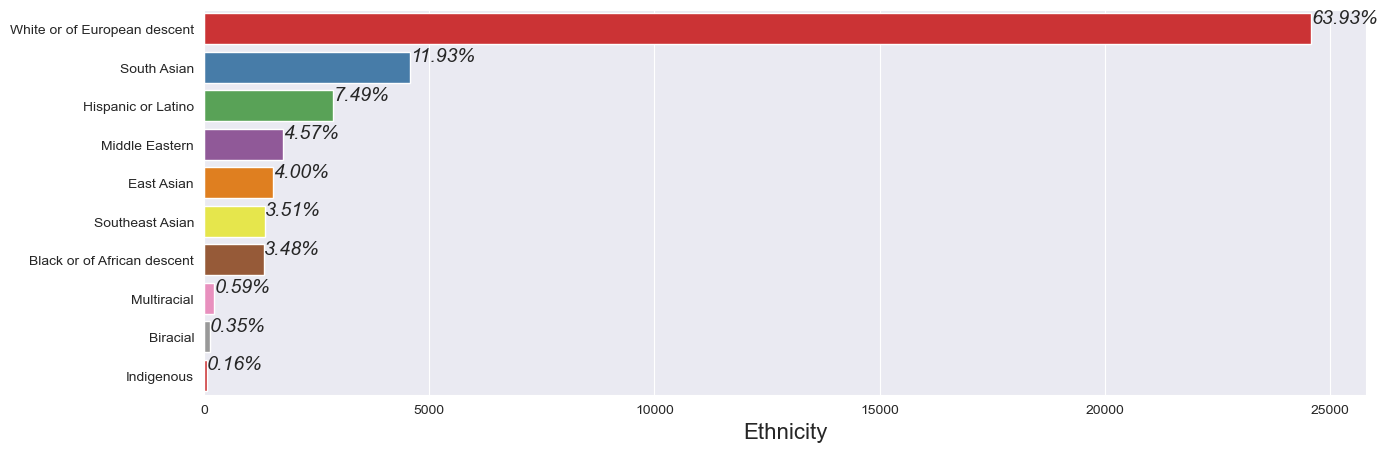

In [771]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x = count, y = participation_rate, palette = 'Set1')
plt.xlabel('Ethnicity', size = 16)
for i, v in enumerate(count):
    ax.text(  v+3,
              i-.15,
              f'{count[i]*100/sum(count):.2f}%',
              style = 'italic',
              fontsize=14,
              )

**From the Survey Analysis, more particpation has been happened from White or of European Ethnicity which is 24573 participation which is very high comparing to others.<br>
The least has been recorded as only 0.16% from Indigenous.<br>
The second top survey contributors are from South Asians which is 11.93% of the respondents.**

# Geographical plot to show number of respondents in each country in 2019

In [776]:
#geoplot_2019=cleaned_df_2019.groupby('Country').agg('count')
geoplot_2019=cleaned_df_2019.groupby('Country').size()
geoplot_2019=geoplot_2019.to_frame('Respondents')

In [778]:
def get_country_code(name):
    try:
        return pycountry.countries.lookup(name).alpha_3
    except:
        return None

In [780]:
geoplot_2019['Country'] = geoplot_2019.index
geoplot_2019['Country_code'] = geoplot_2019['Country'].apply(get_country_code)

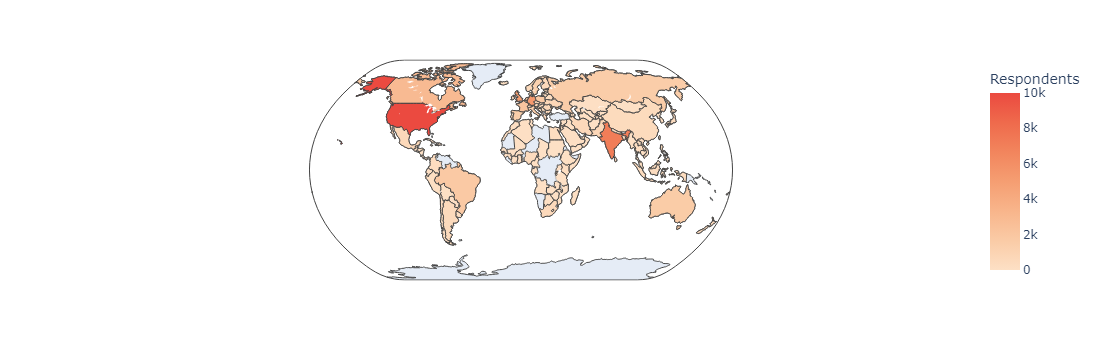

In [782]:
fig = px.choropleth(geoplot_2019,                        
                     locations="Country_code",           
                     color="Respondents",               
                     hover_name="Country",              
                     projection="natural earth",        
                     color_continuous_scale = 'Peach',  
                     range_color=[0,10000]     
                     )        
fig.show()

# Analysing salary distribution among top ten countries

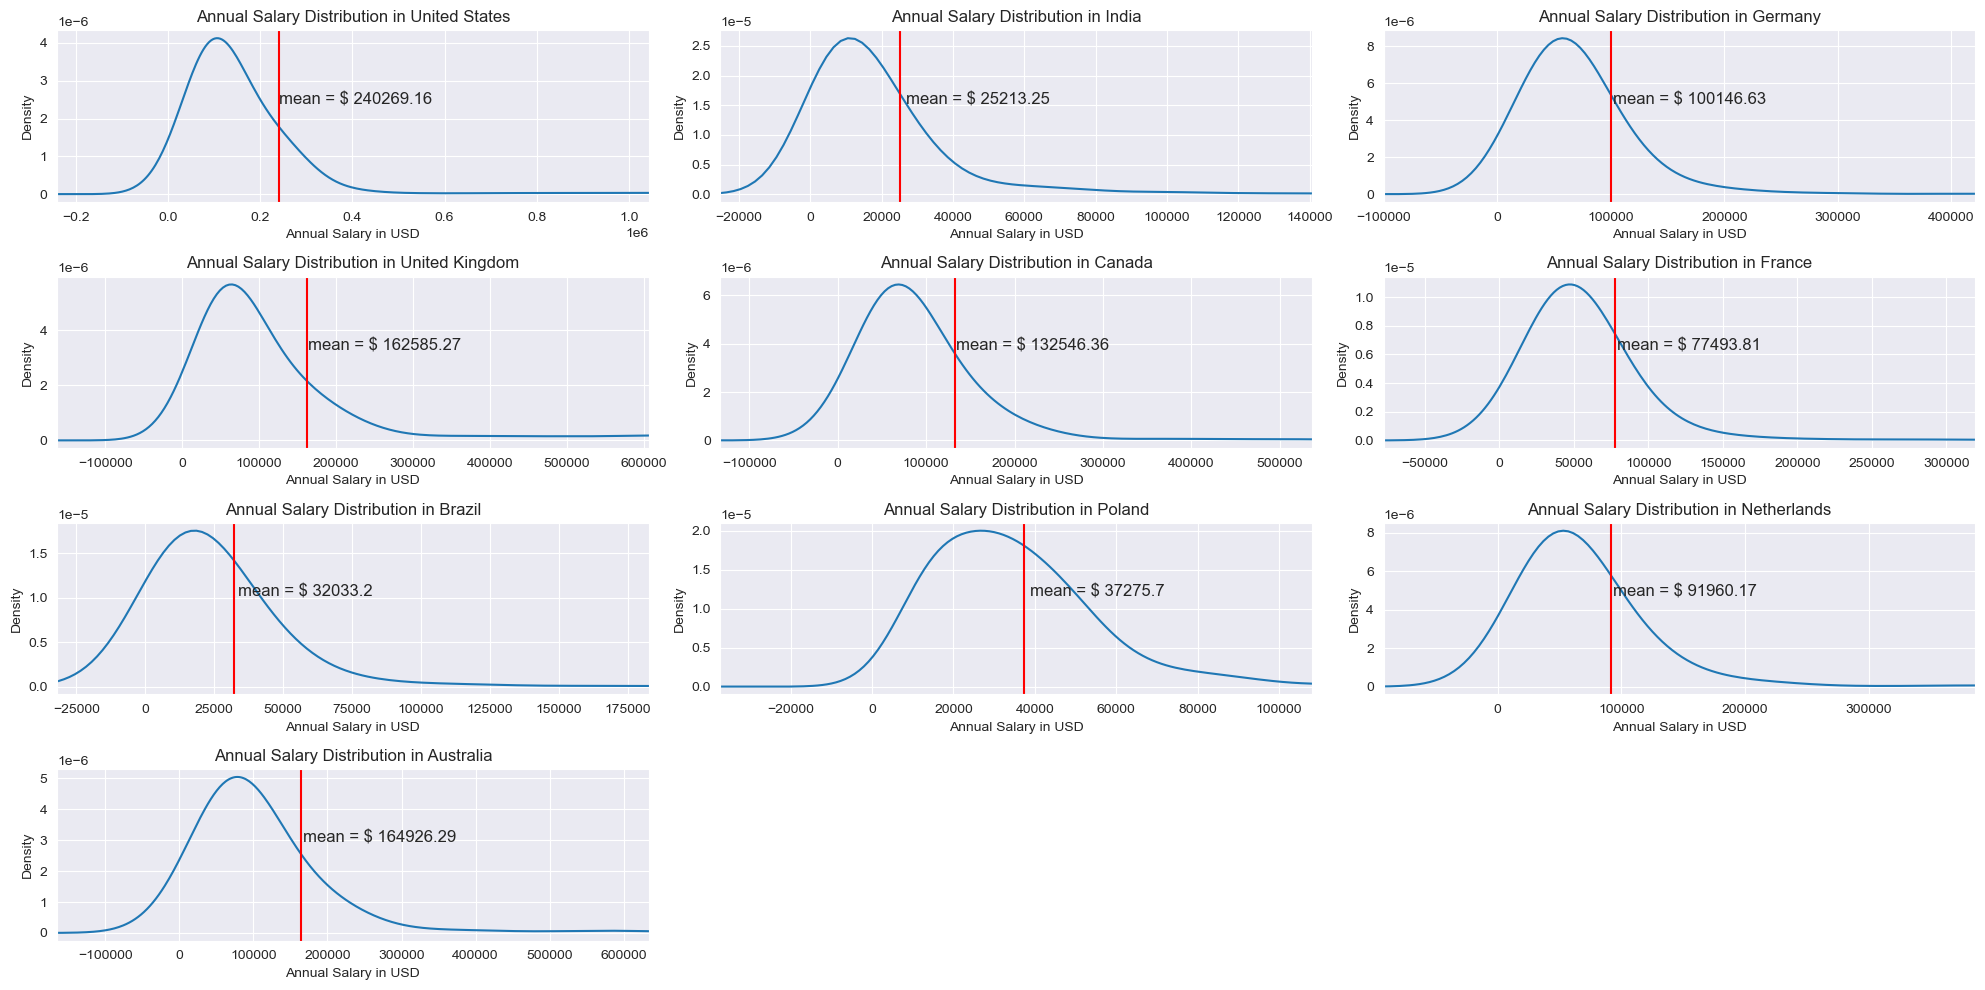

In [784]:
fig = plt.figure(figsize = (20, 10))

countries = cleaned_df_2019['Country'].value_counts().sort_values(ascending = False)[:10].index.tolist()

for i, country in enumerate(countries):
    plt.subplot(4, 3, i + 1)
    temp_salaries = cleaned_df_2019.loc[cleaned_df_2019['Country'] == country, 'SalaryUSD']

    ax = temp_salaries.plot(kind = 'kde')
    ax.axvline(temp_salaries.mean(), linestyle = '-', color = 'red')
    ax.text((temp_salaries.mean() + 1500), (float(ax.get_ylim()[1]) * 0.55), 'mean = $ ' + str(round(temp_salaries.mean(),2)), fontsize = 12)
    ax.set_xlabel('Annual Salary in USD')
    ax.set_xlim(-temp_salaries.mean(), temp_salaries.mean() + 2 * temp_salaries.std())
    ax.set_title('Annual Salary Distribution in {}'.format(country))

plt.tight_layout()
plt.show()

### Analysis

Overall, the country which has the highest mean annual salary is the United States of America(240,000) Dollars. The second highest country which provides the highest mean salary is Australia(164,926) Dollars. Though India has a higher number of respondents, it has the lowest mean salary of $25,213.We can understand that the mean salary of a developed country is much higher than that of a developing country.

# Analysing impact of education level on salary

In [789]:
salary_edu = cleaned_df_2019.groupby(['EdLevel'])
associate_group = salary_edu.get_group('Associate')
associate_mean = associate_group['SalaryUSD'].mean()
filt = (salary_edu.get_group('Associate')['SalaryUSD'] > associate_mean).to_frame()
filt = filt[filt['SalaryUSD'] == False]
cleaned_df_2019.drop(index=filt.index, inplace=True)

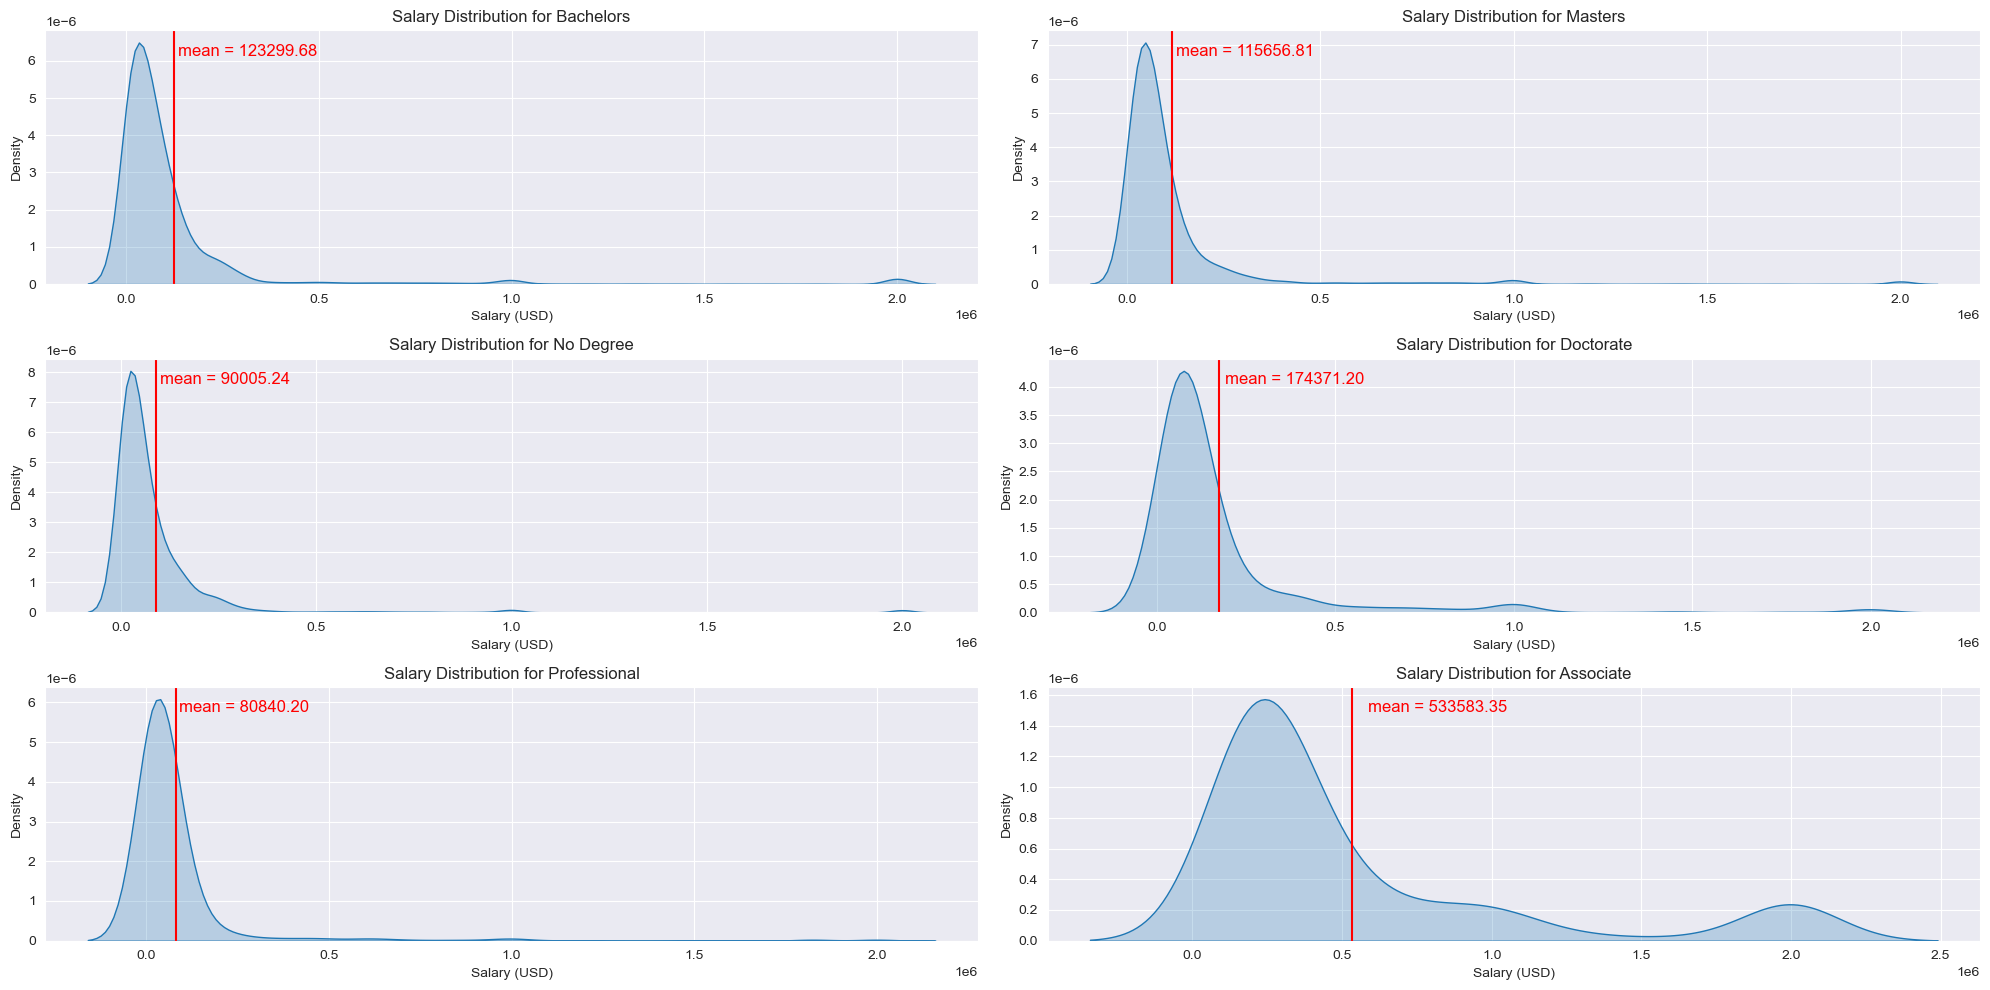

In [790]:
# fig = plt.figure(figsize = (20, 10))

# education_2019 = cleaned_df_2019['EdLevel'].value_counts().sort_values(ascending = False).index.tolist()

# for i, edu in enumerate(education_2019):
#     plt.subplot(3, 2, i + 1)
#     temp_salaries = cleaned_df_2019.loc[cleaned_df_2019['EdLevel'] == edu, 'SalaryUSD']


fig = plt.figure(figsize=(20, 10))

education_2019 = cleaned_df_2019['EdLevel'].value_counts().sort_values(ascending=False).index.tolist()

num_plots = len(education_2019)
num_cols = 2  # Number of columns in the subplot grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

for i, edu in enumerate(education_2019):
    ax = fig.add_subplot(num_rows, num_cols, i + 1)
    temp_salaries = cleaned_df_2019.loc[cleaned_df_2019['EdLevel'] == edu, 'SalaryUSD']
    
    # Plot KDE for salary distribution
    sns.kdeplot(temp_salaries, shade=True, ax=ax)
    mean_value = temp_salaries.mean()
    ax.axvline(mean_value, linestyle='-', color='red')
    ax.text(mean_value + 0.1 * mean_value, 
            ax.get_ylim()[1] * 0.9, 
            f'mean = {mean_value:.2f}', 
            fontsize=12, 
            color='red')
    ax.set_title(f'Salary Distribution for {edu}')
    ax.set_xlabel('Salary (USD)')
    ax.set_ylabel('Density')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()




### Analysis

As we can see, the respondents who have done Doctorate have the highest mean salary among all other education levels. Secondly, the respondents who have done Bachelors degree have more salary than that of Masters degree holders. This may be due to years of professional coding experience and due to the higher number of respondents in that category than that of Masters degree(No of respondents in Bachelor degree is 35659 and number of respondents in masters degree is 16940)

The most interesting is that the respondents who do not have any degree have a mean salary of $90k. This shows the improvement in online learning and advancement of technology that is shifting the company from relying on University degrees.

# Distribution of respondents based on age

In [794]:
col =['Age', 'Country']
df_2020= cleaned_df_2019[col]

In [799]:

df_2020['Age_range'] = 0
df_2020['Age_range']= np.where((df_2020['Age']>=15) & (df_2020['Age']<=19), '15 - 19 years', df_2020.Age_range)
df_2020['Age_range']= np.where((df_2020['Age']>=20) & (df_2020['Age']<=24), '20 - 24 years', df_2020.Age_range)
df_2020['Age_range']= np.where((df_2020['Age']>=25) & (df_2020['Age']<=29), '25 - 29 years', df_2020.Age_range)
df_2020['Age_range']= np.where((df_2020['Age']>=30) & (df_2020['Age']<=34), '30 - 34 years', df_2020.Age_range)
df_2020['Age_range']= np.where((df_2020['Age']>=35) & (df_2020['Age']<=39), '35 - 39 years', df_2020.Age_range)
df_2020['Age_range']= np.where((df_2020['Age']>=40) & (df_2020['Age']<=45), '40 - 45 years', df_2020.Age_range)
df_2020['Age_range']= np.where((df_2020['Age']>=46), '46 and above years', df_2020.Age_range)

In [801]:
df_2020_age = df_2020.groupby(['Age_range']).size().reset_index(name='Count')
df_2020_age.sort_values(by=['Count'], ascending=False, inplace=True)

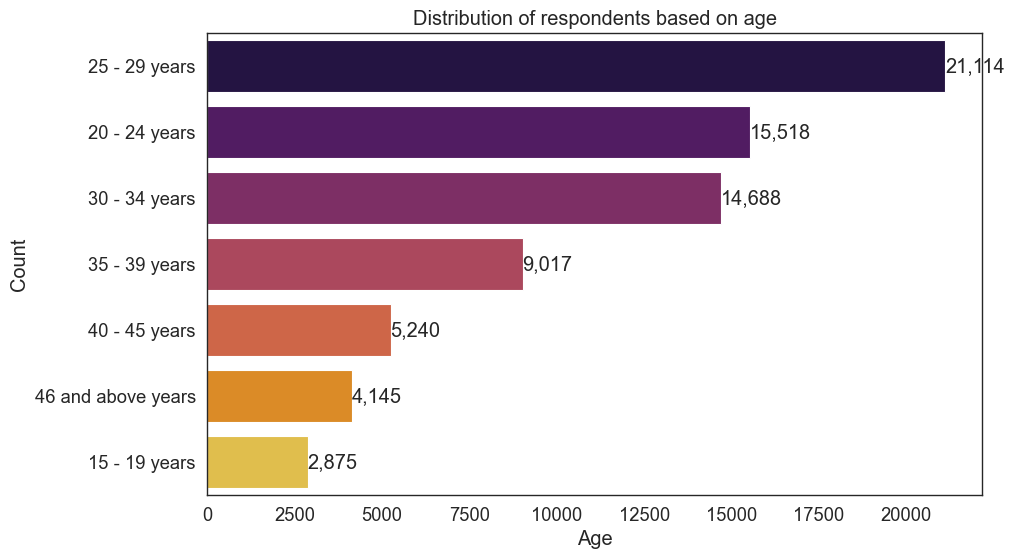

In [803]:
plt.figure(figsize = (10, 6))
sns.set_style('white')
sns.set_context('paper', font_scale=1.5)
sns.barplot(x="Count",  y="Age_range", palette='inferno', data=df_2020_age).set(xlabel="Age", ylabel = "Count")
plt.title('Distribution of respondents based on age')

for y, x in enumerate(df_2020_age['Count']):
    label = "{:,}".format(int(x))
    plt.annotate(label, xy=(x, y), va='center')

### Impact on the increase in popularity of a language in the current-year due to developer’s interest in the previous year.(Based on 2019 and 2020 dataset)

In [806]:
#seperate language for getting individual one
cols = ['LanguageWorkedWith']
df_19 = survey_df_2019[cols]
df_20 = df2020[cols]

In [808]:
#splitting 'LanguageWorkedWith' and sort_values(by=['Count'], ascending=False, inplace=True)
language_2019= df_19['LanguageWorkedWith'].str.split(';', expand=True).stack().value_counts().to_frame('2019')
language_2019['Language'] = language_2019.index
language_2019.reset_index(drop=True, inplace=True)
language_2019 = language_2019[['Language', '2019']]

In [810]:
language_2020= df_20['LanguageWorkedWith'].str.split(';', expand=True).stack().value_counts().to_frame('2020')
language_2020['Language'] = language_2020.index
language_2020.reset_index(drop=True, inplace=True)
language_2020 = language_2020[['Language', '2020']]

In [812]:
language_all= pd.merge(language_2019, language_2020,on = ['Language'], how = 'outer')
language_all.fillna(0, inplace=True)
language_all['2019'] = language_all['2019']. astype(int)
language_all['2020'] = language_all['2020']. astype(int)
language_all.set_index('Language', inplace=True)
#language_all

In [814]:
language19_20=(language_all/language_all.sum())
language19_20.head(5)

2019      2020
Language                                 
Assembly               0.011877  0.010812
Bash/Shell/PowerShell  0.074697  0.069555
C                      0.038334  0.039313
C#                     0.062234  0.063638
C++                    0.044193  0.043372

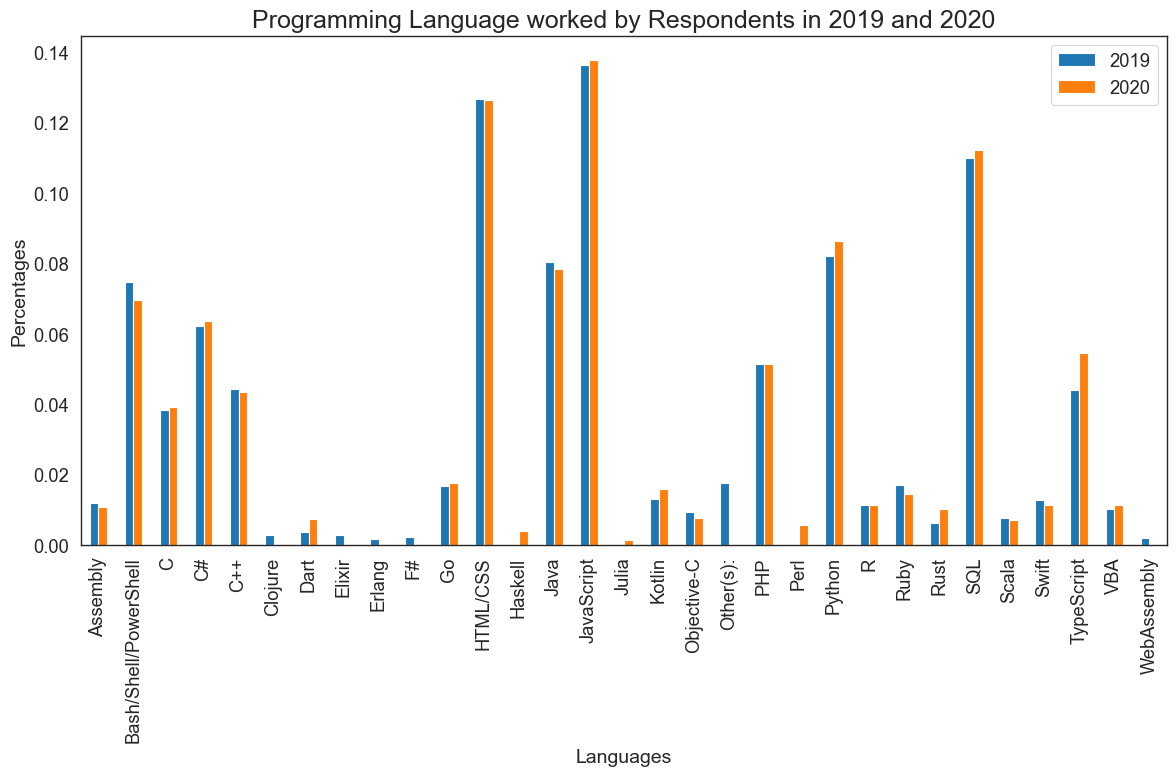

In [816]:
language19_20.plot(kind='bar', figsize=(12,8))
plt.title('Programming Language worked by Respondents in 2019 and 2020', fontsize = 18)
plt.xlabel('Languages', fontsize = 14)
plt.ylabel('Percentages', fontsize = 14)
plt.tight_layout()

### Analysis


The most language that worked in 2019 and 2020 is JavaScript.In 2020, people worked slightly in javascript compare to 2019. The 2nd highest working language is HTML/CSS. For HTML/CSS the percentage is slightly low in 2020. There are some language people worked in only one year. Elixir, Clojure, F#, Web assembly are those languages that people used in 2019. Respondent started to use Perl, Haskell, Julia in 2020 on a small scale.

## Programming language desired to work

In [821]:

#language desire net year
cols_1 = ['LanguageDesireNextYear']
df_19 = survey_df_2019[cols_1]
df_20 = df2020[cols_1]

In [823]:
languagedesire_2019= df_19['LanguageDesireNextYear'].str.split(';', expand=True).stack().value_counts().to_frame('2019')
languagedesire_2019['Language'] = languagedesire_2019.index
languagedesire_2019.reset_index(drop=True, inplace=True)
languagedesire_2019 = languagedesire_2019[['Language', '2019']]

In [825]:

languagedesire_2020= df_20['LanguageDesireNextYear'].str.split(';', expand=True).stack().value_counts().to_frame('2020')
languagedesire_2020['Language'] = languagedesire_2020.index
languagedesire_2020.reset_index(drop=True, inplace=True)
languagedesire_2020= languagedesire_2020[['Language','2020']]

In [827]:

languagedesire_all = pd.merge(languagedesire_2019, languagedesire_2020,on = ['Language'], how = 'outer')
languagedesire_all.fillna(0, inplace=True)
languagedesire_all['2019'] = languagedesire_all['2019']. astype(int)
languagedesire_all['2020'] = languagedesire_all['2020']. astype(int)
languagedesire_all.set_index('Language', inplace=True)

In [829]:
languagedesire19_20=(languagedesire_all/languagedesire_all.sum())
languagedesire19_20.head(5)

2019      2020
Language                                 
Assembly               0.010162  0.008858
Bash/Shell/PowerShell  0.054583  0.051636
C                      0.026305  0.023347
C#                     0.056948  0.058621
C++                    0.040193  0.037718

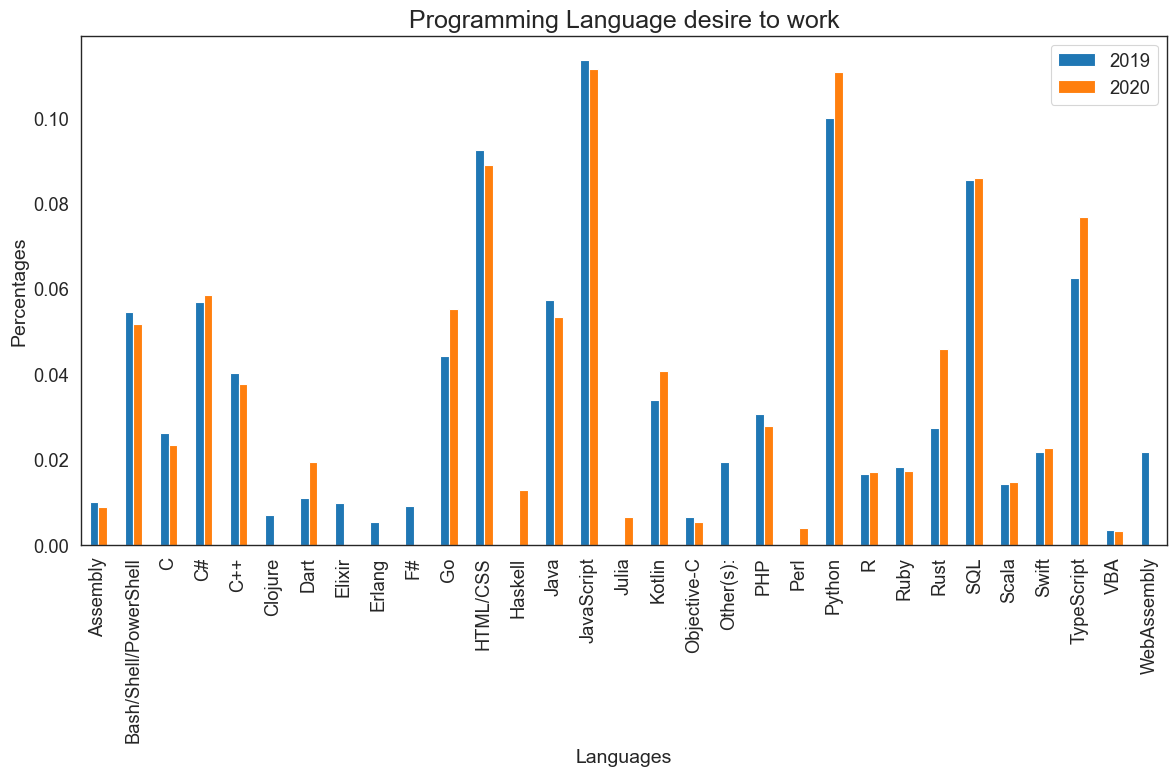

In [831]:
languagedesire19_20.plot(kind='bar', figsize=(12,8))
plt.title('Programming Language desire to work', fontsize = 18)
plt.xlabel('Languages', fontsize = 14)
plt.ylabel('Percentages', fontsize = 14)
plt.tight_layout()

### Analysis

In 2019, respondents said that they wanted to work in javascript is around more than 10 % and the fewer respond have a desire to work on VBA next year. People started to work in Haskell, Julia, and pearl in 2019 though the amount was less around 5% of people have the desire to work in those languages in 2021. Here, phyton is the 2nd one in which people have the desire to work in both 2019 and 2020.

## Distribution of surveyors based on their developer role.

In [836]:
col = ['DevType']
dev_18=df[col]
dev_19 = survey_df_2019[col]
dev_20= df2020[col]

In [838]:

dev_2018= dev_18['DevType'].str.split(';', expand=True).stack().value_counts().to_frame('2018')
dev_2018['Developer'] = dev_2018.index
dev_2018.reset_index(drop=True, inplace=True)
dev_2018 = dev_2018[['Developer', '2018']]

In [840]:
dev_2019= dev_19['DevType'].str.split(';', expand=True).stack().value_counts().to_frame('2019')
dev_2019['Developer'] = dev_2019.index
dev_2019.reset_index(drop=True, inplace=True)
dev_2019 = dev_2019[['Developer', '2019']]

In [842]:
dev_2020= dev_20['DevType'].str.split(';', expand=True).stack().value_counts().to_frame('2020')
dev_2020['Developer'] = dev_2020.index
dev_2020.reset_index(drop=True, inplace=True)
dev_2020 = dev_2020[['Developer', '2020']]

In [844]:
df18_19 = pd.merge(dev_2018, dev_2019,on = ['Developer'], how = 'outer')
devtype_all = pd.merge(df18_19,dev_2020, on=["Developer"], how="outer")
devtype_all.fillna(0, inplace=True)
devtype_all['2018'] = devtype_all['2018']. astype(int)
devtype_all['2019'] = devtype_all['2019']. astype(int)
devtype_all['2020'] =devtype_all['2020'].astype(int)
devtype_all.set_index('Developer', inplace=True)
devtype_all

2018   2019   2020
Developer                                                         
Academic researcher                                0   5070   2610
Data or business analyst                           0   5526   2939
Data scientist or machine learning specialist      0   5788   2939
Database administrator                             0   8616   4452
Designer                                           0   7883   3791
DevOps specialist                                  0   8463   4895
Developer                                      72753      0      0
Developer, QA or test                              0   5927   3161
Developer, back-end                                0  37700  21683
Developer, desktop or enterprise applications      0  15748   9172
Developer, embedded applications or devices        0   6494   3536
Developer, front-end                               0  24527  14356
Developer, full-stack                              0  39479  21683
Developer, game or graphics                        0   3902   2118
Developer, mobile                                  0  13298   7254
Educator                                           0   3930   2213
Engineer, data                                     0   5240   2776
Engineer, site reliability                         0   2684   1491
Engineering manager                                0   3803   1979
Manager                                          621      0      0
Marketing or sales professional                    0    789    401
Non developer                                   2640      0      0
Product manager                                    0   3630   1891
Scientist                                          0   3149   1573
Senior executive/VP                                0   1795    850
Student                                         2786  10113      0
System administrator                               0   8094   4094

In [846]:

devtype_all.describe()

2018          2019          2020
count     27.000000     27.000000     27.000000
mean    2918.518519   8579.555556   4513.222222
std    13975.441078  10130.714935   5833.712371
min        0.000000      0.000000      0.000000
25%        0.000000   3389.500000   1532.000000
50%        0.000000   5526.000000   2776.000000
75%        0.000000   8539.500000   4273.000000
max    72753.000000  39479.000000  21683.000000

In [848]:
dt_all=devtype_all/devtype_all.sum()
dt_all.head(5)

2018      2019      2020
Developer                                                              
Academic researcher                             0.0  0.021887  0.021419
Data or business analyst                        0.0  0.023855  0.024118
Data scientist or machine learning specialist   0.0  0.024986  0.024118
Database administrator                          0.0  0.037194  0.036535
Designer                                        0.0  0.034030  0.031110

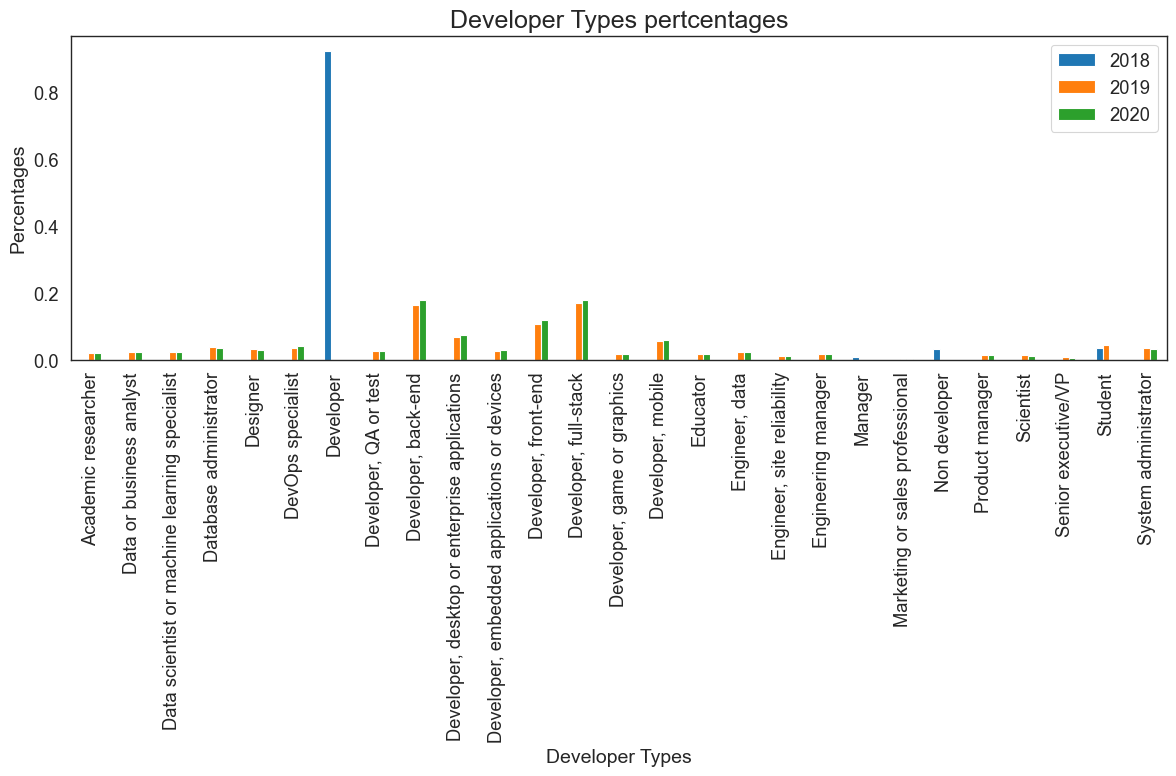

In [850]:
(devtype_all/devtype_all.sum()).plot(kind='bar', figsize=(12,8))
plt.title('Developer Types pertcentages', fontsize = 18)
plt.xlabel('Developer Types', fontsize = 14)
plt.ylabel('Percentages', fontsize = 14)
plt.tight_layout()

### Analysis

In developer types, developers who are full stack and working backends are the most in the three years. There is a presence of student developers only in 2019 the percentage is 7.5%. Those who are working back end and full stack their percentages increased throughout the three years. For those who are working as marketing and sales professionals, their percentage is lowest compare to others.

##  Impact of education/experience/responsibilities on gender inequalities.(Based on 2019 dataset)

In [855]:
cols = ['Gender','EdLevel', 'Dependents', 'SalaryUSD', 'YearsCodePro', 'Age', 'Country']
df2019 = survey_df_2019[cols]
df2019 = df2019[df2019.Gender != "Non-binary"]

In [857]:
df2019['exp_range'] = 0
df2019['exp_range'] = np.where((df2019.YearsCodePro >= 0) & (df2019.YearsCodePro <= 5), '0 - 5 years', df2019.exp_range)
df2019['exp_range'] = np.where((df2019.YearsCodePro > 5) & (df2019.YearsCodePro <= 10), '6 - 10 years', df2019.exp_range)
df2019['exp_range'] = np.where((df2019.YearsCodePro > 10) & (df2019.YearsCodePro <= 15), '11 - 15 years', df2019.exp_range)
df2019['exp_range'] = np.where((df2019.YearsCodePro > 15) & (df2019.YearsCodePro <= 20), '16 - 20 years', df2019.exp_range)
df2019['exp_range'] = np.where((df2019.YearsCodePro > 20), 'more that 20 years', df2019.exp_range)
#df2019

### **Analysis**<br>


After exploring the 2019 dataset, we have found that we cannot answer this question since male and female observations are significantly unbalanced.

## What is the gender distribution among top 5 countries of respondents in 2019?

In [861]:
all = df2019.groupby(['Country','Gender']).size().reset_index(name ='Count')
all['Total'] = all.groupby(['Country'])['Count'].transform('sum')
all = all.sort_values(by=['Total'], ascending=False)
#all.set_index('Total')
Top = all[:10].sort_values(by=['Total'], ascending=False)
Top

Country Gender  Count  Total
252   United States    Man  15895  17837
253   United States  Woman   1942  17837
101           India    Man   6632   7046
102           India  Woman    414   7046
84          Germany    Man   4847   5130
85          Germany  Woman    283   5130
250  United Kingdom  Woman    395   4933
249  United Kingdom    Man   4538   4933
39           Canada  Woman    275   2857
38           Canada    Man   2582   2857

In [863]:

# from raw value to percentage
total = Top.groupby(['Country'])['Count'].sum().reset_index()
total['Percentage'] = [i / j * 100 for i,j in zip(total['Count'], total['Count'])]

woman = Top[Top.Gender=='Woman'].groupby(['Country'])['Count'].sum().reset_index()
woman['Percentage'] = [i / j * 100 for i,j in zip(woman['Count'], total['Count'])]
woman.sort_values(by=['Percentage'], ascending=False, inplace=True)

In [865]:
woman

Country  Count  Percentage
4   United States   1942   10.887481
0          Canada    275    9.625481
3  United Kingdom    395    8.007298
2           India    414    5.875674
1         Germany    283    5.516569

In [867]:
total

Country  Count  Percentage
0          Canada   2857       100.0
1         Germany   5130       100.0
2           India   7046       100.0
3  United Kingdom   4933       100.0
4   United States  17837       100.0

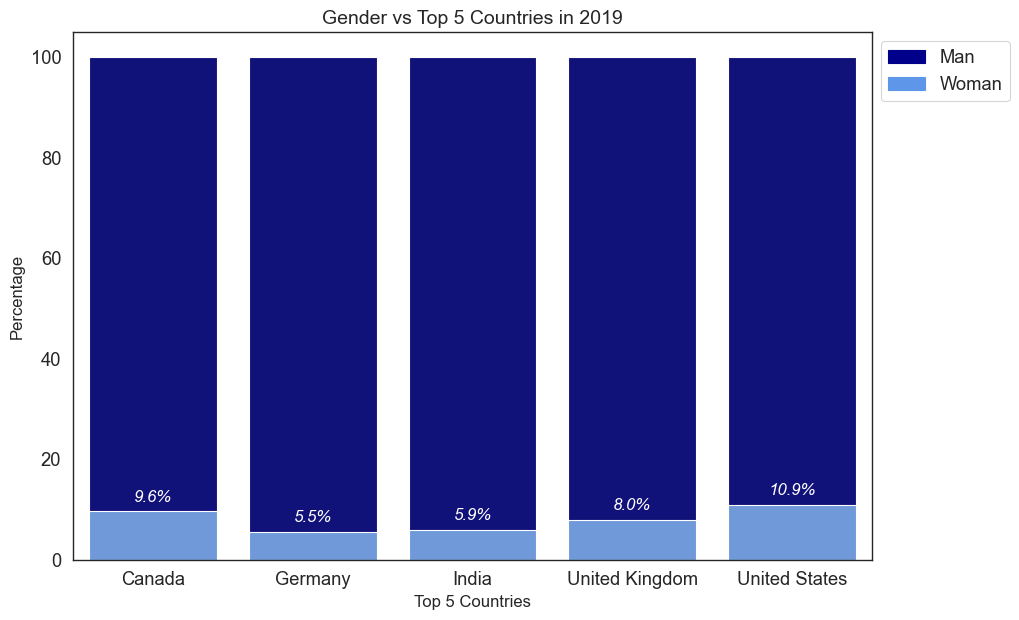

In [869]:
fig, ax = plt.subplots(figsize = (10, 6))

# bar chart 1 -> top bars (group of 'Man')
bar1 = sns.barplot(x="Country",  y="Percentage", data=total, color='darkblue')
# bar chart 2 -> bottom bars (group of 'Woman')
bar2 = sns.barplot(x="Country", y="Percentage", data=woman, color='#5E96E9')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='Man')
bottom_bar = mpatches.Patch(color='#5E96E9', label='Woman')
plt.legend(handles=[top_bar, bottom_bar])

# Fix the legend so it's not on top of the bars.
legend = ax.get_legend()
legend.set_bbox_to_anchor((1, 1))

ax.set_ylabel('Percentage', fontsize = 12)
ax.set_xlabel('Top 5 Countries', fontsize = 12)
plt.title('Gender vs Top 5 Countries in 2019', fontsize = 14)

def add_value_labels(bar2, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """
    # For each bar: Place a label
    for rect in bar2.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing  # Number of points between bar and label. Change to your liking.
        va = 'bottom' # Vertical alignment for positive values
        label = "{:.1f}%".format(y_value) # Use Y value as label and format number with one decimal place

        # Create annotation
        bar2.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va,                      # Vertically align label differently for
            color='white', fontsize=12, style='italic')       

#Add value bar
add_value_labels(bar2)

plt.tight_layout(pad=0., w_pad=-16.5, h_pad=0.0)  
plt.show()

### **Analysis**<br>


In terms of male and female statistics, it can be seen that the US has the relatively largest female percentage at about 10.9%. Follow by Canada, the UK at 9.6% and 8.0% respectively. India and Germany have the fewest female respondents among the top 5 at around 5%.

## Where are the most data scientist come from in 2019?

In [873]:
#creating data scientist scientist df
ds = survey_df_2019[survey_df_2019['DevType'].str.contains('Data scientist') == True ]
ds = ds.reset_index(drop=True)
len(ds)

5788

In [875]:
ds_country = ds.groupby(['Country']).size().reset_index(name ='Count')
ds_country.sort_values(by=['Count'], ascending=False, inplace=True)
top_ds_country = ds_country[:10]
top_ds_country

Country  Count
113       United States   1550
49                India    543
41              Germany    427
111      United Kingdom    339
18               Canada    195
39               France    169
74          Netherlands    148
14               Brazil    143
88   Russian Federation    123
5             Australia    119

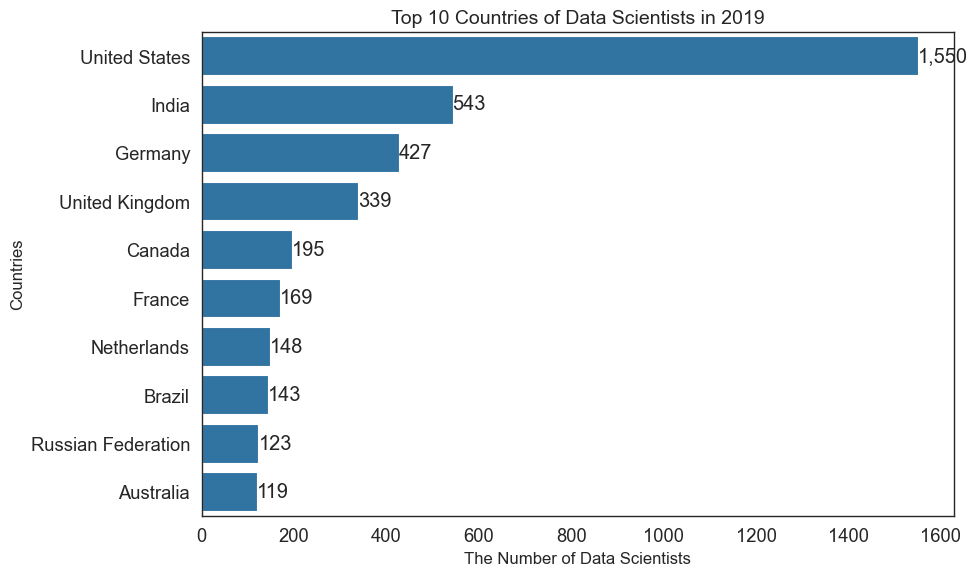

In [877]:
fig, ax = plt.subplots(figsize = (10, 6))
ax=sns.barplot(x="Count",  y="Country", data=top_ds_country )
ax.set_ylabel('Countries', fontsize = 12)
ax.set_xlabel('The Number of Data Scientists', fontsize = 12)
plt.title('Top 10 Countries of Data Scientists in 2019', fontsize = 14)

for y, x in enumerate(top_ds_country['Count']):
    label = "{:,}".format(int(x))
    plt.annotate(label, xy=(x, y), va='center')

plt.tight_layout()  
plt.show()

### Analysis


There are 5,788 data scientists who responded to the Stackoverflow survey in 2019. Most data scientists are from the US with 1,550 people and it is 3 times higher than data scientists from India. Followed by Germany and the UK with 427 and 339 people respectively. The rest are Canada, France, Netherlands, Brazil, Russia, and Australia which have less than 200 data scientists.

#  Which countries pay the most to Data Scientists in 2019?

In [881]:
ds_mean_salary = ds.groupby('Country')['SalaryUSD'].mean().reset_index(name ='Mean')
ds_mean_salary.sort_values(by=['Mean'], ascending=False, inplace=True)
ds_mean_salary

Country            Mean
85                                  Qatar  1000000.000000
72                                Myanmar   333757.333333
52                                Ireland   275851.466092
63                             Luxembourg   272796.133333
113                         United States   265211.014843
..                                    ...             ...
101                  Syrian Arab Republic     2916.000000
64                             Madagascar     1800.000000
116  Venezuela, Bolivarian Republic of...     1500.000000
16                               Cambodia      816.000000
118                                Zambia      400.000000

[120 rows x 2 columns]

In [883]:
#Cleaning Age's outliers from each gender)
ds_mean_salary = ds_mean_salary[(ds_mean_salary['Mean'] <= 280000)]

In [885]:
Top_mean_salary = ds_mean_salary[:10]
Top_mean_salary

Country           Mean
52          Ireland  275851.466092
63       Luxembourg  272796.133333
113   United States  265211.014843
111  United Kingdom  169366.692664
100     Switzerland  165462.430196
25           Cyprus  150936.000000
5         Australia  146803.174460
78           Norway  145948.523273
18           Canada  125228.788666
56            Japan  118969.194525

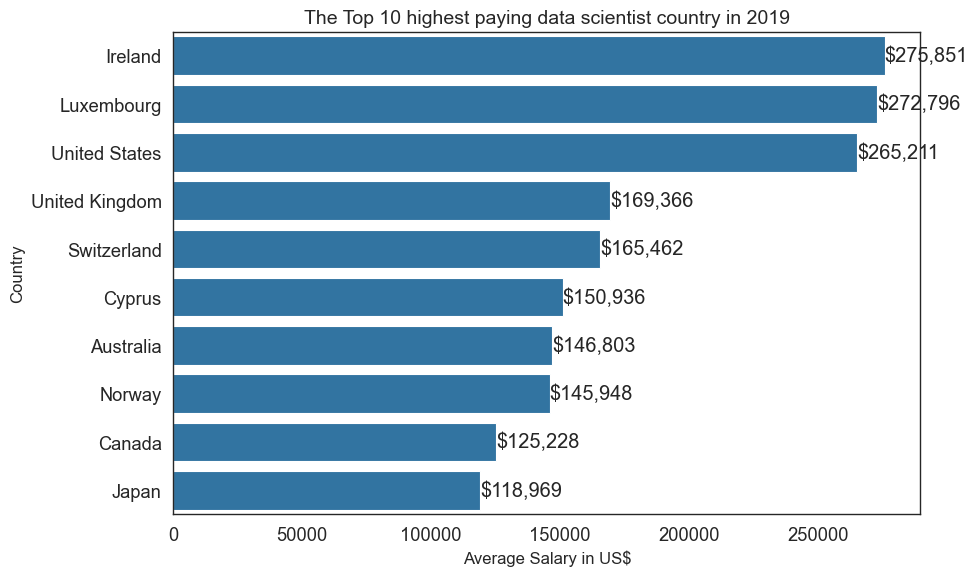

In [887]:
fig, ax = plt.subplots(figsize = (10, 6))
ax=sns.barplot(x="Mean",  y="Country", data=Top_mean_salary )
ax.set_ylabel('Country', fontsize = 12)
ax.set_xlabel('Average Salary in US$', fontsize = 12)
plt.title('The Top 10 highest paying data scientist country in 2019', fontsize = 14)

for y, x in enumerate(Top_mean_salary['Mean']):
    label = "${:,}".format(int(x))
    plt.annotate(label, xy=(x, y), va='center')

plt.tight_layout()  
plt.show()

**Analysis**<br>


In 2019, the top three countries which have a highest mean annual salary of a data scientist are Ireland (275,851), Luxembourg (272,769), and the USA (265,211). Apart from that, the mean salary of the rest of the countries is less than (200,000) per year. Japan provides the highest mean annual salary among Asian countries (118,969)<br>
*Figures in Dollars* **$**

In [890]:
mydf2018 = pd.read_csv(r"C:\Users\SHRISTI\OneDrive\Desktop\GitHub\survey_results_public_2018.csv")


## Most Popular IDE's in 2018

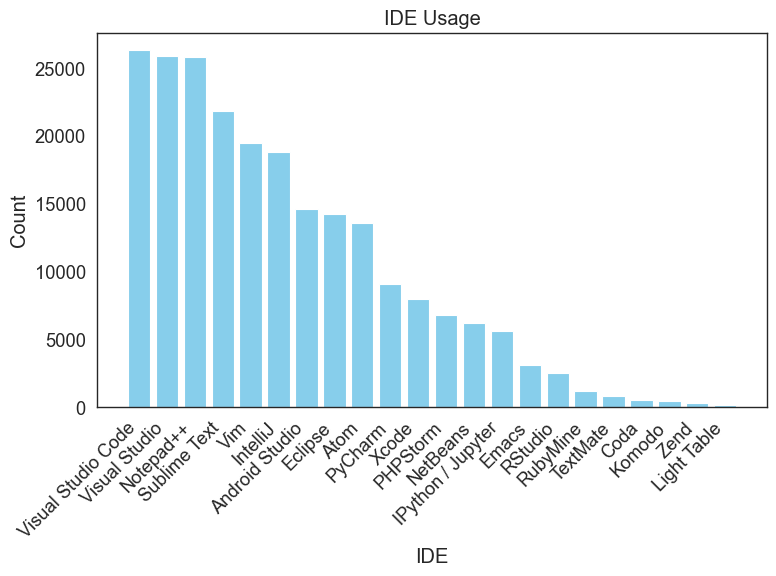

In [892]:
# Split IDEs and explode into separate rows
individual_ides = mydf2018['IDE'].str.split(';').explode()

# Count occurrences of each IDE and sort by value
ide_counts_value_sorted = individual_ides.value_counts().sort_values(ascending=False)

# Plotting - Sorted by value
plt.figure(figsize=(8, 6))
plt.bar(ide_counts_value_sorted.index, ide_counts_value_sorted.values, color='skyblue')
plt.title('IDE Usage')
plt.xlabel('IDE')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Analysis of IDE Usage

1. **Popular IDEs**: Visual Studio Code, Visual Studio, and Notepad++ are among the most widely used IDEs, with high user counts ranging from 25,870 to 26,280.

2. **Text Editors**: Sublime Text, Vim, and IntelliJ are also popular choices, with user counts ranging from 19,477 to 21,810.

3. **General-purpose Editors**: TextMate, Coda, and Light Table are also used, although they have lower user counts compared to other IDEs.

4. **Emerging Trends**: IPython / Jupyter, Atom, and Emacs show significant adoption, indicating a growing interest in interactive computing environments, lightweight editors, and customizable text editors, respectively.

5. **Industry Standard**: Xcode, primarily used for macOS and iOS development, maintains a substantial user base due to its integration with Apple's development ecosystem.



## Coders perception about AI in 2018

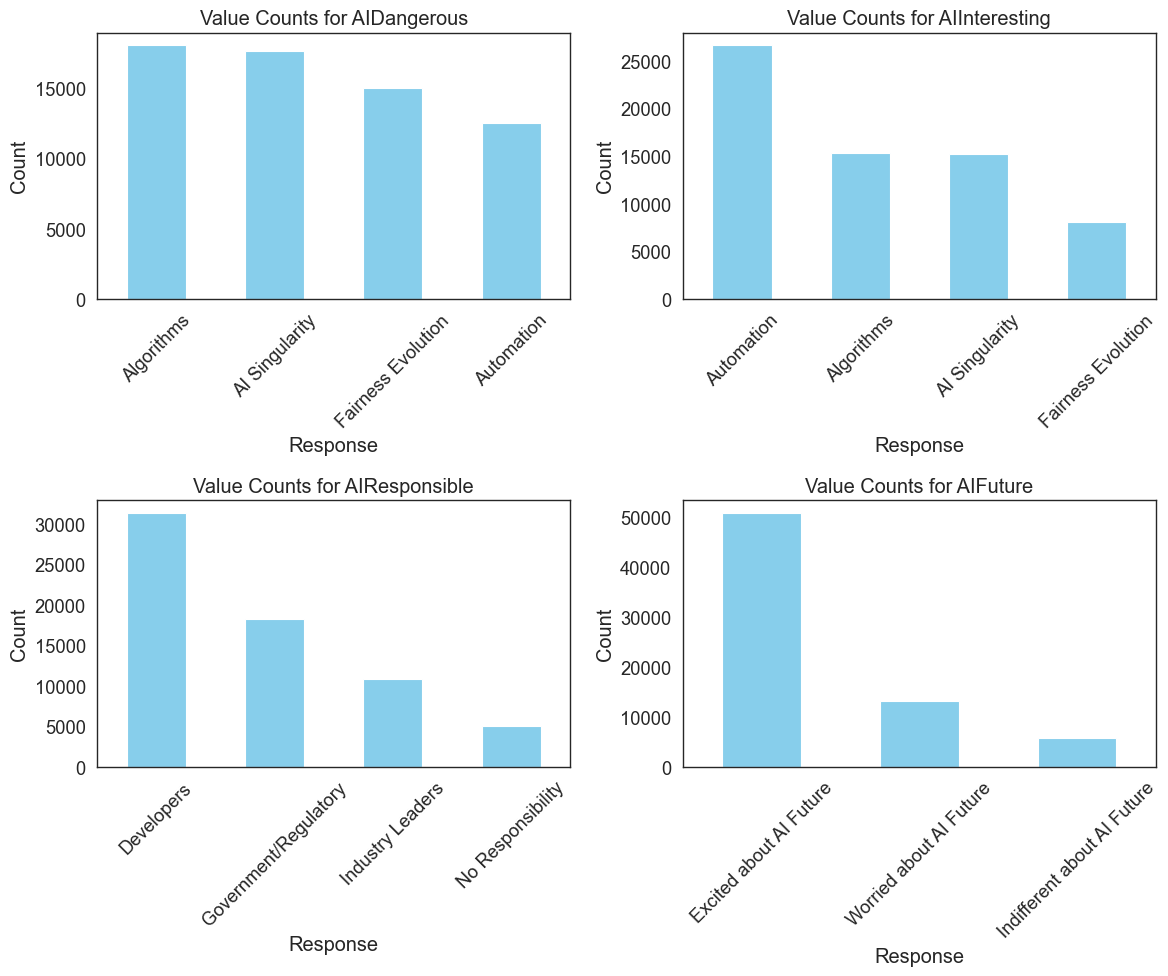

In [895]:
import random
# Assuming df2018 is your DataFrame
df = df2018[['AIDangerous','AIInteresting','AIResponsible','AIFuture']]

# Strip leading and trailing whitespace from all columns
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Mapping for shorter versions
short_mapping = {
    'Algorithms making important decisions': 'Algorithms',
    'Artificial intelligence surpassing human intelligence ("the singularity")': 'AI Singularity',
    'Evolving definitions of "fairness" in algorithmic versus human decisions': 'Fairness Evolution',
    "Increasing automation of jobs": 'Automation',
    "The developers or the people creating the AI": 'Developers',
    "A governmental or other regulatory body": 'Government/Regulatory',
    "Prominent industry leaders": 'Industry Leaders',
    "Nobody": 'No Responsibility',
    "I'm excited about the possibilities more than worried about the dangers.": 'Excited about AI Future',
    "I'm worried about the dangers more than I'm excited about the possibilities.": 'Worried about AI Future',
    "I don't care about it, or I haven't thought about it.": 'Indifferent about AI Future'
}

# Replace responses with shorter versions
df.replace(short_mapping, inplace=True)

# Function to create value count plots for each column
def plot_value_counts(column_name, ax):
    colors = ['skyblue','yellow']
    df[column_name].value_counts().plot(kind='bar', color=random.choice(colors), ax=ax)
    ax.set_title(f'Value Counts for {column_name}')
    ax.set_xlabel('Response')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot value counts for each column
for i, column in enumerate(df.columns):
    plot_value_counts(column, axes[i//2, i%2])

plt.tight_layout()
plt.show()


## Analysis

### AIDangerous:
- The most commonly cited concern is "Algorithms making important decisions," followed closely by "Artificial intelligence surpassing human intelligence" and "Evolving definitions of fairness."
- "Increasing automation of jobs" is also a significant concern but appears to be less frequently mentioned compared to the other categories.

### AIInteresting:
- The most interesting aspect for respondents seems to be "Increasing automation of jobs," followed by "Algorithms making important decisions" and "Artificial intelligence surpassing human intelligence."
- "Evolving definitions of fairness" appears to be less intriguing to respondents compared to other categories.

### AIResponsible:
- The majority of respondents believe that responsibility lies with "The developers or the people creating the AI."
- Fewer respondents attribute responsibility to "A governmental or other regulatory body," "Prominent industry leaders," or "Nobody."

### AIFuture:
- A significant proportion of respondents express excitement about the future of AI, indicating that they are "Excited about the possibilities more than worried about the dangers."
- However, there is also a notable percentage of respondents who are "Worried about the dangers more than excited about the possibilities."
- A smaller portion of respondents either "Don't care about it" or "Haven't thought about it."

Overall, these results suggest a complex and varied perspective on AI technology. While many see great potential in AI, there are also concerns about its implications, particularly regarding decision-making, automation of jobs, and the ethical considerations surrounding its development and regulation.


##  Predicting the growth of languages for upcoming years based on the survey answers (2018, 2019, 2020)

In [898]:
print(df2018.columns)
print(survey_df_2019.columns)
print(df2020.columns)

Index(['Respondent', 'Hobby', 'OpenSource', 'Country', 'Student', 'Employment',
       'FormalEducation', 'UndergradMajor', 'CompanySize', 'DevType',
       ...
       'Exercise', 'Gender', 'SexualOrientation', 'EducationParents',
       'RaceEthnicity', 'Age', 'Dependents', 'MilitaryUS', 'SurveyTooLong',
       'SurveyEasy'],
      dtype='object', length=129)
Index(['Age', 'JobSatisfaction', 'SalaryUSD', 'Country', 'Dependents',
       'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'Hobbyist',
       'CompetenceLevel', 'CurrentJobSatis', 'JobStatus',
       'LanguageDesireNextYear', 'LanguageWorkedWith', 'Profession',
       'UndergradMajor', 'YearsCodePro', 'DevType', 'PlatformWorkedWith',
       'PlatformDesireNextYear'],
      dtype='object')
Index(['Age', 'Gender', 'SalaryUSD', 'Country', 'DevType', 'Hobbyist',
       'EdLevel', 'Employment', 'Ethnicity', 'CurrentJobSatis', 'JobStatus',
       'LanguageDesireNextYear', 'LanguageWorkedWith', 'Profession',
       'UndergradMajor', 

In [900]:
df_18 = df2018['LanguageWorkedWith']
df_19 = survey_df_2019['LanguageWorkedWith']
df_20 = df2020['LanguageWorkedWith']

In [903]:

#splitting 'LanguageWorkedWith' on ';' 
language_2018 = df_18.str.split(';', expand=True).stack().value_counts().to_frame('2018')
language_2018['Language'] = language_2018.index
language_2018.reset_index(drop=True, inplace=True)
#language_2020.sort_values(by=['Count'], ascending=False, inplace=True)
language_2018 = language_2018[['Language', '2018']]
#language_2018

In [904]:

#splitting 'LanguageWorkedWith' on ';' 
language_2019= df_19.str.split(';', expand=True).stack().value_counts().to_frame('2019')
language_2019['Language'] = language_2019.index
language_2019.reset_index(drop=True, inplace=True)
#language_2020.sort_values(by=['Count'], ascending=False, inplace=True)
language_2019 = language_2019[['Language', '2019']]
#language_2019

In [909]:
#splitting 'LanguageWorkedWith' on ';' 
language_2020= df_20.str.split(';', expand=True).stack().value_counts().to_frame('2020')
language_2020['Language'] = language_2020.index
language_2020.reset_index(drop=True, inplace=True)
#language_2020.sort_values(by=['Count'], ascending=False, inplace=True)
language_2020 = language_2020[['Language', '2020']]
#language_2020

In [912]:
compare_df = pd.merge(language_2018, language_2019,on = ['Language'], how = 'outer')
language_all = pd.merge(compare_df, language_2020,on = ['Language'], how = 'outer')
language_all.fillna(0, inplace=True)
language_all['2018'] = language_all['2018']. astype(int)
language_all['2019'] = language_all['2019']. astype(int)
language_all['2020'] = language_all['2020']. astype(int)
language_all.set_index('Language', inplace=True)
#language_all

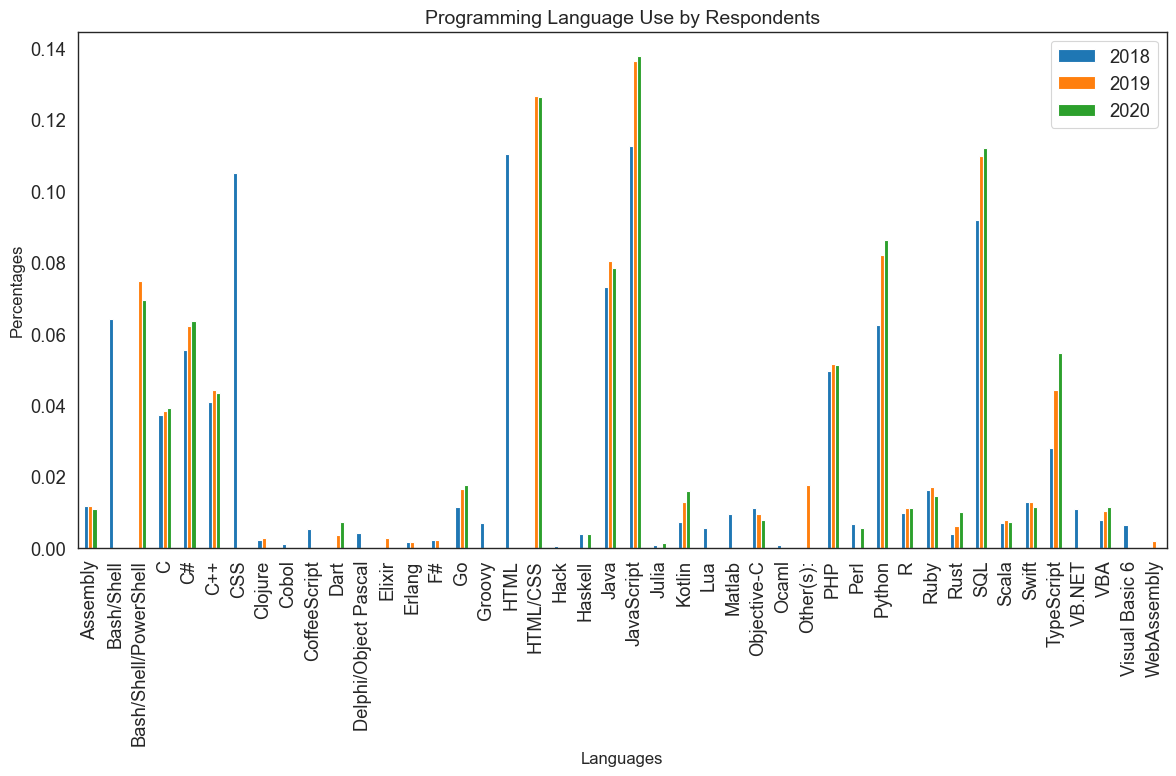

In [914]:
(language_all/language_all.sum()).plot(kind='bar', figsize=(12,8))
plt.title('Programming Language Use by Respondents', fontsize = 14)
plt.xlabel('Languages', fontsize = 12)
plt.ylabel('Percentages', fontsize = 12)
plt.tight_layout()

###  **Analysing the growth of languages from 2018 to 2020 before predicting part**

The most language the developers use between 2018 to 2020 is JavaScript(14%). The second and third highest working language is HTML/CSS(13%) and SQL(11%). JavaScript and SQL had the same steady increasing trend over the three years. The percentage of HTML/CSS was slightly increased from 2018 to 2019. However, it dropped to the same level as 2018 in 2020. Python was responsible for about 9% in 2018. After then, it decreased to 8% in 2019 and it rose 1% in 2020.

There are some languages that were in only 2019; Elixir, Clojure, F#, Web assembly, and Erlang. Perl, Haskell, Julia was in the 2019 and 2020 surveys with small percentages.

In [917]:
language_2018

Language   2018
0             JavaScript  54686
1                   HTML  53628
2                    CSS  50979
3                    SQL  44670
4                   Java  35521
5             Bash/Shell  31172
6                 Python  30359
7                     C#  26954
8                    PHP  24071
9                    C++  19872
10                     C  18042
11            TypeScript  13626
12                  Ruby   7911
13                 Swift   6310
14              Assembly   5760
15                    Go   5532
16           Objective-C   5510
17                VB.NET   5254
18                     R   4813
19                Matlab   4564
20                   VBA   3810
21                Kotlin   3508
22                 Scala   3420
23                Groovy   3373
24                  Perl   3280
25        Visual Basic 6   3087
26                   Lua   2733
27          CoffeeScript   2603
28  Delphi/Object Pascal   2025
29               Haskell   1961
30                  Rust   1857
31                    F#   1115
32               Clojure   1032
33                Erlang    886
34                 Cobol    590
35                 Ocaml    470
36                 Julia    430
37                  Hack    254

In [919]:
#Preparing data for ML
df_language_2018 = language_2018[['Language', '2018']]
df_language_2018 = df_language_2018.rename(columns={'2018': 'Number'})
df_language_2018['Year'] = '2018'
df_language_2018['Year_Total'] = df_language_2018['Number'].sum()
df_language_2018['Fraction'] = df_language_2018['Number']/df_language_2018['Number'].sum()
df_language_2018 = df_language_2018[['Year', 'Language', 'Number', 'Year_Total', 'Fraction']]
df_language_2018.sort_values(by=['Fraction'], ascending=False, inplace=True)
#df_language_2018
df_language_2019 = language_2019[['Language', '2019']]
df_language_2019 = df_language_2019.rename(columns={'2019': 'Number'})
df_language_2019['Year'] = '2019'
df_language_2019['Year_Total'] = df_language_2019['Number'].sum()
df_language_2019['Fraction'] = df_language_2019['Number']/df_language_2019['Number'].sum()
df_language_2019 = df_language_2019[['Year', 'Language', 'Number', 'Year_Total', 'Fraction']]
df_language_2019.sort_values(by=['Fraction'], ascending=False, inplace=True)
#df_language_2019
df_language_2020 = language_2020[['Language', '2020']]
df_language_2020 = df_language_2020.rename(columns={'2020': 'Number'})
df_language_2020['Year'] = '2020'
df_language_2020['Year_Total'] = df_language_2020['Number'].sum()
df_language_2020['Fraction'] = df_language_2020['Number']/df_language_2020['Number'].sum()
df_language_2020 = df_language_2020[['Year', 'Language', 'Number', 'Year_Total', 'Fraction']]
df_language_2020.sort_values(by=['Fraction'], ascending=False, inplace=True)
#df_language_2020

#Append Dataset 2018 x 2019 x 2020
df_language = pd.concat([df_language_2018[:10], df_language_2019[:10], df_language_2020[:10]] , axis=0)
#resetting the index values
df_language = df_language.reset_index(drop=True)
#df_language

In [921]:
cols = ['Language', 'Fraction']
df_language_2018_ = df_language_2018[cols][:10]
#df_language_2018_
cols = ['Language', 'Fraction']
df_language_2019_ = df_language_2019[cols][:10]
#df_language_2019_
cols = ['Language', 'Fraction']
df_language_2020_ = df_language_2020[cols][:10]
#df_language_2020_

In [923]:
df_language_2018_.set_index('Language', inplace = True)
df_language_2018_t = df_language_2018_.T
df_language_2018_t['Year'] = '2018'
df_language_2018_t.Year = pd.to_datetime(df_language_2018_t.Year)
df_language_2018_t = df_language_2018_t[['Year','JavaScript', 'HTML','CSS', 'SQL', 'Python', 'Java', 'Bash/Shell', 'C#', 'PHP', 'C++']]
#df_language_2018_t
df_language_2019_.set_index('Language', inplace = True)
df_language_2019_t = df_language_2019_.T
df_language_2019_t['Year'] = '2019'
df_language_2019_t.Year = pd.to_datetime(df_language_2019_t.Year)
df_language_2019_t = df_language_2019_t[['Year','JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Java', 'Bash/Shell/PowerShell', 'C#', 'PHP', 'TypeScript', 'C++']]
#df_language_2019_t
df_language_2020_.set_index('Language', inplace = True)
df_language_2020_t = df_language_2020_.T
df_language_2020_t['Year'] = '2020'
df_language_2020_t.Year = pd.to_datetime(df_language_2020_t.Year)
df_language_2020_t = df_language_2020_t[['Year','JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Java', 'Bash/Shell/PowerShell', 'C#', 'PHP', 'TypeScript', 'C++']]
#df_language_2020_t

#Append Dataset 2018 x 2019 x 2020
all_language = pd.concat([df_language_2018_t, df_language_2019_t, df_language_2020_t] , axis=0)
#resetting the index values
all_language = all_language.reset_index(drop=True)
all_language.set_index('Year', inplace = True)
all_language

Language    JavaScript      HTML       CSS       SQL    Python      Java  \
Year                                                                       
2018-01-01    0.112600  0.110421  0.104967  0.091976  0.062510  0.073138   
2019-01-01    0.136468       NaN       NaN  0.109882  0.081963  0.080446   
2020-01-01    0.137808       NaN       NaN  0.112110  0.086418  0.078374   

Language    Bash/Shell        C#       PHP       C++  HTML/CSS  \
Year                                                             
2018-01-01    0.064184  0.055499  0.049563  0.040917       NaN   
2019-01-01         NaN  0.062234  0.051494  0.044193  0.126595   
2020-01-01         NaN  0.063638  0.051339  0.043372  0.126495   

Language    Bash/Shell/PowerShell  TypeScript  
Year                                           
2018-01-01                    NaN         NaN  
2019-01-01               0.074697    0.044158  
2020-01-01               0.069555    0.054607

In [925]:
all_language.columns

Index(['JavaScript', 'HTML', 'CSS', 'SQL', 'Python', 'Java', 'Bash/Shell',
       'C#', 'PHP', 'C++', 'HTML/CSS', 'Bash/Shell/PowerShell', 'TypeScript'],
      dtype='object', name='Language')

Text(0, 0.5, 'Fraction of total queries in the year (%)')

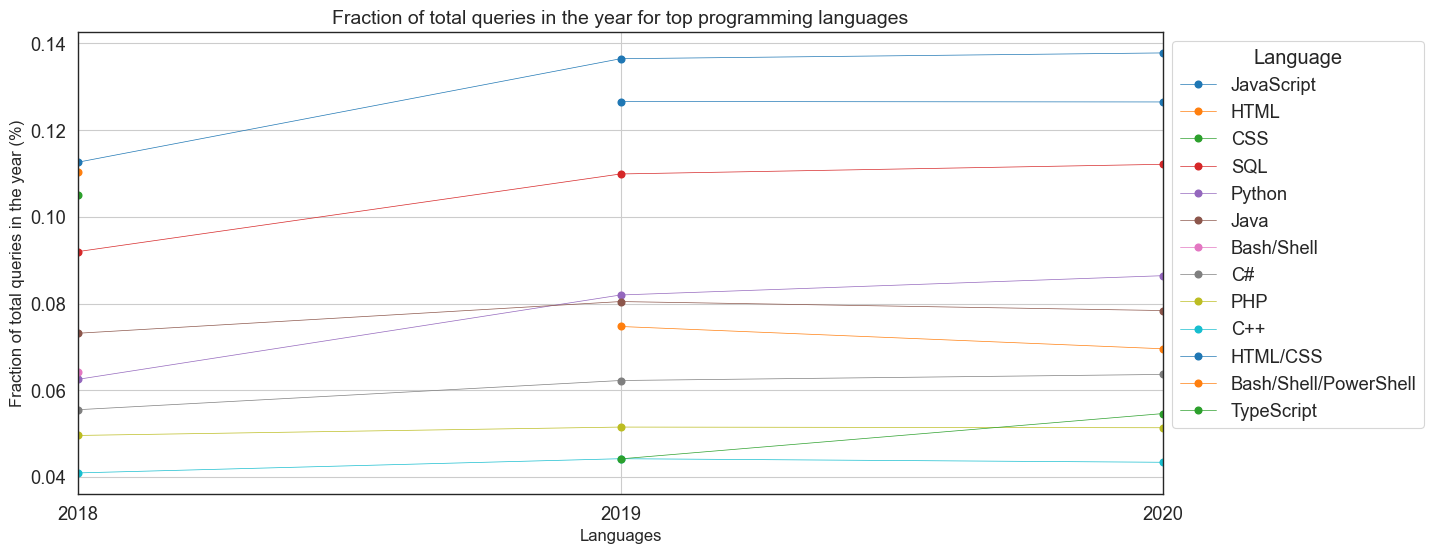

In [927]:
ax = all_language.plot(grid=True, lw=0.5, figsize=(14,6), marker='o')

#Show the legend outside of the plot.
legend = ax.get_legend()
legend.set_bbox_to_anchor((1, 1))
plt.title('Fraction of total queries in the year for top programming languages', fontsize = 14)
plt.xlabel('Languages', fontsize = 12)
plt.ylabel('Fraction of total queries in the year (%)', fontsize = 12)

We are trying to answer the question "Predicting the growth of languages for upcoming years based on the survey answers (2018, 2019, 2020)."

Since we have only 3 years of datasets, there is not enough data to use the time series forecasting method to predict the future popularity of programming languages. With the very small number of observations, there is insufficient data to split the observations into training and testing. We need more observations to build the predictive model, this question we leave for further exploration in future projects.

## Can we predict the salary of Data Scientists?

In [931]:
#Rename columns
cleaned_2018.rename(columns={'JobSatisfaction': 'CurrentJobSatis', 'JobSearchStatus': 'JobStatus', 'YearsCodingProf':'YearsCodePro'}, inplace =True)

In [933]:
sal_df = ['Age', 'Country', 'EdLevel', 'DevType', 'YearsCodePro', 'SalaryUSD']

df1 = cleaned_2018
df2 = cleaned_df_2019
df3 = df2020

In [935]:
#Append Dataset 2018 x 2019 x 2020
df_sal = pd.concat([df1[sal_df], df2[sal_df], df3[sal_df]], axis=0)
#resetting the index values
df_sal = df_sal.reset_index(drop=True)
df_sal.shape

(189833, 6)

In [937]:
#creating data scientist scientist df
all_ds = df_sal[df_sal['DevType'].str.contains('Data scientist') == True ]
all_ds = all_ds.reset_index(drop=True)
len(all_ds)

8676

In [939]:
all_ds['DevType'] = 'Data scientist'
all_ds

Age             Country    EdLevel         DevType YearsCodePro  \
0     28              Canada  Bachelors  Data scientist          3.0   
1     21              Canada  No Degree  Data scientist          4.0   
2     25           Argentina    Masters  Data scientist          3.0   
3     25       United States  Bachelors  Data scientist          6.0   
4     21               India  No Degree  Data scientist          6.0   
...   ..                 ...        ...             ...          ...   
8671  23  Russian Federation  Bachelors  Data scientist          3.0   
8672  27             Germany    Masters  Data scientist          2.0   
8673  47       United States  Bachelors  Data scientist         22.0   
8674  33              Panama    Masters  Data scientist          2.0   
8675  28       United States    Masters  Data scientist          5.0   

          SalaryUSD  
0     366420.000000  
1     170292.187500  
2       8400.000000  
3      66750.000000  
4       4790.000000  
...             ...  
8671   33972.000000  
8672   97284.000000  
8673  148951.282051  
8674   72000.000000  
8675  180000.000000  

[8676 rows x 6 columns]

In [941]:
#Divide SalaryUSD into 2 groups; SalaryUSD >= median and SalaryUSD < median 
all_ds['greater than median'] = all_ds['SalaryUSD'] >= all_ds['SalaryUSD'].median()
all_ds['SalaryUSD'].median() #56616.0 USD

54049.0

In [943]:

#Encoding the target
labelencoder = preprocessing.LabelEncoder()
all_ds['gt_median'] = labelencoder.fit_transform(all_ds['greater than median'])

le_name_mapping = dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_)))
print(le_name_mapping)
#{False: 0 (SalaryUSD < median), True: 1 (SalaryUSD >= median}

{False: 0, True: 1}


In [945]:
X = all_ds.drop(['SalaryUSD', 'greater than median', 'gt_median', 'DevType'], axis = 1)
y = all_ds['gt_median']
X.shape
y

0       1
1       1
2       0
3       1
4       0
       ..
8671    0
8672    1
8673    1
8674    1
8675    1
Name: gt_median, Length: 8676, dtype: int64

In [947]:
cats_lst = X.select_dtypes(include = ['object']).columns.tolist()
for col in cats_lst:
    X = pd.concat([X.drop(col, axis=1), pd.get_dummies(X[col], prefix=col, prefix_sep='_', drop_first=True)], axis=1)
X.shape
X

Age_16  Age_17  Age_18  Age_19  Age_20  Age_21  Age_22  Age_23  Age_24  \
0      False   False   False   False   False   False   False   False   False   
1      False   False   False   False   False    True   False   False   False   
2      False   False   False   False   False   False   False   False   False   
3      False   False   False   False   False   False   False   False   False   
4      False   False   False   False   False    True   False   False   False   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
8671   False   False   False   False   False   False   False    True   False   
8672   False   False   False   False   False   False   False   False   False   
8673   False   False   False   False   False   False   False   False   False   
8674   False   False   False   False   False   False   False   False   False   
8675   False   False   False   False   False   False   False   False   False   

      Age_25  ...  YearsCodePro_34.0  YearsCodePro_35.0  YearsCodePro_36.0  \
0      False  ...              False              False              False   
1      False  ...              False              False              False   
2       True  ...              False              False              False   
3       True  ...              False              False              False   
4      False  ...              False              False              False   
...      ...  ...                ...                ...                ...   
8671   False  ...              False              False              False   
8672   False  ...              False              False              False   
8673   False  ...              False              False              False   
8674   False  ...              False              False              False   
8675   False  ...              False              False              False   

      YearsCodePro_37.0  YearsCodePro_38.0  YearsCodePro_39.0  \
0                 False              False              False   
1                 False              False              False   
2                 False              False              False   
3                 False              False              False   
4                 False              False              False   
...                 ...                ...                ...   
8671              False              False              False   
8672              False              False              False   
8673              False              False              False   
8674              False              False              False   
8675              False              False              False   

      YearsCodePro_40.0  YearsCodePro_41.0  YearsCodePro_42.0  \
0                 False              False              False   
1                 False              False              False   
2                 False              False              False   
3                 False              False              False   
4                 False              False              False   
...                 ...                ...                ...   
8671              False              False              False   
8672              False              False              False   
8673              False              False              False   
8674              False              False              False   
8675              False              False              False   

      YearsCodePro_46.0  
0                 False  
1                 False  
2                 False  
3                 False  
4                 False  
...                 ...  
8671              False  
8672              False  
8673              False  
8674              False  
8675              False  

[8676 rows x 220 columns]

In [949]:
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state=142)

# Model Training

In [952]:
all_metrics = {}

def metrics_data(title, labels, predictions):
    """
    INPUT:
        title - Display title for classification algorithm
        labels - Actual values for target variable
        predictions - Predicted values for target variable
        
    OUTPUT:
        metrics - Dictionary of classification metrics for given title
    """
    metrics = {
        title: {
            "model": title,
            "accuracy": accuracy_score(labels, predictions),
            "precision": precision_score(labels, predictions),
            "recall": recall_score(labels, predictions),
            "f1-score": f1_score(labels, predictions),
            "r2":  r2_score(labels, predictions)
        }
    }
    print(metrics)
    return metrics

In [954]:
#For hyperparameter tuning we will use optuna
!pip install optuna
import optuna

In [955]:
#DecisionTreeClassifier
# Define the objective function
def objective(trial):
    max_depth = trial.suggest_int('max_depth', 1, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 50)

    model = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best hyperparameters
print('Best hyperparameters: ', study.best_params)

# Train the model with the best hyperparameters
best_params = study.best_params
start = time.time()
modelDC = DecisionTreeClassifier(**best_params)
modelDC.fit(X_train, y_train)
end = time.time()
TimeDC = end - start
print('Time: ', TimeDC)

# Evaluating model on test set
y_pred = modelDC.predict(X_test)
all_metrics.update(metrics_data("Decision Trees", y_test, y_pred))

# Evaluating model on train set
y_pred = modelDC.predict(X_train)
accuracyDC2 = accuracy_score(y_train, y_pred)
print('Accuracy on train set: {}'.format(accuracyDC2))

[I 2024-11-10 13:30:27,177] A new study created in memory with name: no-name-0812b230-6aaf-4cd4-8bdf-efe6c70538e2
[I 2024-11-10 13:30:27,288] Trial 0 finished with value: 0.8052247406838263 and parameters: {'max_depth': 9, 'min_samples_leaf': 47}. Best is trial 0 with value: 0.8052247406838263.
[I 2024-11-10 13:30:27,354] Trial 1 finished with value: 0.752593161736458 and parameters: {'max_depth': 4, 'min_samples_leaf': 39}. Best is trial 0 with value: 0.8052247406838263.
[I 2024-11-10 13:30:27,396] Trial 2 finished with value: 0.7230119093353823 and parameters: {'max_depth': 3, 'min_samples_leaf': 13}. Best is trial 0 with value: 0.8052247406838263.
[I 2024-11-10 13:30:27,446] Trial 3 finished with value: 0.7837111025739532 and parameters: {'max_depth': 6, 'min_samples_leaf': 13}. Best is trial 0 with value: 0.8052247406838263.
[I 2024-11-10 13:30:27,526] Trial 4 finished with value: 0.8179024202842874 and parameters: {'max_depth': 15, 'min_samples_leaf': 16}. Best is trial 4 with val

Best hyperparameters:  {'max_depth': 17, 'min_samples_leaf': 3}
Time:  0.09307980537414551
{'Decision Trees': {'model': 'Decision Trees', 'accuracy': 0.8259700345754898, 'precision': 0.8574898785425101, 'recall': 0.7926646706586826, 'f1-score': 0.823803967327888, 'r2': 0.30339065357839967}}
Accuracy on train set: 0.8585542565453648


In [956]:
#MultinomialNB
# Define the objective function
def objective(trial):
    alpha = trial.suggest_float('alpha', 1e-3, 1e-1, log=True)

    model = MultinomialNB(alpha=alpha)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best hyperparameters
print('Best hyperparameters: ', study.best_params)

# Train the model with the best hyperparameters
best_params = study.best_params
start = time.time()
modelNB = MultinomialNB(**best_params)
modelNB.fit(X_train, y_train)
end = time.time()
TimeNB = end - start
print('Time: ', TimeNB)

# Evaluating model on test set
y_pred = modelNB.predict(X_test)
all_metrics.update(metrics_data("Multinomial Naive Bayes", y_test, y_pred))

# Evaluating model on train set
y_pred = modelNB.predict(X_train)
accuracyNB2 = accuracy_score(y_train, y_pred)
print('Accuracy on train set: {}'.format(accuracyNB2))

[I 2024-11-10 13:30:36,422] A new study created in memory with name: no-name-b2c2d64c-d27e-466f-968c-20cdf49b3675
[I 2024-11-10 13:30:36,448] Trial 0 finished with value: 0.8271225509028045 and parameters: {'alpha': 0.008101501840451315}. Best is trial 0 with value: 0.8271225509028045.
[I 2024-11-10 13:30:36,471] Trial 1 finished with value: 0.8271225509028045 and parameters: {'alpha': 0.03097461132123888}. Best is trial 0 with value: 0.8271225509028045.
[I 2024-11-10 13:30:36,496] Trial 2 finished with value: 0.8275067230119093 and parameters: {'alpha': 0.09364961005276479}. Best is trial 2 with value: 0.8275067230119093.
[I 2024-11-10 13:30:36,519] Trial 3 finished with value: 0.8275067230119093 and parameters: {'alpha': 0.08927328835023829}. Best is trial 2 with value: 0.8275067230119093.
[I 2024-11-10 13:30:36,544] Trial 4 finished with value: 0.8271225509028045 and parameters: {'alpha': 0.03073852577865736}. Best is trial 2 with value: 0.8275067230119093.
[I 2024-11-10 13:30:36,56

Best hyperparameters:  {'alpha': 0.09364961005276479}
Time:  0.018273115158081055
{'Multinomial Naive Bayes': {'model': 'Multinomial Naive Bayes', 'accuracy': 0.8275067230119093, 'precision': 0.8263428991905813, 'recall': 0.8405688622754491, 'f1-score': 0.8333951762523191, 'r2': 0.30954172948499215}}
Accuracy on train set: 0.8414292771282726


In [957]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier


In [962]:
#K nearest neighbour grid Search
param_grid = { 'n_neighbors' : [7, 21, 25, 31, 35, 49, 55, 81],}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'n_neighbors': 31}
Best score: 0.7946668836143485


In [963]:
#K nearest neighbour
start = time.time()
knn = KNeighborsClassifier(n_neighbors=31)
knn.fit(X_train, y_train)
end = time.time()
TimeKnn = end-start

y_pred = knn.predict(X_test)
all_metrics.update(metrics_data("K Nearest Neighbour",y_test,y_pred))

y_pred = knn.predict(X_train)
accuracyknn = accuracy_score(y_train, y_pred)
print('Accuracy on train set: {}'.format(accuracyknn))
                   

{'K Nearest Neighbour': {'model': 'K Nearest Neighbour', 'accuracy': 0.7825585862466385, 'precision': 0.775, 'recall': 0.812125748502994, 'f1-score': 0.7931286549707602, 'r2': 0.1296227592171616}}
Accuracy on train set: 0.8159064712662605


In [966]:
#GaussianNB

# Define the objective function
def objective(trial):
    var_smoothing = trial.suggest_float('var_smoothing', 1e-11, 1e-7, log=True)

    model = GaussianNB(var_smoothing=var_smoothing)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best hyperparameters
print('Best hyperparameters: ', study.best_params)

# Train the model with the best hyperparameters
best_params = study.best_params
start = time.time()
modelGNB = GaussianNB(**best_params)
modelGNB.fit(X_train, y_train)
end = time.time()
TimeGNB = end - start
print('Time: ', TimeGNB)

# Evaluating model on test set
y_pred = modelGNB.predict(X_test)
all_metrics.update(metrics_data("Gaussian Naive Bayes", y_test, y_pred))

# Evaluating model on train set
y_pred = modelGNB.predict(X_train)
accuracyGNB2 = accuracy_score(y_train, y_pred)
print('Accuracy on train set: {}'.format(accuracyGNB2))

[I 2024-11-10 13:31:34,370] A new study created in memory with name: no-name-cbcd3768-bf14-4750-abc4-7097395efdf3
[I 2024-11-10 13:31:34,422] Trial 0 finished with value: 0.6546292739147138 and parameters: {'var_smoothing': 9.896324484927288e-09}. Best is trial 0 with value: 0.6546292739147138.
[I 2024-11-10 13:31:34,472] Trial 1 finished with value: 0.6515558970418748 and parameters: {'var_smoothing': 5.37487195530571e-10}. Best is trial 0 with value: 0.6546292739147138.
[I 2024-11-10 13:31:34,524] Trial 2 finished with value: 0.6396465616596235 and parameters: {'var_smoothing': 2.615954720458287e-11}. Best is trial 0 with value: 0.6546292739147138.
[I 2024-11-10 13:31:34,585] Trial 3 finished with value: 0.6530925854782943 and parameters: {'var_smoothing': 4.932124393944117e-09}. Best is trial 0 with value: 0.6546292739147138.
[I 2024-11-10 13:31:34,650] Trial 4 finished with value: 0.6530925854782943 and parameters: {'var_smoothing': 4.927030250265842e-09}. Best is trial 0 with valu

Best hyperparameters:  {'var_smoothing': 9.187845837878333e-08}
Time:  0.0310366153717041
{'Gaussian Naive Bayes': {'model': 'Gaussian Naive Bayes', 'accuracy': 0.6638494045332309, 'precision': 0.6079625292740047, 'recall': 0.9715568862275449, 'f1-score': 0.7479112647651973, 'r2': -0.3455478545671089}}
Accuracy on train set: 0.6510785443767495


In [967]:
#Logistic Regression
# Define the objective function
def objective(trial):
    # Define the search space for hyperparameters
    C = trial.suggest_float('C', 1e-4, 1e2, log=True)
    solver = trial.suggest_categorical('solver', ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'])

    model = LogisticRegression(C=C, solver=solver, max_iter=1000)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best hyperparameters
print('Best hyperparameters: ', study.best_params)

# Train the model with the best hyperparameters
best_params = study.best_params
start = time.time()
modelLR = LogisticRegression(**best_params, max_iter=1000)
modelLR.fit(X_train, y_train)
end = time.time()
TimeLR = end - start
print('Time: ', TimeLR)

# Evaluating model on test set
y_pred = modelLR.predict(X_test)
all_metrics.update(metrics_data("Logistic Regression", y_test, y_pred))

# Evaluating model on train set
y_pred = modelLR.predict(X_train)
accuracyLR2 = accuracy_score(y_train, y_pred)
print('Accuracy on train set: {}'.format(accuracyLR2))

[I 2024-11-10 13:31:39,802] A new study created in memory with name: no-name-60af00b2-62b9-496d-8339-c656e545f509
[I 2024-11-10 13:31:40,102] Trial 0 finished with value: 0.7675758739915483 and parameters: {'C': 0.00046962937223464664, 'solver': 'saga'}. Best is trial 0 with value: 0.7675758739915483.
[I 2024-11-10 13:31:41,414] Trial 1 finished with value: 0.8386477141759509 and parameters: {'C': 12.708957703253096, 'solver': 'saga'}. Best is trial 1 with value: 0.8386477141759509.
[I 2024-11-10 13:31:41,483] Trial 2 finished with value: 0.7752593161736457 and parameters: {'C': 0.0017822065066845473, 'solver': 'newton-cg'}. Best is trial 1 with value: 0.8386477141759509.
[I 2024-11-10 13:31:41,777] Trial 3 finished with value: 0.8102189781021898 and parameters: {'C': 0.010119442664145325, 'solver': 'saga'}. Best is trial 1 with value: 0.8386477141759509.
[I 2024-11-10 13:31:41,822] Trial 4 finished with value: 0.7583557433730311 and parameters: {'C': 0.00012946353549971585, 'solver': 

Best hyperparameters:  {'C': 2.4998200626408145, 'solver': 'liblinear'}
Time:  0.03287625312805176
{'Logistic Regression': {'model': 'Logistic Regression', 'accuracy': 0.8398002305032655, 'precision': 0.8376193975018369, 'recall': 0.8532934131736527, 'f1-score': 0.8453837597330367, 'r2': 0.35875033673773216}}
Accuracy on train set: 0.8636588177177672


In [984]:
#RandomForestClassifier
# Define the objective function
def objective(trial):
    # Define the search space for hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 10, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best hyperparameters
print('Best hyperparameters: ', study.best_params)

# Train the model with the best hyperparameters
best_params = study.best_params
start = time.time()
rfc = RandomForestClassifier(**best_params, random_state=42)
rfc.fit(X_train, y_train)
end = time.time()
TimeRFC = end - start
print('Time: ', TimeRFC)

# Evaluating model on test set
y_pred = rfc.predict(X_test)
all_metrics.update(metrics_data("Random Forest", y_test, y_pred))

# Evaluating model on train set
y_pred = rfc.predict(X_train)
accuracyRFC2 = accuracy_score(y_train, y_pred)


print('Accuracy on train set: {}'.format(accuracyRFC2))

[I 2024-11-10 13:59:51,747] A new study created in memory with name: no-name-74a89530-82ca-4e8b-adf2-a6f8c2fe279a
[I 2024-11-10 13:59:55,459] Trial 0 finished with value: 0.8232808298117557 and parameters: {'n_estimators': 761, 'max_depth': 29, 'min_samples_split': 7, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 0 with value: 0.8232808298117557.
[I 2024-11-10 13:59:58,487] Trial 1 finished with value: 0.8286592393392239 and parameters: {'n_estimators': 403, 'max_depth': 49, 'min_samples_split': 5, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.8286592393392239.
[I 2024-11-10 14:00:05,166] Trial 2 finished with value: 0.819054936611602 and parameters: {'n_estimators': 114, 'max_depth': 49, 'min_samples_split': 3, 'min_samples_leaf': 7, 'max_features': None}. Best is trial 1 with value: 0.8286592393392239.
[I 2024-11-10 14:00:08,589] Trial 3 finished with value: 0.8309642719938533 and parameters: {'n_estimators': 698, 'max_depth': 22, 'min

Best hyperparameters:  {'n_estimators': 683, 'max_depth': 49, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'log2'}
Time:  6.881533622741699
{'Random Forest': {'model': 'Random Forest', 'accuracy': 0.847867844794468, 'precision': 0.8533834586466166, 'recall': 0.8495508982035929, 'f1-score': 0.8514628657164292, 'r2': 0.3910434852473428}}
Accuracy on train set: 0.9217849497777046


In [969]:
#LinearSVC
def objective(trial):
    # Define the search space for hyperparameters
    C = trial.suggest_float('C', 1e-4, 1e2, log=True)
    max_iter = trial.suggest_int('max_iter', 1000, 10000)
    loss = trial.suggest_categorical('loss', ['hinge', 'squared_hinge'])
    
    model = LinearSVC(C=C, max_iter=max_iter, loss=loss, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best hyperparameters
print('Best hyperparameters: ', study.best_params)

# Train the model with the best hyperparameters
best_params = study.best_params
start = time.time()
svc = LinearSVC(**best_params, random_state=42)
svc.fit(X_train, y_train)
end = time.time()
TimeSVC = end - start
print('Time: ', TimeSVC)

# Evaluating model on test set
y_pred = svc.predict(X_test)
all_metrics.update(metrics_data("LinearSVC", y_test, y_pred))

# Evaluating model on train set
y_pred = svc.predict(X_train)
accuracySVC2 = accuracy_score(y_train, y_pred)
print('Accuracy on train set: {}'.format(accuracySVC2))

[I 2024-11-10 13:32:13,832] A new study created in memory with name: no-name-fdcdcd72-f5ab-4c1c-82ef-794c16fb6491
[I 2024-11-10 13:32:13,880] Trial 0 finished with value: 0.8390318862850557 and parameters: {'C': 0.8243228247437476, 'max_iter': 3795, 'loss': 'squared_hinge'}. Best is trial 0 with value: 0.8390318862850557.
[I 2024-11-10 13:32:13,975] Trial 1 finished with value: 0.8367268536304264 and parameters: {'C': 89.20353760910837, 'max_iter': 2208, 'loss': 'squared_hinge'}. Best is trial 0 with value: 0.8390318862850557.
[I 2024-11-10 13:32:14,016] Trial 2 finished with value: 0.8398002305032655 and parameters: {'C': 0.4677931464605099, 'max_iter': 2004, 'loss': 'squared_hinge'}. Best is trial 2 with value: 0.8398002305032655.
[I 2024-11-10 13:32:14,052] Trial 3 finished with value: 0.7537456780637726 and parameters: {'C': 0.0007033974619223954, 'max_iter': 2856, 'loss': 'hinge'}. Best is trial 2 with value: 0.8398002305032655.
[I 2024-11-10 13:32:14,113] Trial 4 finished with va

Best hyperparameters:  {'C': 0.09183931845982837, 'max_iter': 3597, 'loss': 'squared_hinge'}
Time:  0.03189802169799805
{'LinearSVC': {'model': 'LinearSVC', 'accuracy': 0.8409527468305801, 'precision': 0.8414814814814815, 'recall': 0.8502994011976048, 'f1-score': 0.845867460908414, 'r2': 0.3633636436676765}}
Accuracy on train set: 0.8606948789725012


In [976]:
#Gradient Boosting Classifier
def objective(trial):
    # Define the search space for hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3, log=True)
    max_depth = trial.suggest_int('max_depth', 3, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    
    model = GradientBoostingClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        subsample=subsample,
        random_state=42
    )
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best hyperparameters
print('Best hyperparameters: ', study.best_params)

# Train the model with the best hyperparameters
best_params = study.best_params
start = time.time()
grb = GradientBoostingClassifier(**best_params, random_state=42)
grb.fit(X_train, y_train)
end = time.time()
Timegrb = end - start
print('Time: ', Timegrb)

# Evaluating model on test set
y_pred = grb.predict(X_test)
all_metrics.update(metrics_data("Gradient Boosting Classifier", y_test, y_pred))

# Evaluating model on train set
y_pred = grb.predict(X_train)
accuracygrb2 = accuracy_score(y_train, y_pred)
print('Accuracy on train set: {}'.format(accuracygrb2))


[I 2024-11-10 13:33:06,861] A new study created in memory with name: no-name-d4c17354-a29b-4de1-b70b-d4ee0d35d1d9
[I 2024-11-10 13:33:39,059] Trial 0 finished with value: 0.8148290434114484 and parameters: {'n_estimators': 961, 'learning_rate': 0.2823839878666775, 'max_depth': 8, 'min_samples_split': 4, 'min_samples_leaf': 1, 'subsample': 0.6030185879341019}. Best is trial 0 with value: 0.8148290434114484.
[I 2024-11-10 13:33:44,142] Trial 1 finished with value: 0.8148290434114484 and parameters: {'n_estimators': 164, 'learning_rate': 0.010973511330464777, 'max_depth': 8, 'min_samples_split': 9, 'min_samples_leaf': 5, 'subsample': 0.6494324996762015}. Best is trial 0 with value: 0.8148290434114484.
[I 2024-11-10 13:33:48,714] Trial 2 finished with value: 0.8398002305032655 and parameters: {'n_estimators': 277, 'learning_rate': 0.18161142930585933, 'max_depth': 3, 'min_samples_split': 7, 'min_samples_leaf': 6, 'subsample': 0.779524744565421}. Best is trial 2 with value: 0.83980023050326

Best hyperparameters:  {'n_estimators': 189, 'learning_rate': 0.13946345217829217, 'max_depth': 5, 'min_samples_split': 6, 'min_samples_leaf': 5, 'subsample': 0.9538905812077081}
Time:  5.422525882720947
{'Gradient Boosting Classifier': {'model': 'Gradient Boosting Classifier', 'accuracy': 0.8428736073761045, 'precision': 0.8456375838926175, 'recall': 0.8488023952095808, 'f1-score': 0.8472170339932761, 'r2': 0.3710524885509171}}
Accuracy on train set: 0.8806191338712334


In [978]:
# Define hyperparameters
catboost_params = {'iterations': 754,
                   'learning_rate': 0.08353556265258984,
                   'depth': 3,
                   'l2_leaf_reg': 3.39493174311978}
# CatBoost Classifier
start = time.time()
catboost_clf = CatBoostClassifier(**catboost_params)
catboost_clf.fit(X_train, y_train)
end = time.time()
time_catboost = end - start
print('Time: ', time_catboost)

# Evaluating model on test set
y_pred_test = catboost_clf.predict(X_test)
all_metrics.update(metrics_data("CatBoost", y_test, y_pred_test))

# Evaluating model on train set
y_pred_train = catboost_clf.predict(X_train)
accuracy_catboost_train = accuracy_score(y_train, y_pred_train)
print('Accuracy on train set: {}'.format(accuracy_catboost_train))


0:	learn: 0.6619818	total: 3.56ms	remaining: 2.68s
1:	learn: 0.6367086	total: 7.08ms	remaining: 2.66s
2:	learn: 0.6171678	total: 10.7ms	remaining: 2.68s
3:	learn: 0.5991088	total: 13.5ms	remaining: 2.54s
4:	learn: 0.5843347	total: 17.1ms	remaining: 2.56s
5:	learn: 0.5714522	total: 20.5ms	remaining: 2.56s
6:	learn: 0.5610202	total: 23.3ms	remaining: 2.49s
7:	learn: 0.5528042	total: 27.1ms	remaining: 2.53s
8:	learn: 0.5458006	total: 30.2ms	remaining: 2.5s
9:	learn: 0.5410113	total: 33.1ms	remaining: 2.46s
10:	learn: 0.5344081	total: 36.4ms	remaining: 2.46s
11:	learn: 0.5282220	total: 39.6ms	remaining: 2.45s
12:	learn: 0.5236046	total: 42.2ms	remaining: 2.41s
13:	learn: 0.5192443	total: 45.9ms	remaining: 2.42s
14:	learn: 0.5160018	total: 49.5ms	remaining: 2.44s
15:	learn: 0.5132669	total: 52.9ms	remaining: 2.44s
16:	learn: 0.5090646	total: 56.5ms	remaining: 2.45s
17:	learn: 0.5056844	total: 59.9ms	remaining: 2.45s
18:	learn: 0.5032089	total: 63.8ms	remaining: 2.47s
19:	learn: 0.5004669	to

In [986]:
#Ensemble Models
from sklearn.ensemble import VotingClassifier
start = time.time()
ensemble_clf = VotingClassifier(
    estimators=[('Decision Trees', modelDC), ('K Nearest Neighbour', knn), ('Multinomial Naive Bayes', modelNB), ('Gaussian Naive Bayes', modelGNB), 
               ('Logistic Regression', modelLR), ('Random Forest', rfc),('Gradient Boosting Classifier', grb),
                ('CatBoost', catboost_clf) ],
    voting='soft'
)
ensemble_clf.fit(X_train, y_train)
end=time.time()
timeens= end - start
y_pred_test = ensemble_clf.predict(X_test)
all_metrics.update(metrics_data("Ensembled", y_test, y_pred_test))

#Evaluating model on train set
y_pred = ensemble_clf.predict(X_train)
accuracy1 = accuracy_score(y_train, y_pred)
print('Accuracy on train set: {}'.format(accuracy1))


0:	learn: 0.6619818	total: 3.31ms	remaining: 2.49s
1:	learn: 0.6367086	total: 6.81ms	remaining: 2.56s
2:	learn: 0.6171678	total: 9.86ms	remaining: 2.47s
3:	learn: 0.5991088	total: 12.3ms	remaining: 2.31s
4:	learn: 0.5843347	total: 15.2ms	remaining: 2.28s
5:	learn: 0.5714522	total: 18.5ms	remaining: 2.31s
6:	learn: 0.5610202	total: 21.4ms	remaining: 2.29s
7:	learn: 0.5528042	total: 24.8ms	remaining: 2.31s
8:	learn: 0.5458006	total: 27.8ms	remaining: 2.3s
9:	learn: 0.5410113	total: 31ms	remaining: 2.3s
10:	learn: 0.5344081	total: 33.6ms	remaining: 2.27s
11:	learn: 0.5282220	total: 36.1ms	remaining: 2.23s
12:	learn: 0.5236046	total: 39.4ms	remaining: 2.24s
13:	learn: 0.5192443	total: 42.5ms	remaining: 2.25s
14:	learn: 0.5160018	total: 46.1ms	remaining: 2.27s
15:	learn: 0.5132669	total: 49.4ms	remaining: 2.28s
16:	learn: 0.5090646	total: 52.2ms	remaining: 2.26s
17:	learn: 0.5056844	total: 55.1ms	remaining: 2.25s
18:	learn: 0.5032089	total: 58.2ms	remaining: 2.25s
19:	learn: 0.5004669	total

# Model performance comparison

In [989]:
all_metrics = pd.DataFrame(all_metrics).T
all_metrics = all_metrics.reset_index(drop=True)
all_metrics

model  accuracy precision    recall  f1-score  \
0                Decision Trees   0.82597   0.85749  0.792665  0.823804   
1       Multinomial Naive Bayes  0.827507  0.826343  0.840569  0.833395   
2           K Nearest Neighbour  0.782559     0.775  0.812126  0.793129   
3          Gaussian Naive Bayes  0.663849  0.607963  0.971557  0.747911   
4           Logistic Regression    0.8398  0.837619  0.853293  0.845384   
5                     LinearSVC  0.840953  0.841481  0.850299  0.845867   
6                      CatBoost  0.838648  0.842302  0.843563  0.842932   
7  Gradient Boosting Classifier  0.842874  0.845638  0.848802  0.847217   
8                 Random Forest  0.847868  0.853383  0.849551  0.851463   
9                     Ensembled  0.839032  0.825408  0.870509  0.847359   

         r2  
0  0.303391  
1  0.309542  
2  0.129623  
3 -0.345548  
4   0.35875  
5  0.363364  
6  0.354137  
7  0.371052  
8  0.391043  
9  0.355675

In [993]:
#Creating new df to store model performances
Model = ['Decision Trees', 'Multinomial Naive Bayes','K Nearest Neighbour', 'Gaussian Naive Bayes',
         'Logistic Regression', 'Random Forest', 'LinearSVC','Gradient Boosting Classifier','CatBoost', 'Ensembled']
Accuracy_train = [accuracyDC2, accuracyNB2,accuracyknn, accuracyGNB2, accuracyLR2, accuracyRFC2, accuracySVC2,accuracygrb2, accuracy_catboost_train,accuracy1]
Time = [TimeDC, TimeNB,TimeKnn, TimeGNB, TimeLR, TimeRFC, TimeSVC,Timegrb,time_catboost,timeens]

#Create df from lists
cols = ['Model', 'Accuracy_train', 'Time']
data = list(zip(Model, Accuracy_train, Time))

performance = pd.DataFrame(data, columns=cols)
performance

Model  Accuracy_train       Time
0                Decision Trees        0.858554   0.093080
1       Multinomial Naive Bayes        0.841429   0.018273
2           K Nearest Neighbour        0.815906   0.007523
3          Gaussian Naive Bayes        0.651079   0.031037
4           Logistic Regression        0.863659   0.032876
5                 Random Forest        0.921785   6.881534
6                     LinearSVC        0.860695   0.031898
7  Gradient Boosting Classifier        0.880619   5.422526
8                      CatBoost        0.876338   2.573722
9                     Ensembled        0.876832  15.853362

In [995]:
#Join result2018 with weather2018 to get the Maximum temperature (Degree C)
all_performance = pd.merge(left = all_metrics , right = performance ,
                 left_on = ['model'], right_on = ['Model'], how = 'left')
drop_cols = ['Model']
all_performance.drop(drop_cols, axis=1, inplace=True)

all_performance

model  accuracy precision    recall  f1-score  \
0                Decision Trees   0.82597   0.85749  0.792665  0.823804   
1       Multinomial Naive Bayes  0.827507  0.826343  0.840569  0.833395   
2           K Nearest Neighbour  0.782559     0.775  0.812126  0.793129   
3          Gaussian Naive Bayes  0.663849  0.607963  0.971557  0.747911   
4           Logistic Regression    0.8398  0.837619  0.853293  0.845384   
5                     LinearSVC  0.840953  0.841481  0.850299  0.845867   
6                      CatBoost  0.838648  0.842302  0.843563  0.842932   
7  Gradient Boosting Classifier  0.842874  0.845638  0.848802  0.847217   
8                 Random Forest  0.847868  0.853383  0.849551  0.851463   
9                     Ensembled  0.839032  0.825408  0.870509  0.847359   

         r2  Accuracy_train       Time  
0  0.303391        0.858554   0.093080  
1  0.309542        0.841429   0.018273  
2  0.129623        0.815906   0.007523  
3 -0.345548        0.651079   0.031037  
4   0.35875        0.863659   0.032876  
5  0.363364        0.860695   0.031898  
6  0.354137        0.876338   2.573722  
7  0.371052        0.880619   5.422526  
8  0.391043        0.921785   6.881534  
9  0.355675        0.876832  15.853362

Unfortunately, none of the models has good enough r2 values. The best model is Logistic Regression with $R^2$ just approximately 0.4. We cannot confidently say that Logistic Regression is a good fit to predict the salary of Data Scientists.But at the same time even after applying a boosting algorithm like Gradient Boosting Classifier logistic regression and Random Forest still gets a lead in case of model accuracy.

**This questionS we leave for further exploration in future projects.**

## Hamming Loss (HL) and Jacard Score On Models

- Hamming loss is the fraction of labels that are incorrectly predicted ( evaluation metrics for a classifier model.) 
- The Jaccard Index, also known as the Jaccard similarity coefficient, is a statistic used in understanding the similarities between sample sets. (To measure Similarity)

In [1000]:
def avg_jacard(y_true,y_pred):

    jacard = np.minimum(y_true,y_pred).sum(axis=0) / np.maximum(y_true,y_pred).sum(axis=0)
    
    return jacard.mean()

def print_score(y_pred, clf):
    print("Clf: ", clf.__class__.__name__)
    print("Jacard score: {}".format(avg_jacard(y_test, y_pred)))
    print("Hamming loss: {}".format(hamming_loss(y_pred, y_test)))
    print("---")    

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print_score(y_pred, rfc)

Clf:  RandomForestClassifier
Jacard score: 0.7194805194805195
Hamming loss: 0.16596235113330773
---


In [1002]:
mlpc = MLPClassifier()
mlpc.fit(X_train, y_train)

y_pred = mlpc.predict(X_test)

print_score(y_pred, mlpc)

Clf:  MLPClassifier
Jacard score: 0.7108585858585859
Hamming loss: 0.17595082597003459
---


In [1004]:
sgd = SGDClassifier()
lr = LogisticRegression()
mn = MultinomialNB()
svc = LinearSVC()
grb= GradientBoostingClassifier()



for classifier in [sgd, lr, mn, svc,grb,]:
    clf = OneVsRestClassifier(classifier)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print_score(y_pred, classifier)

Clf:  SGDClassifier
Jacard score: 0.712363869314542
Hamming loss: 0.17249327698809067
---
Clf:  LogisticRegression
Jacard score: 0.7280927835051546
Hamming loss: 0.16212063004225893
---
Clf:  MultinomialNB
Jacard score: 0.7142857142857143
Hamming loss: 0.17287744909719555
---
Clf:  LinearSVC
Jacard score: 0.7320971867007673
Hamming loss: 0.1609681137149443
---
Clf:  GradientBoostingClassifier
Jacard score: 0.6900853578463558
Hamming loss: 0.18132923549750288
---


Findings: It has been found that better Hamming loss has been found in Logistic Regression and MultinomialNB **which is 0.28571**<br>
Jaccard similarity scores give us the distribution of label sets when using the models.

## Predicting what causing Job satisfaction

An examination of work satisfaction variables based on Stack Over Flow survey data from 2020. Job satisfaction can be defined by factors such as compensation, benefits, work environment, team members, work-life balance, education level, place, and so on. By analyzing the Stack Over Flow survey data from 2020, I will try to find some features that are negatively and positively affecting job satisfaction in various countries.

In [1009]:
df2020['CurrentJobSatis'].value_counts()

CurrentJobSatis
Very satisfied                        12439
Slightly satisfied                    11953
Slightly dissatisfied                  6269
Neither satisfied nor dissatisfied     4669
Very dissatisfied                      3106
Name: count, dtype: int64

In [1011]:
participation_rate = df2020['CurrentJobSatis'].value_counts().keys().tolist()
print(participation_rate)
count = df2020['CurrentJobSatis'].value_counts().tolist()
print(count)

['Very satisfied', 'Slightly satisfied', 'Slightly dissatisfied', 'Neither satisfied nor dissatisfied', 'Very dissatisfied']
[12439, 11953, 6269, 4669, 3106]


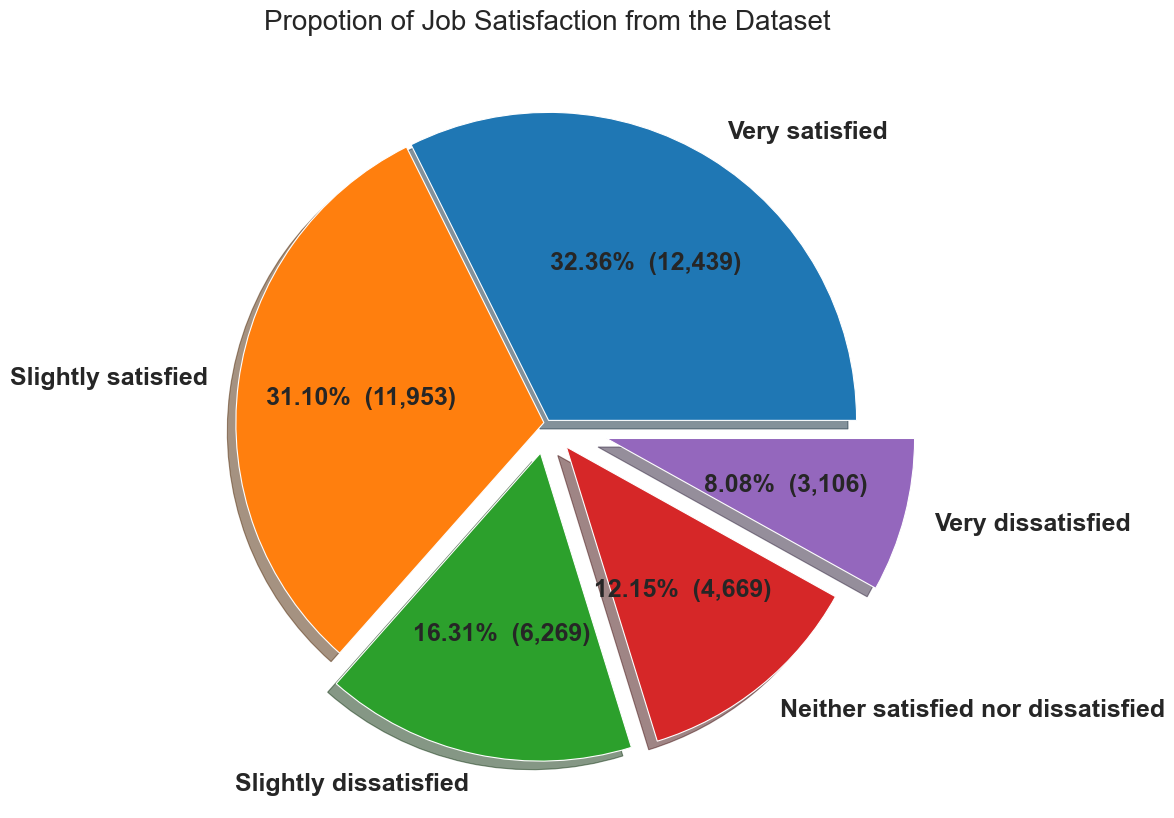

In [1013]:
plt.pie(count, explode = (0.01,0.01,0.1,0.1,0.2), labels = participation_rate, shadow=True, autopct=lambda p : f'{p:.2f}%  ({p * sum(count)/100:,.0f})', textprops={'fontsize':18, 'weight':'bold'})
plt.title("Propotion of Job Satisfaction from the Dataset",fontsize = 20)
plt.show()

In [1015]:
# Applying one hot encoding
df_indicator = df.isnull().astype(int).add_suffix('_nan')
df = pd.concat([df, df_indicator], axis=1)

In [1017]:
numericals = ["Age","SalaryUSD","YearsCodePro"]
categoricals = ["Country","EdLevel","Employment","Hobbyist","UndergradMajor"]

In [1019]:
pd.set_option('display.max_columns', None)

In [1021]:
df2020['CurrentJobSatis'].value_counts()

CurrentJobSatis
Very satisfied                        12439
Slightly satisfied                    11953
Slightly dissatisfied                  6269
Neither satisfied nor dissatisfied     4669
Very dissatisfied                      3106
Name: count, dtype: int64

**Performing further Spliting of CurrentJobSatis Coloumn**
- Delete "Neither satisfied nor dissatisfied"
- Combine "Very satisfied" and "Slightly satisfied", label as "Satisfied" -->1
- Combine "Very dissatisfied" and "Slightly dissatisfied", label as "Dissatisfied"-->0
- Delete rows "Neither satisfied nor dissatisfied"

In [1024]:

df = df2020.drop(df2020[df2020.CurrentJobSatis == "Neither satisfied nor dissatisfied"].index)

df.CurrentJobSatis = [1 if each == "Very satisfied" else 
             1 if each == "Slightly satisfied" else 
             0 if each == "Very dissatisfied"else 
             0 if each == "Slightly dissatisfied" else
             each for each in df.CurrentJobSatis]

In [1026]:
# Dropping nan in Converted Salary if any
df = df.dropna()

In [1028]:
cols= ["Age","SalaryUSD","YearsCodePro", "Country","EdLevel","Employment","Hobbyist","UndergradMajor", "CurrentJobSatis"]
df = df[cols]
df.head(5)

Age      SalaryUSD  YearsCodePro        Country       EdLevel Employment  \
1    36  116000.000000          13.0  United States     Bachelors  Full-time   
6    27   66000.000000           1.0  United States     Associate  Full-time   
10   24   83400.000000           3.0  United States     Bachelors  Full-time   
12   27   87356.555556           3.0        Germany     Bachelors  Full-time   
13   45   91883.000000          20.0        Germany  Professional  Full-time   

   Hobbyist    UndergradMajor  CurrentJobSatis  
1       Yes  Computer Science                0  
6       Yes  Computer Science                1  
10       No  Computer Science                0  
12      Yes       Engineering                1  
13      Yes       Engineering                1

In [1030]:
# one hot encoding
df = pd.get_dummies(df,  columns = categoricals )

In [1032]:
# Normalization of numerical features
for each in numericals:
    df[each] = (df[each] - df[each].min()) / (df[each].max() - df[each].min())

In [1034]:
#df.head(5)

In [1036]:
# Split data into X and y
X = df.drop("CurrentJobSatis", axis = 1)
y = df.CurrentJobSatis

In [1038]:
X

Age  SalaryUSD  YearsCodePro  Country_Afghanistan  \
1      0.466667   0.580055      0.272727                False   
6      0.266667   0.330031      0.000000                False   
10     0.200000   0.417040      0.045455                False   
12     0.266667   0.436824      0.045455                False   
13     0.666667   0.459459      0.431818                False   
...         ...        ...           ...                  ...   
41564  0.133333   0.041597      0.175909                False   
41565  0.133333   0.041597      0.175909                False   
41566  0.133333   0.026343      0.175909                False   
41567  0.155556   0.048065      0.045455                False   
41568  0.577778   0.001000      0.431818                False   

       Country_Albania  Country_Algeria  Country_Andorra  Country_Angola  \
1                False            False            False           False   
6                False            False            False           False   
10               False            False            False           False   
12               False            False            False           False   
13               False            False            False           False   
...                ...              ...              ...             ...   
41564            False            False            False           False   
41565            False            False            False           False   
41566            False            False            False           False   
41567            False            False            False           False   
41568            False            False            False           False   

       Country_Argentina  Country_Armenia  Country_Australia  Country_Austria  \
1                  False            False              False            False   
6                  False            False              False            False   
10                 False            False              False            False   
12                 False            False              False            False   
13                 False            False              False            False   
...                  ...              ...                ...              ...   
41564              False            False              False            False   
41565              False            False              False            False   
41566              False            False              False            False   
41567              False            False              False            False   
41568              False            False              False            False   

       Country_Azerbaijan  Country_Bahamas  Country_Bahrain  \
1                   False            False            False   
6                   False            False            False   
10                  False            False            False   
12                  False            False            False   
13                  False            False            False   
...                   ...              ...              ...   
41564               False            False            False   
41565               False            False            False   
41566               False            False            False   
41567               False            False            False   
41568               False            False            False   

       Country_Bangladesh  Country_Belarus  Country_Belgium  Country_Benin  \
1                   False            False            False          False   
6                   False            False            False          False   
10                  False            False            False          False   
12                  False            False            False          False   
13                  False            False            False          False   
...                   ...              ...              ...            ...   
41564               False            False

In [1040]:
y

1        0
6        1
10       0
12       1
13       1
        ..
41564    1
41565    1
41566    1
41567    1
41568    1
Name: CurrentJobSatis, Length: 25186, dtype: int64

In [1042]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

**Checking Model Coefficent**

In [ ]:
from sklearn.metrics import mean_absolute_error

param_grid = {'min_samples_leaf': [10, 15, 20], 'max_depth': [20, 30, 40]}
grid = GridSearchCV(RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True),
                    param_grid=param_grid,
                    scoring='neg_mean_absolute_error',
                    cv=5,
                    return_train_score=True)

X_train_grit = X_train.sample(frac=0.5, random_state=42)
grid.fit(X_train_grit, y_train.loc[X_train_grit.index])

print("Best mean cross-validation score: {:.3f}".format(-grid.best_score_))
print("Best parameters: {}".format(grid.best_params_))

# Predict on test set
y_pred = grid.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mean_target = y_test.mean()

# Calculate accuracy
accuracy = 1 - (mae / mean_target)
accuracy_percentage = accuracy * 100
print("Test set accuracy: {:.2f}%".format(accuracy_percentage))

**Here Random Forest is used to Predicting Job satisfaction, model did not yield much better output and turned out to be very complex to get insights.** Random forest Regressor, Logistic Regression which may yield good results.

In [3896]:
from sklearn.svm import SVC

# define the model
svm_model = SVC()
# fit the model
svm_model.fit(X_train, y_train)

# make predictions for test data and evaluate
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy: %.2f%%" % (accuracy_svm * 100.0))

Accuracy: 64.29%


# Trying with Logistic Regression

Used Sklearn library to create a Logistic Regression model.

Before creating a model, need to create data, Using model coefficients, features that have negative and positive effects on job satisfaction to be calculated.

In [3904]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the model
model = LogisticRegression()

# Fit the model
model.fit(X, y)

# Make predictions for test data
y_pred = model.predict(X_test)

# Compute accuracy
accuracy_logistic = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy_logistic * 100.0))

# Compute precision
precision = precision_score(y_test, y_pred)
print("Precision: %.2f" % precision)

# Compute recall
recall = recall_score(y_test, y_pred)
print("Recall: %.2f" % recall)

# Compute F1-score
f1 = f1_score(y_test, y_pred)
print("F1 Score: %.2f" % f1)

# Compute ROC curve and AUC
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

Accuracy: 78.57%
Precision: 0.75
Recall: 1.00
F1 Score: 0.86


***Explanation of Metrics:***

1. **Accuracy:** Measures the overall correctness of the model's predictions, calculated as the ratio of correctly predicted instances to the total number of instances.

2. **Precision:** Also called positive predictive value, it measures the ratio of correctly predicted positive observations to the total predicted positives. It focuses on the accuracy of the positive predictions.

3. **Recall:** Also called sensitivity, it measures the ratio of correctly predicted positive observations to all actual positives. It focuses on how many actual positives the model captures through labeling them as positive.

4. **F1 Score:** The harmonic mean of precision and recall. It provides a single score that balances both precision and recall.

5. **ROC Curve (Receiver Operating Characteristic Curve):** A graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. It shows the trade-off between sensitivity (recall) and specificity (true negative rate).

6. **AUC (Area Under the ROC Curve):** Represents the degree of separability, i.e., how well the model is capable of distinguishing between classes. A higher AUC indicates better model performance.

7. **Confusion Matrix:** A table that describes the performance of a classification model, showing the counts of true positives, false positives, true negatives, and false negatives. It helps visualize the performance of the algorithm.

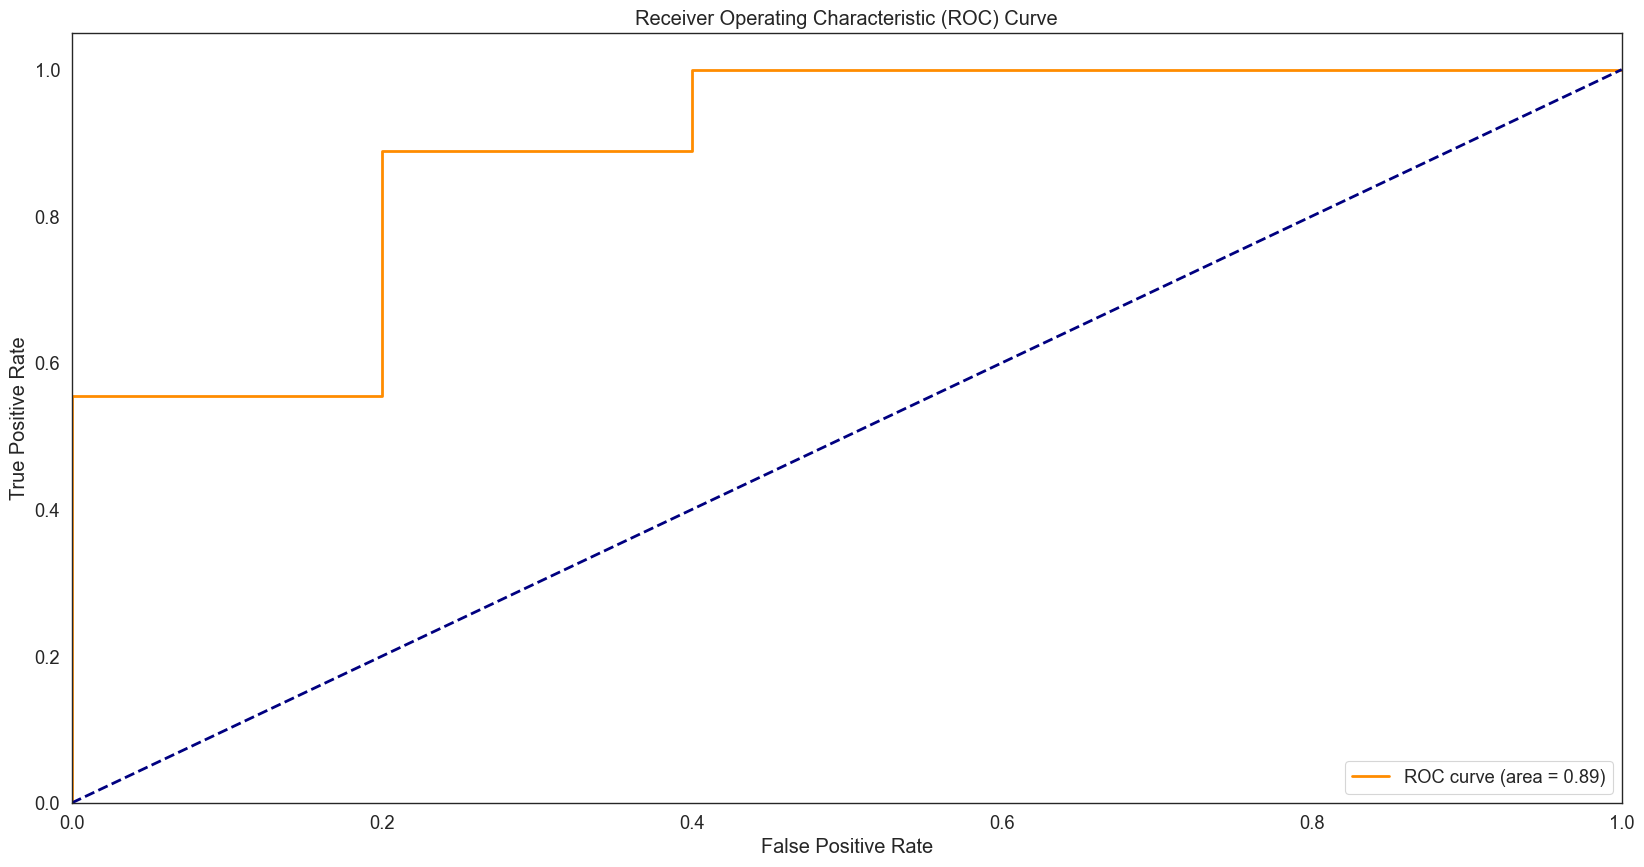

In [3905]:
#ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

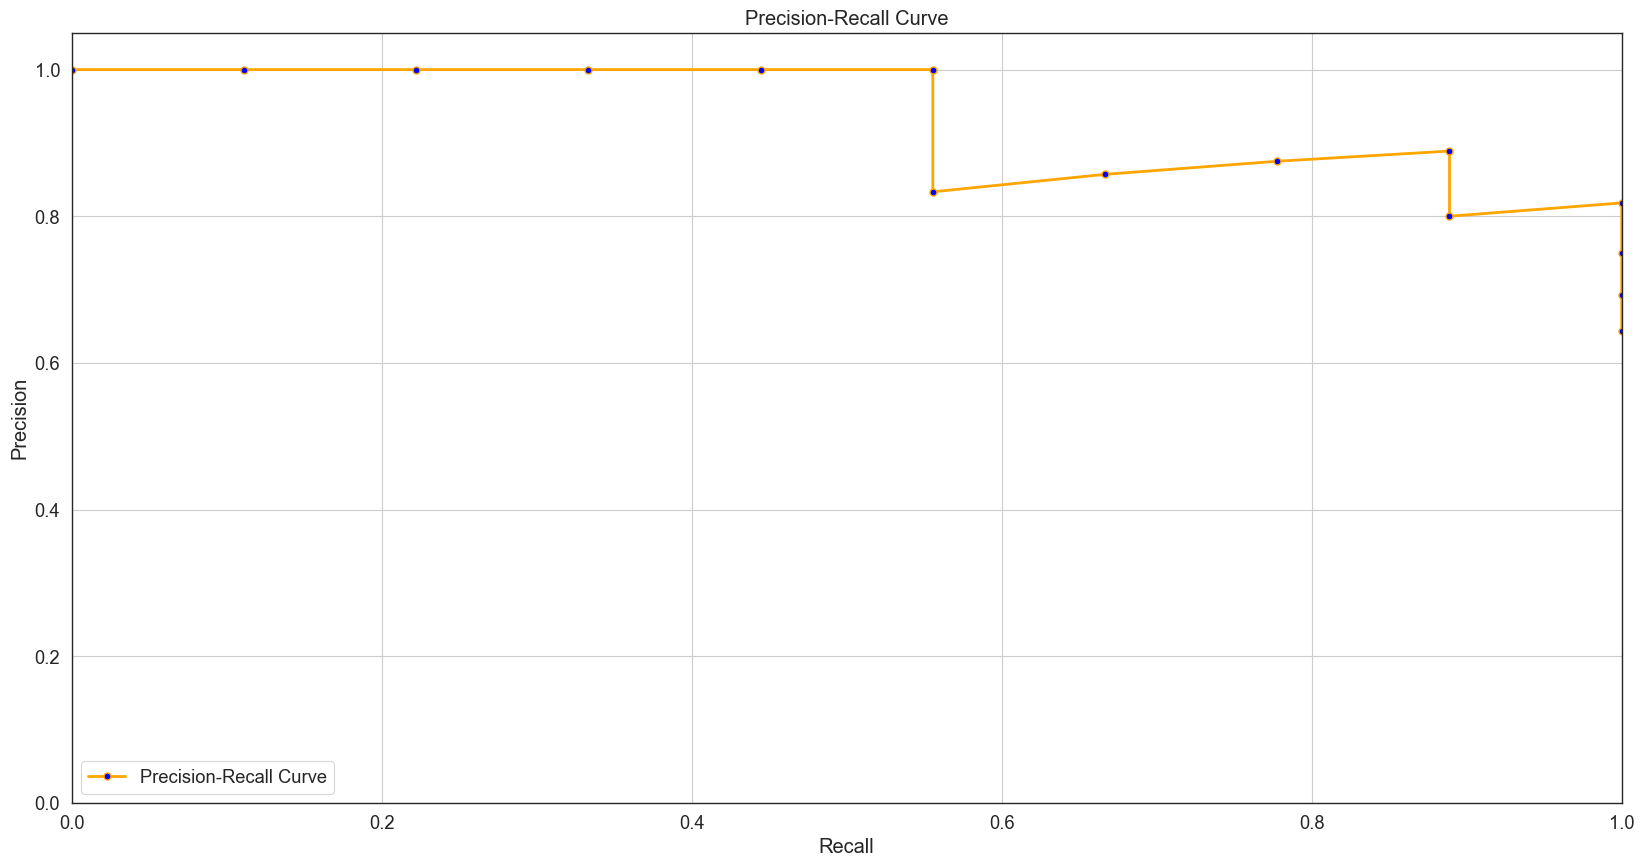

In [3906]:
from sklearn.metrics import precision_recall_curve

# Compute precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_probs)

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='orange', linestyle='-', linewidth=2, marker='o', markersize=5, markerfacecolor='blue', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


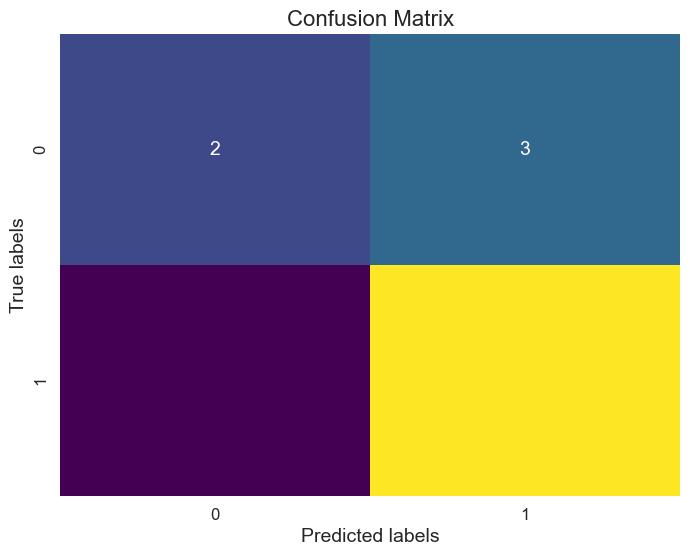

In [3907]:
# Plot confusion matrix with a different colormap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="viridis", cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('True labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

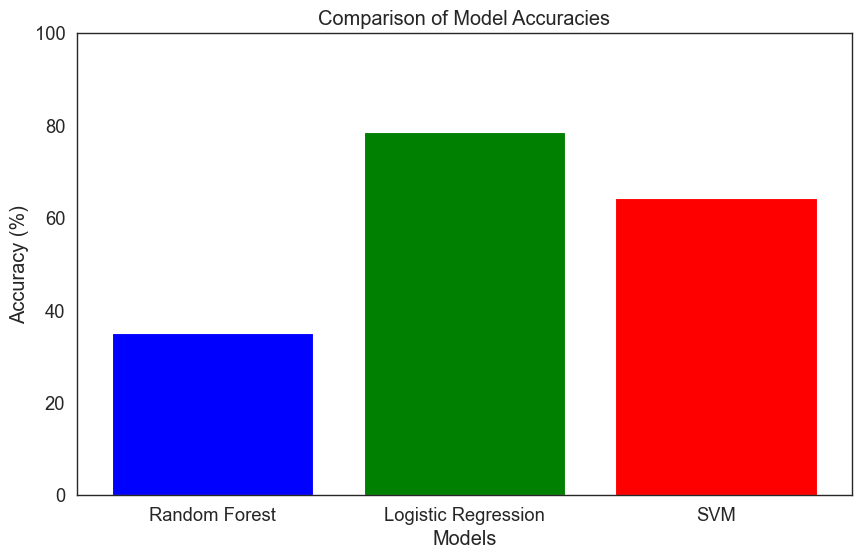

In [3897]:
import matplotlib.pyplot as plt

# Model accuracies
accuracies = [accuracy * 100.0, accuracy_logistic * 100.0, accuracy_svm * 100.0]
models = ['Random Forest', 'Logistic Regression', 'SVM']

# Plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 100)  # Set y-axis limit to 100 for clarity
plt.show()

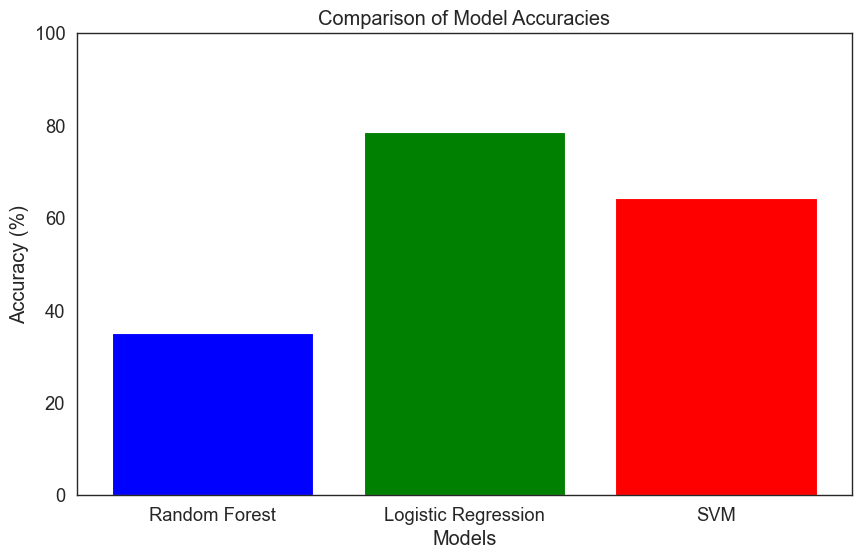

In [3897]:
import matplotlib.pyplot as plt

# Model accuracies
accuracies = [accuracy * 100.0, accuracy_logistic * 100.0, accuracy_svm * 100.0]
models = ['Random Forest', 'Logistic Regression', 'SVM']

# Plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 100)  # Set y-axis limit to 100 for clarity
plt.show()

We have recieved **78.57% Accuracy** through Logistic Regression which is good enough to move ahead with predictions.

## Plotting Features affecting Job Satisfaction

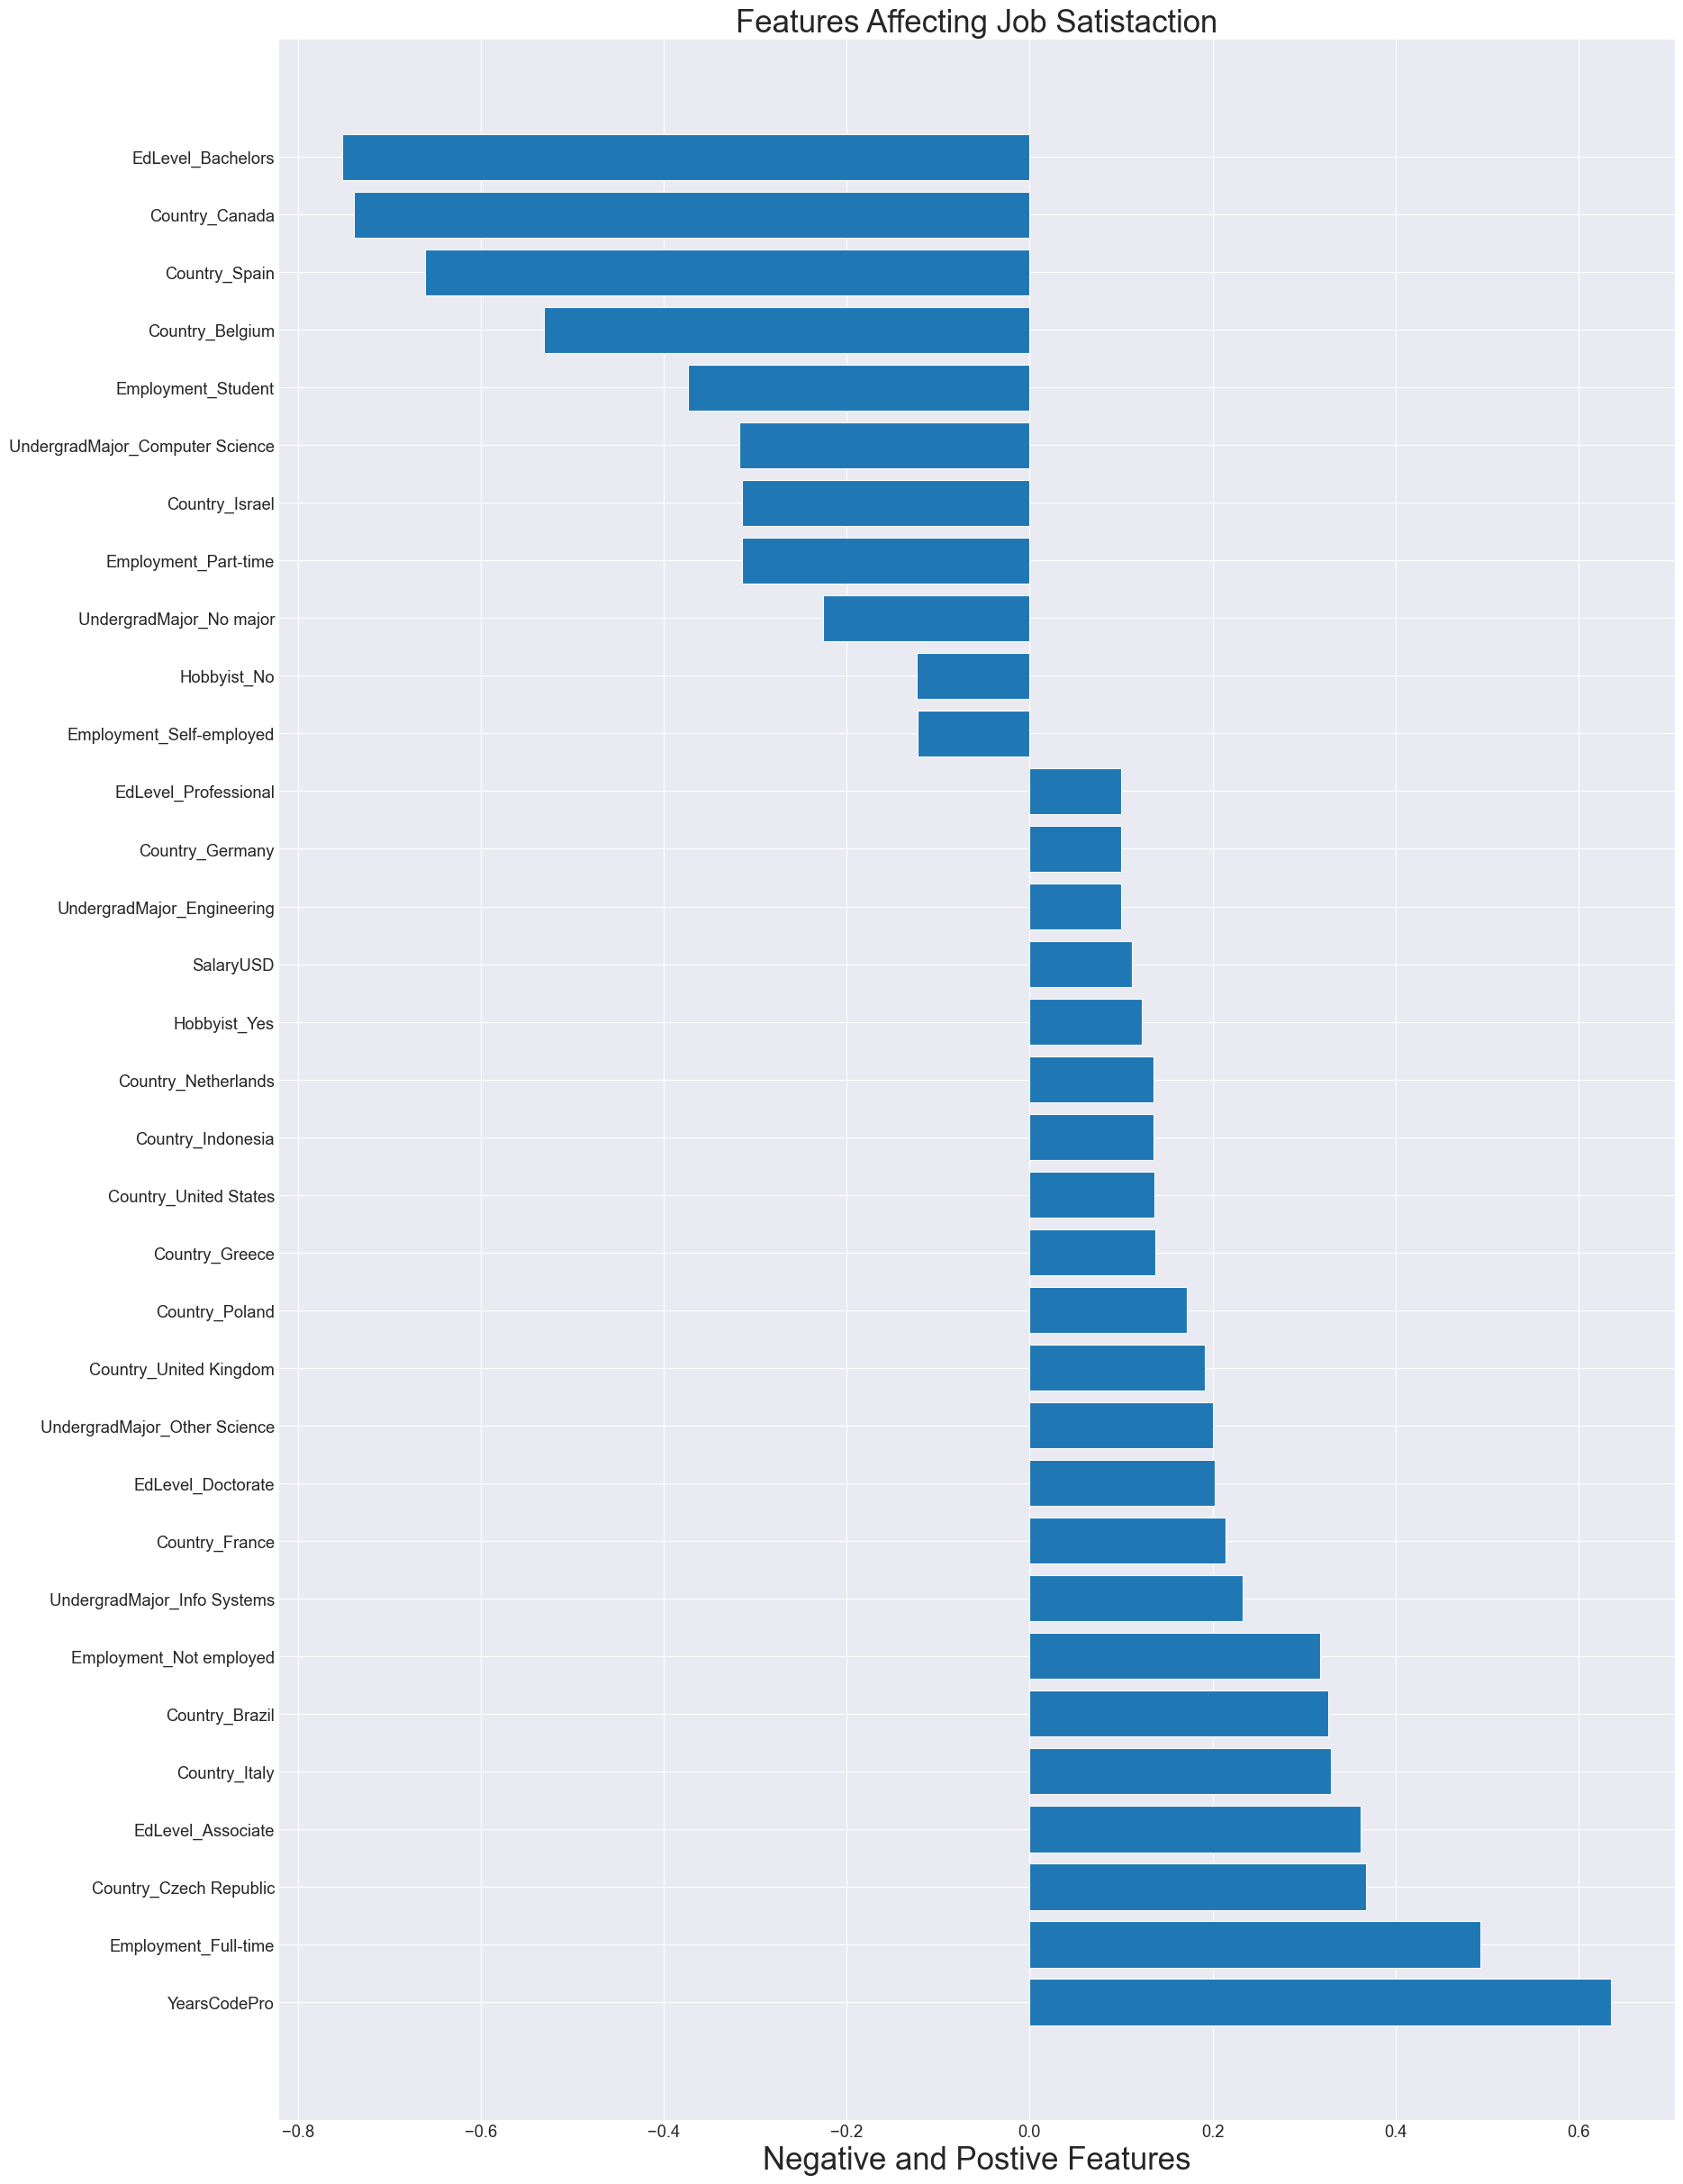

In [ ]:
results_df = pd.DataFrame()
results_df["Rates"] = importance.tolist()
results_df["Columns"] = X.columns

new_index = results_df.Rates.sort_values(ascending = False).index
sorted_results = results_df.reindex(new_index)
filtered_results = sorted_results[np.abs(sorted_results.Rates) > 0.1]

plt.figure(figsize =(20,30))
plt.barh(filtered_results.Columns, filtered_results.Rates)
plt.xlabel("Negative and Postive Features", fontsize = 25)
plt.title("Features Affecting Job Satistaction",fontsize = 25)

plt.show()

The top 2 features negatively affecting Job Satisfaction are age, country. So, in the elderly ages, job satisfaction may decrease because of the personal expectation increases. In the same way, as the professional coding years are increasing, satisfaction may decrease.

- Among the countries; most dissatisfied countries are Angolia, Rwanda, Krygyzstan, Sudan.
- UndergradMajor and other Science, are mostly satisfied.
- Most satisfied countries Malta, Ghana, Cyprus.

# Platforms people are most likely to work with in future

In [29]:
df_Platform_18 = df['PlatformWorkedWith']
df_Platform_19 = survey_df_2019['PlatformWorkedWith']
df_Platform_20 = df2020['PlatformWorkedWith']

### Before analysing first form a required dataset

In [26]:
df2020.dropna(subset=['PlatformWorkedWith'], inplace=True)

In [27]:
df.dropna(subset=['PlatformWorkedWith'], inplace=True)

In [28]:
survey_df_2019.dropna(subset=['PlatformWorkedWith'], inplace=True)

In [32]:
df_Platform_20.isnull().sum()

0

In [35]:
platform_2018 = df_Platform_18.str.split(';', expand=True).stack().value_counts().to_frame('2018')
platform_2018['Platform'] = platform_2018.index
platform_2018.reset_index(drop=True, inplace=True)
platform_2018 = platform_2018[['Platform', '2018']]
#platform_2018
platform_2019 = df_Platform_19.str.split(';', expand=True).stack().value_counts().to_frame('2019')
platform_2019['Platform'] = platform_2019.index
platform_2019.reset_index(drop=True, inplace=True)
platform_2019 = platform_2019[['Platform', '2019']]
#platform_2019
platform_2020 = df_Platform_20.str.split(';', expand=True).stack().value_counts().to_frame('2020')
platform_2020['Platform'] = platform_2020.index
platform_2020.reset_index(drop=True, inplace=True)
platform_2020 = platform_2020[['Platform', '2020']]
#platform_2020

In [37]:
compare_df = pd.merge(platform_2018, platform_2019,on = ['Platform'], how = 'outer')
platforms = pd.merge(compare_df, platform_2020,on = ['Platform'], how = 'outer')
platforms.fillna(0, inplace=True)
platforms['2018'] = platforms['2018']. astype(int)
platforms['2019'] = platforms['2019']. astype(int)
platforms['2020'] = platforms['2020']. astype(int)
platforms.set_index('Platform', inplace=True)
#platforms

In [38]:
rows_to_get = ['Linux', 'Windows Desktop or Server','Android','AWS','Mac OS','WordPress','iOS','Firebase','Azure','Arduino','Heroku','Google Cloud Platform/App Engine','Amazon Echo','Google Cloud Platform','Google Home','Apple Watch or Apple TV','Windows Phone','Microsoft Azure','MacOS','IBM Cloud or Watson','Windows']
platforms_revised = platforms.loc[rows_to_get]
#platforms_revised

In [39]:
groupby_dict = {'Windows Desktop or Server':'Windows', 
                'Windows Phone':'Windows', 
                'Windows':'Windows', 
                'AWS':'AWS', 
                'Mac OS':'iOS',
                'iOS':'iOS',
                'MacOS' : 'iOS',
                'Google Cloud Platform/App Engine':'Google Cloud',
                'Amazon Echo':'AWS',
                'Google Cloud Platform':'Google Cloud',
                'Google Home':'Google Cloud',
                'Apple Watch or Apple TV':'iOS',
                'Azure':'Microsoft Azure',
                'Linux':'Linux',
                'Android':'Android',
                'WordPress':'WordPress',
                'Firebase':'Firebase',
                'Arduino':'Arduino',
                'Heroku':'Heroku',
                'Microsoft Azure':'Microsoft Azure',
                'IBM Cloud or Watson':'IBM Cloud'} 
# Groupby the groupby_dict created above  
#platforms_revised1 = platforms_revised.groupby(groupby_dict, axis = 1).min() 
platforms_revised1 = platforms_revised.groupby(by=groupby_dict).sum()
platforms_revised1

2018   2019   2020
Platform                            
AWS              17865  21304  14389
Android          19157  21639  14101
Arduino           7006   8543   5712
Firebase          9575      0      0
Google Cloud      6194   9928   7569
Heroku            6913   8527   5974
IBM Cloud          950   1514    876
Linux            31859  42753  29600
Microsoft Azure   7267   9528   7830
Windows          25193  40630  28595
WordPress        10486  11595   7654
iOS              23289  28252  19460

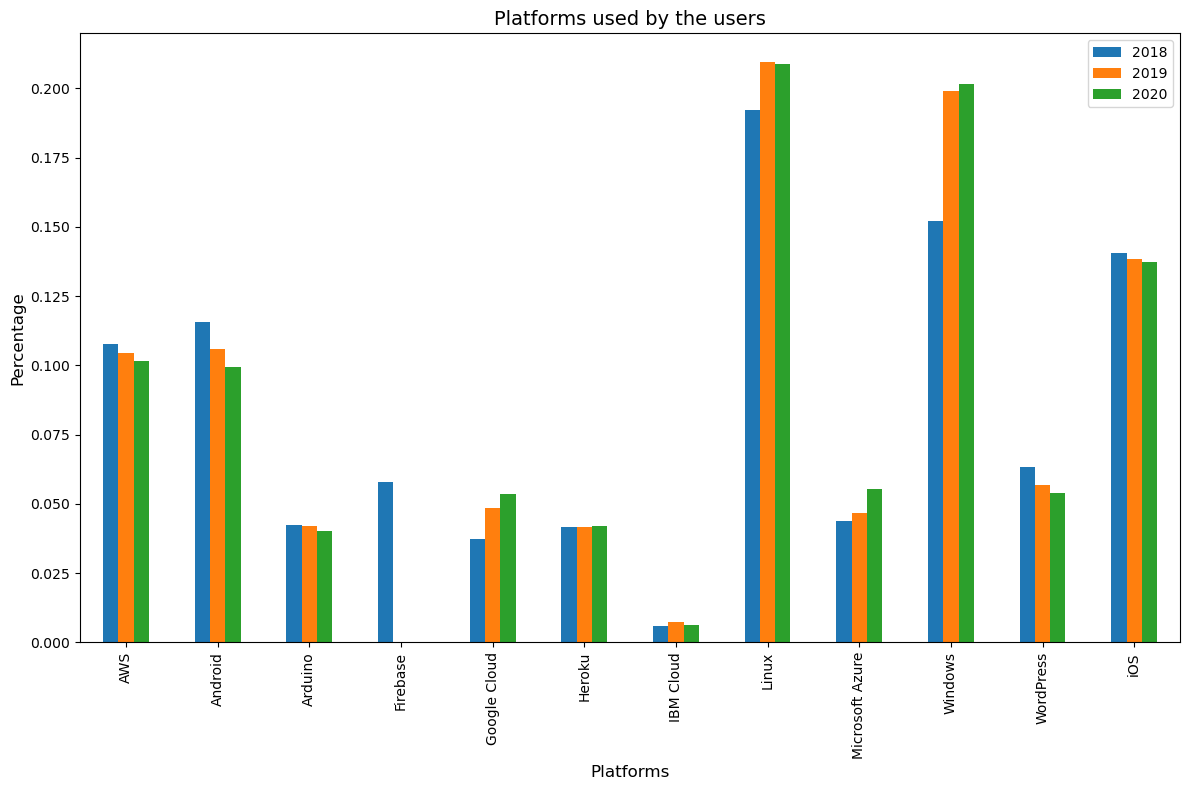

In [40]:
(platforms_revised1/platforms_revised1.sum()).plot(kind='bar', figsize=(12,8))
plt.title('Platforms used by the users', fontsize = 14)
plt.xlabel('Platforms', fontsize = 12)
plt.ylabel('Percentage', fontsize = 12)
plt.tight_layout()

In [41]:
platforms_revised1['Platform'] = platforms_revised1.index
platforms_revised1.reset_index(drop=True, inplace=True)

## Dataset for machine learning 

In [42]:
#For Machine Learning
df_platform_2018 = platforms_revised1[['Platform', '2018']]
df_platform_2018 = df_platform_2018.rename(columns={'2018': 'Number'})
df_platform_2018['Year'] = '2018'
df_platform_2018['Year_Total'] = df_platform_2018['Number'].sum()
df_platform_2018['Fraction'] = df_platform_2018['Number']/df_platform_2018['Year_Total']
df_platform_2018 = df_platform_2018[['Year', 'Platform', 'Number', 'Year_Total', 'Fraction']]
df_platform_2018.sort_values(by=['Fraction'], ascending=False, inplace=True)
df_platform_2018

Year         Platform  Number  Year_Total  Fraction
7   2018            Linux   31859      165754  0.192207
9   2018          Windows   25193      165754  0.151990
11  2018              iOS   23289      165754  0.140503
1   2018          Android   19157      165754  0.115575
0   2018              AWS   17865      165754  0.107780
10  2018        WordPress   10486      165754  0.063262
3   2018         Firebase    9575      165754  0.057766
8   2018  Microsoft Azure    7267      165754  0.043842
2   2018          Arduino    7006      165754  0.042267
5   2018           Heroku    6913      165754  0.041706
4   2018     Google Cloud    6194      165754  0.037369
6   2018        IBM Cloud     950      165754  0.005731

In [43]:
#For Machine Learning
df_platform_2019 = platforms_revised1[['Platform', '2019']]
df_platform_2019 = df_platform_2019.rename(columns={'2019': 'Number'})
df_platform_2019['Year'] = '2019'
df_platform_2019['Year_Total'] = df_platform_2019['Number'].sum()
df_platform_2019['Fraction'] = df_platform_2019['Number']/df_platform_2019['Year_Total']
df_platform_2019 = df_platform_2019[['Year', 'Platform', 'Number', 'Year_Total', 'Fraction']]
df_platform_2019.sort_values(by=['Fraction'], ascending=False, inplace=True)
#df_platform_2019

In [44]:
#For Machine Learning
df_platform_2020 = platforms_revised1[['Platform', '2020']]
df_platform_2020 = df_platform_2020.rename(columns={'2020': 'Number'})
df_platform_2020['Year'] = '2020'
df_platform_2020['Year_Total'] = df_platform_2020['Number'].sum()
df_platform_2020['Fraction'] = df_platform_2020['Number']/df_platform_2020['Year_Total']
df_platform_2020 = df_platform_2020[['Year', 'Platform', 'Number', 'Year_Total', 'Fraction']]
df_platform_2020.sort_values(by=['Fraction'], ascending=False, inplace=True)
#df_platform_2020

In [45]:
#Dataset for all years 2018,2019,2020
df_platforms = pd.concat([df_platform_2018[:10], df_platform_2019[:10], df_platform_2020[:10]] , axis=0)
df_platforms = df_platforms.reset_index(drop=True)
#df_platforms

In [46]:
cols = ['Platform', 'Fraction']
df_platform_2018_ = df_platform_2018[cols][:12]
df_platform_2019_ = df_platform_2019[cols][:12]
df_platform_2020_ = df_platform_2020[cols][:12]

In [47]:
df_platform_2018_

Platform  Fraction
7             Linux  0.192207
9           Windows  0.151990
11              iOS  0.140503
1           Android  0.115575
0               AWS  0.107780
10        WordPress  0.063262
3          Firebase  0.057766
8   Microsoft Azure  0.043842
2           Arduino  0.042267
5            Heroku  0.041706
4      Google Cloud  0.037369
6         IBM Cloud  0.005731

In [48]:
df_platform_2018_.set_index('Platform', inplace = True)
df_platform_2018_t = df_platform_2018_.T
df_platform_2018_t['Year'] = '2018'
df_platform_2018_t.Year = pd.to_datetime(df_platform_2018_t.Year)
df_platform_2018_t = df_platform_2018_t[['Linux','Windows', 'iOS', 'Android', 'AWS', 'WordPress', 'Firebase', 'Microsoft Azure', 'Arduino', 'Heroku', 'Google Cloud','IBM Cloud']]
df_platform_2018_t

Platform     Linux  Windows       iOS   Android      AWS  WordPress  Firebase  \
Fraction  0.192207  0.15199  0.140503  0.115575  0.10778   0.063262  0.057766   

Platform  Microsoft Azure   Arduino    Heroku  Google Cloud  IBM Cloud  
Fraction         0.043842  0.042267  0.041706      0.037369   0.005731

In [49]:
df_platform_2019_.set_index('Platform', inplace = True)
df_platform_2019_t = df_platform_2019_.T
df_platform_2019_t['Year'] = '2019'
df_platform_2019_t.Year = pd.to_datetime(df_platform_2019_t.Year)
df_platform_2019_t = df_platform_2019_t[['Linux','Windows', 'iOS', 'Android', 'AWS', 'WordPress', 'Firebase', 'Microsoft Azure', 'Arduino', 'Heroku', 'Google Cloud','IBM Cloud']]
df_platform_2019_t

Platform     Linux   Windows       iOS   Android       AWS  WordPress  \
Fraction  0.209355  0.198959  0.138346  0.105963  0.104322   0.056779   

Platform  Firebase  Microsoft Azure   Arduino    Heroku  Google Cloud  \
Fraction       0.0         0.046657  0.041834  0.041755      0.048616   

Platform  IBM Cloud  
Fraction   0.007414

In [50]:
df_platform_2020_.set_index('Platform', inplace = True)
df_platform_2020_t = df_platform_2020_.T
df_platform_2020_t['Year'] = '2018'
df_platform_2020_t.Year = pd.to_datetime(df_platform_2020_t.Year)
df_platform_2020_t = df_platform_2020_t[['Linux','Windows', 'iOS', 'Android', 'AWS', 'WordPress', 'Firebase', 'Microsoft Azure', 'Arduino', 'Heroku', 'Google Cloud','IBM Cloud']]
df_platform_2020_t

Platform     Linux   Windows       iOS   Android       AWS  WordPress  \
Fraction  0.208804  0.201714  0.137274  0.099471  0.101503   0.053993   

Platform  Firebase  Microsoft Azure   Arduino    Heroku  Google Cloud  \
Fraction       0.0         0.055234  0.040293  0.042142      0.053393   

Platform  IBM Cloud  
Fraction   0.006179

In [51]:
#Append Dataset 2018 x 2019 x 2020
all_platform = pd.concat([df_platform_2018_t, df_platform_2019_t, df_platform_2020_t] , axis=0)
#resetting the index values
all_platform = all_platform.reset_index(drop=True)
#all_platform.set_index('Year', inplace = True)
all_platform

Platform     Linux   Windows       iOS   Android       AWS  WordPress  \
0         0.192207  0.151990  0.140503  0.115575  0.107780   0.063262   
1         0.209355  0.198959  0.138346  0.105963  0.104322   0.056779   
2         0.208804  0.201714  0.137274  0.099471  0.101503   0.053993   

Platform  Firebase  Microsoft Azure   Arduino    Heroku  Google Cloud  \
0         0.057766         0.043842  0.042267  0.041706      0.037369   
1         0.000000         0.046657  0.041834  0.041755      0.048616   
2         0.000000         0.055234  0.040293  0.042142      0.053393   

Platform  IBM Cloud  
0          0.005731  
1          0.007414  
2          0.006179

Text(0, 0.5, 'Fraction of total queries in the year (%)')

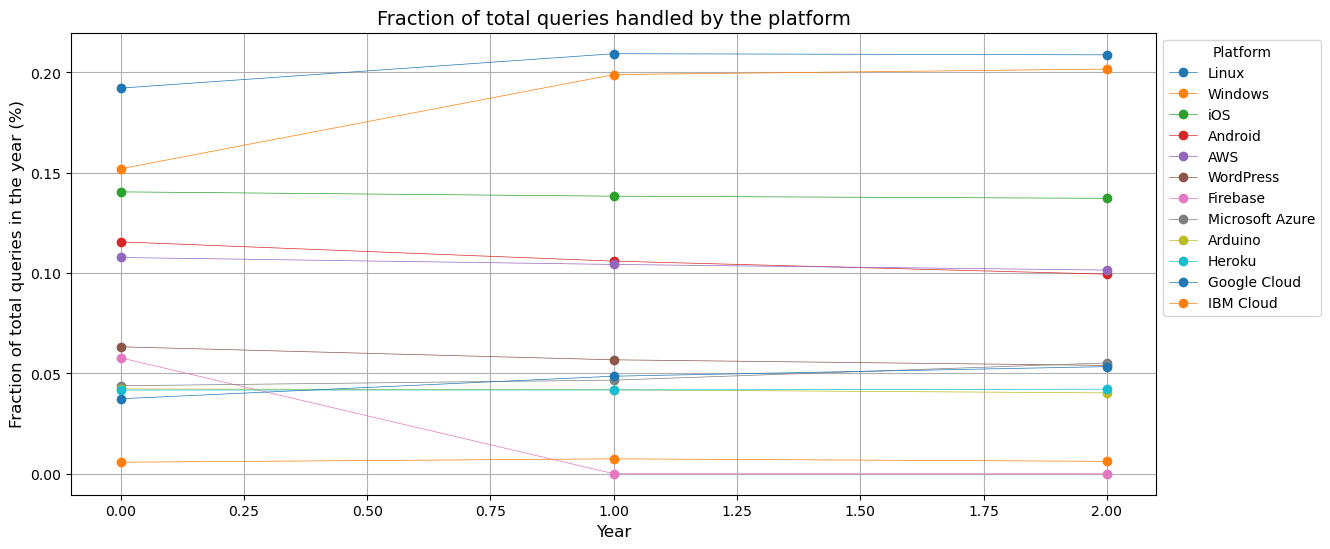

In [52]:
ax = all_platform.plot(grid=True, lw=0.5, figsize=(14,6), marker='o')

#Show the legend outside of the plot.
legend = ax.get_legend()
legend.set_bbox_to_anchor((1, 1))
plt.title('Fraction of total queries handled by the platform', fontsize = 14)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Fraction of total queries in the year (%)', fontsize = 12)

# Analyze the impact of higher education, experience, and responsibilities on salary and gender inequalities

In [3]:
import pandas as pd

# Load the CSV files
file1 = pd.read_csv(r"Data/survey_results_public_2018.csv")
file2 = pd.read_csv(r"Data/survey_results_public_2019.csv")
file3 = pd.read_csv(r"Data/survey_results_public_2020.csv")


merged_data = pd.concat([file1, file2], ignore_index=True)


print(merged_data.head())



def preprocess_data(df):
    # Convert compensation to numeric, ignoring non-numeric values
    df['ConvertedComp'] = pd.to_numeric(df['ConvertedComp'], errors='coerce')
    
    # Fill missing values in relevant columns
    df['EdLevel'] = df['EdLevel'].fillna('Unknown')
    df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce').fillna(0)
    df['Gender'] = df['Gender'].fillna('Unknown')
    
  
    df = df.dropna(subset=['ConvertedComp'])
    
    return df

# Preprocess 
cleaned_data = preprocess_data(merged_data)

# Calculate average salary by education level
avg_salary_by_education = cleaned_data.groupby('EdLevel')['ConvertedComp'].mean()

# Calculate average salary by years of professional coding experience
avg_salary_by_experience = cleaned_data.groupby('YearsCodePro')['ConvertedComp'].mean()

# Calculate average salary by gender
avg_salary_by_gender = cleaned_data.groupby('Gender')['ConvertedComp'].mean()

# Calculate the number of respondents by gender and education level
gender_education_counts = cleaned_data.groupby(['Gender', 'EdLevel']).size().unstack(fill_value=0)


print("Average Salary by Education Level:")
print(avg_salary_by_education)
print("\nAverage Salary by Years of Professional Coding Experience:")
print(avg_salary_by_experience)
print("\nAverage Salary by Gender:")
print(avg_salary_by_gender)
print("\nNumber of Respondents by Gender and Education Level:")
print(gender_education_counts)


import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
avg_salary_by_education.plot(kind='bar')
plt.title('Average Salary by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Salary (ConvertedComp)')
plt.show()


plt.figure(figsize=(10, 6))
avg_salary_by_experience.plot(kind='line')
plt.title('Average Salary by Years of Professional Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Average Salary (ConvertedComp)')
plt.show()

# Average Salary by Gender
plt.figure(figsize=(10, 6))
avg_salary_by_gender.plot(kind='bar')
plt.title('Average Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Salary (ConvertedComp)')
plt.show()

# Number of Respondents by Gender and Education Level
plt.figure(figsize=(10, 6))
gender_education_counts.plot(kind='bar', stacked=True)
plt.title('Number of Respondents by Gender and Education Level')
plt.xlabel('Gender')
plt.ylabel('Number of Respondents')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'Data/survey_results_public_2018.csv'

# Examine the impact on participation rates due to different ethnicities.

In [ ]:
import pandas as pd

# Load the CSV files
file1 = pd.read_csv(r"Data/survey_results_public_2018.csv")
file2 = pd.read_csv(r"Data/survey_results_public_2019.csv")
file3 = pd.read_csv(r"Data/survey_results_public_2020.csv")

# Merge the data
merged_data = pd.concat([file1, file2, file3], ignore_index=True)


In [ ]:
def preprocess_data(df):
    # Convert compensation to numeric, ignoring non-numeric values
    df['ConvertedComp'] = pd.to_numeric(df['ConvertedComp'], errors='coerce')
    
    # Fill missing values in relevant columns
    df['EdLevel'] = df['EdLevel'].fillna('Unknown')
    df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce').fillna(0)
    df['Gender'] = df['Gender'].fillna('Unknown')
    df['Ethnicity'] = df['Ethnicity'].fillna('Unknown')
    
    # Drop rows where ConvertedComp is NaN
    df = df.dropna(subset=['ConvertedComp'])
    
    return df

# Preprocess the data
cleaned_data = preprocess_data(merged_data)


In [ ]:
# Count the number of respondents by ethnicity
ethnicity_counts = cleaned_data['Ethnicity'].value_counts()

# Calculate average salary by ethnicity
avg_salary_by_ethnicity = cleaned_data.groupby('Ethnicity')['ConvertedComp'].mean()

print("Number of Respondents by Ethnicity:")
print(ethnicity_counts)
print("\nAverage Salary by Ethnicity:")
print(avg_salary_by_ethnicity)


In [ ]:
import matplotlib.pyplot as plt

# Number of Respondents by Ethnicity
plt.figure(figsize=(10, 6))
ethnicity_counts.plot(kind='bar')
plt.title('Number of Respondents by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Number of Respondents')
plt.show()

# Average Salary by Ethnicity
plt.figure(figsize=(10, 6))
avg_salary_by_ethnicity.plot(kind='bar')
plt.title('Average Salary by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Average Salary (ConvertedComp)')
plt.show()


# Determine if there is a difference between men's and women's incomes.

In [1]:
import pandas as pd
from scipy import stats

# Load the CSV files
file1 = pd.read_csv(r"Data/survey_results_public_2018.csv")
file2 = pd.read_csv(r"Data/survey_results_public_2019.csv")
file3 = pd.read_csv(r"Data/survey_results_public_2020.csv")

# Merge the data
merged_data = pd.concat([file1, file2, file3], ignore_index=True)

def preprocess_data(df):
    # Convert compensation to numeric, ignoring non-numeric values
    df['ConvertedComp'] = pd.to_numeric(df['ConvertedComp'], errors='coerce')
    
    # Fill missing values in relevant columns
    df['EdLevel'] = df['EdLevel'].fillna('Unknown')
    df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce').fillna(0)
    df['Gender'] = df['Gender'].fillna('Unknown')
    
    # Drop rows where ConvertedComp is NaN
    df = df.dropna(subset=['ConvertedComp'])
    
    return df

# Preprocess the data
cleaned_data = preprocess_data(merged_data)

# Filter data for males and females
male_incomes = cleaned_data[cleaned_data['Gender'] == 'Male']['ConvertedComp']
female_incomes = cleaned_data[cleaned_data['Gender'] == 'Female']['ConvertedComp']

# Perform t-test
t_stat, p_value = stats.ttest_ind(male_incomes, female_incomes, nan_policy='omit')

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference between men's and women's incomes.")
else:
    print("There is no significant difference between men's and women's incomes.")


FileNotFoundError: [Errno 2] No such file or directory: 'Data/survey_results_public_2018.csv'

# Analyze the increase in popularity of a language in the current year due to developer’s interest in the previous year. #301

In [ ]:
import pandas as pd

# Load the CSV files
file_2022 = pd.read_csv(r"Data/survey_results_public_2022.csv")
file_2023 = pd.read_csv(r"Data/survey_results_public_2023.csv")

def preprocess_data(df):
    # Fill missing values in relevant columns
    df['LanguageWorkedWith'] = df['LanguageWorkedWith'].fillna('')
    df['LanguageDesireNextYear'] = df['LanguageDesireNextYear'].fillna('')
    return df

# Preprocess the data
data_2022 = preprocess_data(file_2022)
data_2023 = preprocess_data(file_2023)

# Function to count the occurrences of each language
def count_languages(df, column):
    languages = df[column].str.split(';').explode().str.strip()
    return languages.value_counts()

# Count languages for both years
lang_count_2022 = count_languages(data_2022, 'LanguageWorkedWith')
lang_desire_2022 = count_languages(data_2022, 'LanguageDesireNextYear')
lang_count_2023 = count_languages(data_2023, 'LanguageWorkedWith')

# Convert to DataFrame for easier comparison
lang_count_2022_df = lang_count_2022.reset_index().rename(columns={'index': 'Language', 'LanguageWorkedWith': 'Count_2022'})
lang_desire_2022_df = lang_desire_2022.reset_index().rename(columns={'index': 'Language', 'LanguageDesireNextYear': 'Desire_2022'})
lang_count_2023_df = lang_count_2023.reset_index().rename(columns={'index': 'Language', 'LanguageWorkedWith': 'Count_2023'})

# Merge the dataframes
merged_df = lang_count_2022_df.merge(lang_desire_2022_df, on='Language', how='outer').merge(lang_count_2023_df, on='Language', how='outer').fillna(0)

# Calculate the increase in popularity
merged_df['Increase'] = merged_df['Count_2023'] - merged_df['Count_2022']
merged_df['Interest_to_Popularity'] = (merged_df['Count_2023'] - merged_df['Count_2022']) / merged_df['Desire_2022']

# Sort by the increase in popularity
merged_df = merged_df.sort_values(by='Increase', ascending=False)

print(merged_df[['Language', 'Count_2022', 'Desire_2022', 'Count_2023', 'Increase', 'Interest_to_Popularity']])


# Conclusion

Overall, we performed various analyses on the Stack overflow developer survey and derived insights from it. We found which country has the highest no of respondents, which is the most popular language, education level of respondents, different roles of developers, and so on.<br>
Additionally, we performed machine learning models to predict the growth of languages, the salary of data scientists, what is causing job satisfaction. 